<a href="https://colab.research.google.com/github/Dxrksvng/eng-score-exit/blob/main/ktep_oldversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RUN all ใหม่แล้ว GPU หมดขีดจำกัดจร้า ระเบิ้ดเบิ้ดแหล่ว**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# SET UP

In [3]:
!pip install pdf2image
!apt-get install poppler-utils
!pip install jiwer
!pip install pytesseract
!pip install easyocr
!pip install transformers torch sentencepiece

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 186 kB of archives.
After this operation, 697 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.8 [186 kB]
Fetched 186 kB in 0s (406 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 126111 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.8_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.8) ...
Setting up poppler-utils (22.02.0-2ubuntu0.8) ...
Processing triggers for man-db (2.10.2-1) ...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Tranfrom to image (.png) AUTO


In [ ]:
import os
import cv2
import numpy as np
from pdf2image import convert_from_path

# --- 1. การตั้งค่า ---

# โฟลเดอร์ที่เก็บไฟล์ต้นทาง (PDF, JPG, etc.)
INPUT_DIR = '/content/drive/MyDrive/kmitl_dataset/dataset'

# โฟลเดอร์สำหรับเก็บไฟล์ภาพ .png ที่แปลงเสร็จแล้ว
OUTPUT_DIR = '/content/drive/MyDrive/kmitl_dataset/final-tran-to-img'

# --- 2. โค้ดหลักในการแปลงไฟล์ ---

def main():
    """
    ฟังก์ชันหลักที่จะวนลูปเพื่อแปลงไฟล์ทั้งหมด
    """
    # สร้างโฟลเดอร์ปลายทางหากยังไม่มี
    os.makedirs(OUTPUT_DIR, exist_ok=True)

    # ค้นหาไฟล์ทั้งหมดที่ต้องการแปลงในโฟลเดอร์ต้นทาง
    files_to_process = [f for f in os.listdir(INPUT_DIR) if f.lower().endswith(('.pdf', '.png', '.jpg', '.jpeg'))]

    if not files_to_process:
        print(f"ไม่พบไฟล์ที่สามารถแปลงได้ในโฟลเดอร์: {INPUT_DIR}")
        return

    print(f"พบไฟล์ทั้งหมด {len(files_to_process)} ไฟล์ เริ่มดำเนินการแปลง...")

    # วนลูปทำงานทีละไฟล์
    for filename in files_to_process:
        try:
            filepath = os.path.join(INPUT_DIR, filename)

            # --- ส่วนของการแปลงไฟล์ ---
            if filename.lower().endswith('.pdf'):
                # ถ้าเป็น PDF ให้ใช้ pdf2image แปลงหน้าแรก
                images = convert_from_path(filepath)
                bgr_image = np.array(images[0])
                bgr_image = cv2.cvtColor(bgr_image, cv2.COLOR_RGB2BGR)
            else:
                # ถ้าเป็นไฟล์ภาพอยู่แล้ว ให้ใช้ OpenCV อ่านเข้ามาโดยตรง
                bgr_image = cv2.imread(filepath)

            # ตรวจสอบว่าโหลดภาพสำเร็จหรือไม่
            if bgr_image is None:
                print(f"  -> ไม่สามารถอ่านไฟล์: {filename}, ขอข้ามไฟล์นี้")
                continue

            # --- ส่วนของการบันทึกไฟล์ ---
            # สร้างชื่อไฟล์ใหม่ให้เป็น .png เสมอ
            new_filename = f"{os.path.splitext(filename)[0]}.png"
            save_path = os.path.join(OUTPUT_DIR, new_filename)

            # บันทึกไฟล์ภาพ
            cv2.imwrite(save_path, bgr_image)

            print(f"  -> แปลงไฟล์ '{filename}' เป็น '{new_filename}' เรียบร้อยแล้ว")

        except Exception as e:
            print(f"  !!!! เกิดข้อผิดพลาดกับไฟล์ {filename}: {e}")

    print("-" * 50)
    print("การแปลงไฟล์ทั้งหมดเสร็จสิ้น!")
    print(f"ไฟล์ภาพ .png ทั้งหมดถูกบันทึกไว้ที่: {OUTPUT_DIR}")


# สั่งให้โปรแกรมเริ่มทำงานเมื่อรันไฟล์นี้
if __name__ == "__main__":
    main()

# Preprocess

**Test single image**

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# อ่านภาพ
image = cv2.imread('/content/drive/MyDrive/kmitl_dataset/final-tran-to-img/KMITL-TEP PILOT-1.png')  # ใส่ชื่อไฟล์ภาพที่ต้องการ

# แปลงภาพเป็น HSV เพื่อแยกเฉพาะสีขาว
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

## กำหนดช่วงสีดำใน HSV
lower_black = np.array([0, 0, 0])  # ค่าสีดำต่ำสุด ดำสนิท
upper_black = np.array([255, 255, 110])  # ค่าสีดำสูงสุด ดำอ่อน
# H สี
#S ความเข้มสี 0-255 (ไม่สด-สดมาก)
#V ความสว่าง ดำ-สว่างสุด


# กำหนดช่วงสีน้ำเงินใน HSV
lower_blue = np.array([90, 30, 50])  # ค่าสีน้ำเงินต่ำสุด
upper_blue = np.array([130, 255, 255])  # ค่าสีน้ำเงินสูงสุด

# สร้าง Mask สำหรับสีดำและน้ำเงิน
mask_black = cv2.inRange(hsv, lower_black, upper_black)
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

# รวม Mask สีดำและน้ำเงินเข้าด้วยกัน
mask = cv2.bitwise_or(mask_black, mask_blue)

# สร้างพื้นหลังที่มีสีเฉลี่ยของภาพ
background_color = cv2.mean(image, mask=cv2.bitwise_not(mask))[:3]  # หาค่าสีพื้นหลัง
background = np.full_like(image, background_color, dtype=np.uint8)

# แทนที่ส่วนที่ไม่ใช่ตัวอักษรด้วยพื้นหลัง
inverted_mask = cv2.bitwise_not(mask)
result = cv2.bitwise_and(background, background, mask=inverted_mask)
final_result = cv2.bitwise_or(image & mask[:, :, None], result)

# แสดงผลลัพธ์
cv2_imshow(image)
cv2_imshow(final_result)
cv2.waitKey(0)
cv2.destroyAllWindows()

# บันทึกภาพผลลัพธ์
cv2.imwrite('output.png', final_result)


**AUTO Preprocess**

In [ ]:
import os
import cv2
import numpy as np

# --- 1. ส่วนของการตั้งค่า ---

# โฟลเดอร์ที่เก็บไฟล์ภาพต้นทาง
INPUT_DIR = '/content/drive/MyDrive/kmitl_dataset/final-tran-to-img'

# โฟลเดอร์สำหรับเก็บภาพที่ประมวลผลเสร็จแล้ว
OUTPUT_DIR = '/content/drive/MyDrive/kmitl_dataset/final-preprecessed'


# ---. ฟังก์ชันประมวลผลภาพ (นำมาจากโค้ดของคุณ) ---

def process_image_with_color_mask(image):
    """
    ประมวลผลภาพโดยใช้เทคนิคการแยกสี (Color Masking)
    เพื่อคงไว้เฉพาะตัวอักษรสีดำและน้ำเงิน
    """
    # แปลงภาพเป็น HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # กำหนดช่วงสีดำใน HSV
    lower_black = np.array([0, 0, 0])
    upper_black = np.array([255, 255, 110])

    # กำหนดช่วงสีน้ำเงินใน HSV
    lower_blue = np.array([90, 30, 50])
    upper_blue = np.array([130, 255, 255])

    # สร้าง Mask สำหรับสีดำและน้ำเงิน
    mask_black = cv2.inRange(hsv, lower_black, upper_black)
    mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

    # รวม Mask ทั้งสองสีเข้าด้วยกัน
    mask = cv2.bitwise_or(mask_black, mask_blue)

    # สร้างพื้นหลังสีขาว (เพื่อให้ OCR อ่านง่าย)
    background = np.full_like(image, (255, 255, 255), dtype=np.uint8)

    # ใช้ mask เพื่อคงไว้เฉพาะส่วนที่เป็นตัวอักษร (สีดำและน้ำเงิน)
    # และแทนที่ส่วนอื่นด้วยพื้นหลังสีขาว
    inverted_mask = cv2.bitwise_not(mask)
    background_part = cv2.bitwise_and(background, background, mask=inverted_mask)
    text_part = cv2.bitwise_and(image, image, mask=mask)

    final_result = cv2.add(text_part, background_part)

    return final_result

# --- 3. โค้ดหลักสำหรับทำงานแบบอัตโนมัติ ---

def main():
    """
    วนลูปทำงานกับทุกไฟล์ในโฟลเดอร์
    """
    # สร้างโฟลเดอร์ปลายทางหากยังไม่มี
    os.makedirs(OUTPUT_DIR, exist_ok=True)

    # ค้นหาไฟล์ทั้งหมดในโฟลเดอร์ต้นทาง
    files_to_process = [f for f in os.listdir(INPUT_DIR) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if not files_to_process:
        print(f"ไม่พบไฟล์ภาพในโฟลเดอร์: {INPUT_DIR}")
        return

    print(f"พบไฟล์ทั้งหมด {len(files_to_process)} ไฟล์ เริ่มดำเนินการ...")

    # วนลูปทำงานทีละไฟล์
    for filename in files_to_process:
        try:
            filepath = os.path.join(INPUT_DIR, filename)

            # อ่านไฟล์ภาพ
            original_image = cv2.imread(filepath)

            if original_image is None:
                print(f"  -> ไม่สามารถอ่านไฟล์: {filename}, ขอข้ามไฟล์นี้")
                continue

            # ส่งภาพไปประมวลผลด้วยฟังก์ชันของคุณ
            processed_image = process_image_with_color_mask(original_image)

            # บันทึกผลลัพธ์
            save_path = os.path.join(OUTPUT_DIR, filename)
            cv2.imwrite(save_path, processed_image)

            print(f"  -> ประมวลผลไฟล์ '{filename}' เรียบร้อยแล้ว")

        except Exception as e:
            print(f"  !!!! เกิดข้อผิดพลาดกับไฟล์ {filename}: {e}")

    print("-" * 50)
    print("การประมวลผลทั้งหมดเสร็จสิ้น!")
    print(f"ไฟล์ที่ประมวลผลแล้วถูกบันทึกไว้ที่: {OUTPUT_DIR}")


# สั่งให้โปรแกรมเริ่มทำงาน
if __name__ == "__main__":
    main()

# OCR AUTOMATE

**pytesseract**

In [4]:
import cv2
import pandas as pd
import os
import re
import jiwer
import numpy as np
import pytesseract

# --- 1. กำหนดค่าและ Path ที่สำคัญ ---
MODEL_NAME = 'Pytesseract'
APPROACH_NAME = 'Pure OCR'
MASTER_OUTPUT_PATH = "/content/drive/MyDrive/kmitl_dataset/final-excel/final_comparison_report.xlsx"
INDIVIDUAL_REPORT_PATH = f"/content/drive/MyDrive/kmitl_dataset/final-excel/{MODEL_NAME.lower()}_{APPROACH_NAME.replace(' ', '_').lower()}_report.xlsx"

IMAGE_DIR = "/content/drive/MyDrive/kmitl_dataset/final-preprecessed"
GROUND_TRUTH_PATH = "/content/drive/MyDrive/kmitl_dataset/dataset/คะแนน TEP (Pilot Study)_Total_IT.xlsx"


# --- 2. ฟังก์ชันช่วยเหลือ ---

def parse_score(text):
    if not text: return None, None
    match = re.search(r'([A-Z][1-2])\s*\((\d+)\)', text, re.IGNORECASE)
    if match: return match.group(1).upper(), match.group(2)
    return None, None

def get_id_from_filename(filename):
    match = re.search(r'(\d+)\.(png|jpg|jpeg)$', filename.lower())
    if match: return int(match.group(1))
    return None

def normalize_text(text):
    if text is None: return ""
    text = str(text).strip().lower()
    if text.endswith('.0'): text = text[:-2]
    return text

# ⬇️⬇️ นำฟังก์ชันของคุณมาปรับปรุงและเพิ่มการสกัด Total Score ⬇️⬇️
def parse_pytesseract_pure_ocr(text):
    result = {}
    valid_levels = {"A1", "A2", "B1", "B2", "C1", "C2"}
    lines = [l.strip().replace('’', "'").replace('–', '-').replace('!', '1').replace('I', '1').replace('l', '1') for l in text.split('\n') if l.strip()]
    prev = ""

    # ใช้ Regex กับข้อความทั้งหมดก่อนเพื่อความแม่นยำ
    full_text = "\n".join(lines)

    # Name
    name_match = re.search(r'Name\s*:?\s*(.*?)\s*Application', full_text, re.DOTALL | re.IGNORECASE)
    if name_match: result["name"] = name_match.group(1).strip()

    # Application No.
    app_no_match = re.search(r'Application\s*No\.?\s*:*\s*(\S+)', full_text, re.IGNORECASE)
    if app_no_match: result["application_no"] = app_no_match.group(1).strip()

    # Date
    date_match = re.search(r'Date of test Administration\s*:?\s*(.+)', full_text, re.IGNORECASE)
    if date_match:
        # เอาแค่บรรทัดแรกของผลลัพธ์เผื่อมีการขึ้นบรรทัดใหม่ผิดพลาด
        result["test_date"] = date_match.group(1).strip().split('\n')[0]

    # Skill Scores (ใช้ Logic เดิมของคุณเป็นฐาน แต่ค้นหาจาก full_text)
    score_pattern_full = r'([A-Z][1-2]\s*\(\d+\))'
    for skill in ["Grammar", "Reading", "Speaking", "Writing"]:
        m = re.search(rf"{skill}.*?({score_pattern_full})", full_text, re.IGNORECASE)
        if m:
            # แยก Level และ Score จากผลลัพธ์
            score_text = m.group(1)
            level, score = parse_score(score_text)
            if level in valid_levels:
                result[f"{skill.lower()}_level"] = level
                result[f"{skill.lower()}_score"] = score

    # Total Score (เพิ่มตรรกะใหม่)
    all_scores_text = re.findall(score_pattern_full, full_text, re.IGNORECASE)
    used_scores_text = []
    for skill in ["grammar", "reading", "speaking", "writing"]:
        if f"{skill}_level" in result:
             used_scores_text.append(f"{result[f'{skill}_level']} ({result[f'{skill}_score']})")

    remaining_scores = [s for s in all_scores_text if s not in used_scores_text]
    if remaining_scores:
        total_level, total_score = parse_score(remaining_scores[0])
        result["total_level"] = total_level
        result["total_score"] = total_score

    return result

# --- 3. โหลดและตรวจสอบข้อมูลก่อนเริ่ม ---
print("--- 🔍 ขั้นตอนตรวจสอบข้อมูล ---")
gt_df = pd.read_excel(GROUND_TRUTH_PATH)
ground_truth_ids = set(gt_df['No.'].unique())
image_files = sorted([f for f in os.listdir(IMAGE_DIR) if f.lower().endswith(('.png', '.jpg', '.jpeg'))], key=get_id_from_filename)
print(f"พบ ID ใน Ground Truth ทั้งหมด: {len(ground_truth_ids)} ID | พบไฟล์รูปภาพ: {len(image_files)} ไฟล์")
print("--- ✅ ตรวจสอบข้อมูลเสร็จสิ้น ---\n")

# --- 4. เริ่มกระบวนการสกัดข้อมูล ---
results_list = []
print(f"--- 🚀 เริ่มการสกัดข้อมูลจากรูปภาพ {len(image_files)} ไฟล์ ด้วย {MODEL_NAME} ({APPROACH_NAME}) ---")
for filename in image_files:
    image_id = get_id_from_filename(filename)
    if image_id is None: continue
    gt_row = gt_df[gt_df['No.'] == image_id]
    if gt_row.empty: continue

    print(f"  - กำลังประมวลผล ID: {image_id} ({filename})")
    image_path = os.path.join(IMAGE_DIR, filename)
    img = cv2.imread(image_path)

    custom_config = r'--oem 3 --psm 6'
    text = pytesseract.image_to_string(img, config=custom_config)

    extracted_raw = parse_pytesseract_pure_ocr(text)

    # นำข้อมูลที่สกัดได้มาจัดลง Dictionary
    results_list.append({
        "No.": image_id,
        "Application No. (GT)": gt_row.iloc[0]["Application No."], "Application No. (Pred)": extracted_raw.get('application_no'),
        "Name (GT)": gt_row.iloc[0]["Name"], "Name (Pred)": extracted_raw.get('name'),
        "Test Date (GT)": gt_row.iloc[0]["Test Date"], "Test Date (Pred)": extracted_raw.get('test_date'),
        "Grammar_Level (GT)": gt_row.iloc[0]["Grammar_Level"], "Grammar_Level (Pred)": extracted_raw.get('grammar_level'),
        "Grammar_Score (GT)": gt_row.iloc[0]["Grammar_Score"], "Grammar_Score (Pred)": extracted_raw.get('grammar_score'),
        "Reading_Level (GT)": gt_row.iloc[0]["Reading_Level"], "Reading_Level (Pred)": extracted_raw.get('reading_level'),
        "Reading_Score (GT)": gt_row.iloc[0]["Reading_Score"], "Reading_Score (Pred)": extracted_raw.get('reading_score'),
        "Speaking_Level (GT)": gt_row.iloc[0]["Speaking_Level"], "Speaking_Level (Pred)": extracted_raw.get('speaking_level'),
        "Speaking_Score (GT)": gt_row.iloc[0]["Speaking_Score"], "Speaking_Score (Pred)": extracted_raw.get('speaking_score'),
        "Writing_Level (GT)": gt_row.iloc[0]["Writing_Level"], "Writing_Level (Pred)": extracted_raw.get('writing_level'),
        "Writing_Score (GT)": gt_row.iloc[0]["Writing_Score"], "Writing_Score (Pred)": extracted_raw.get('writing_score'),
        "Total_Level (GT)": gt_row.iloc[0]["Total_Level"], "Total_Level (Pred)": extracted_raw.get('total_level'),
        "Total_Score (GT)": gt_row.iloc[0]["Total_Score"], "Total_Score (Pred)": extracted_raw.get('total_score'),
    })

ocr_results_df = pd.DataFrame(results_list)
print("--- ✅ สกัดข้อมูลเสร็จสิ้น ---\n")


# --- 5. เริ่มกระบวนการประเมินผล (Evaluation) ---
# ... (โค้ดส่วนนี้เหมือนกับเวอร์ชันก่อนหน้าทุกประการ) ...
print("--- 📊 เริ่มการประเมินผล ---")
eval_df = ocr_results_df.fillna('')
fields_to_evaluate = {
    'Name': ('Name (GT)', 'Name (Pred)'), 'Application No.': ('Application No. (GT)', 'Application No. (Pred)'),
    'Test Date': ('Test Date (GT)', 'Test Date (Pred)'), 'Grammar_Level': ('Grammar_Level (GT)', 'Grammar_Level (Pred)'),
    'Grammar_Score': ('Grammar_Score (GT)', 'Grammar_Score (Pred)'), 'Reading_Level': ('Reading_Level (GT)', 'Reading_Level (Pred)'),
    'Reading_Score': ('Reading_Score (GT)', 'Reading_Score (Pred)'), 'Speaking_Level': ('Speaking_Level (GT)', 'Speaking_Level (Pred)'),
    'Speaking_Score': ('Speaking_Score (GT)', 'Speaking_Score (Pred)'), 'Writing_Level': ('Writing_Level (GT)', 'Writing_Level (Pred)'),
    'Writing_Score': ('Writing_Score (GT)', 'Writing_Score (Pred)'), 'Total_Level': ('Total_Level (GT)', 'Total_Level (Pred)'),
    'Total_Score': ('Total_Score (GT)', 'Total_Score (Pred)'),
}
evaluation_summary_list = []
for field, (gt_col, pred_col) in fields_to_evaluate.items():
    ground_truth = [normalize_text(t) for t in eval_df[gt_col]]
    prediction = [normalize_text(t) for t in eval_df[pred_col]]
    accuracy = np.mean([1 if gt == pred else 0 for gt, pred in zip(ground_truth, prediction)]) * 100
    error_metrics = jiwer.compute_measures(ground_truth, prediction)
    wer = error_metrics.get('wer', 0) * 100
    cer = error_metrics.get('cer', 0) * 100
    H = error_metrics.get('hits', 0); I = error_metrics.get('insertions', 0); D = error_metrics.get('deletions', 0); S = error_metrics.get('substitutions', 0)
    precision = H / (H + I + S) if (H + I + S) > 0 else 0
    recall = H / (H + D + S) if (H + D + S) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    evaluation_summary_list.append({
        'Field': field, 'Accuracy (%)': round(accuracy, 2), 'WER (%)': round(wer, 2),
        'CER (%)': round(cer, 2), 'F1-score (%)': round(f1_score * 100, 2)
    })
eval_summary_df = pd.DataFrame(evaluation_summary_list)
eval_summary_df.insert(0, 'Approach', APPROACH_NAME)
eval_summary_df.insert(0, 'Model', MODEL_NAME)
print(eval_summary_df.to_string(index=False))
print("--- ✅ ประเมินผลเสร็จสิ้น ---\n")


# --- 6. บันทึกผลลัพธ์ (ทำ 2 อย่าง) ---
# --- 6.A: บันทึกผลการทดลองนี้แยกไฟล์ ---
print(f"--- 💾 กำลังบันทึกรายงานเฉพาะของ {MODEL_NAME} ({APPROACH_NAME}) ลงในไฟล์: {INDIVIDUAL_REPORT_PATH} ---")
with pd.ExcelWriter(INDIVIDUAL_REPORT_PATH, engine='openpyxl') as writer:
    ocr_results_df.to_excel(writer, sheet_name='Detailed_Results', index=False)
    eval_summary_df.drop(columns=['Model', 'Approach']).to_excel(writer, sheet_name='Evaluation_Summary', index=False)
print(f"🎉 บันทึกไฟล์ {INDIVIDUAL_REPORT_PATH} สำเร็จ!")

# --- 6.B: อัปเดตข้อมูลลง Master File ---
print(f"--- 💾 กำลังอัปเดตไฟล์ Master Report: {MASTER_OUTPUT_PATH} ---")
SHEET_NAME = 'Master_Evaluation'
try:
    with pd.ExcelFile(MASTER_OUTPUT_PATH) as xls:
        master_df = pd.read_excel(xls, sheet_name=SHEET_NAME)
        master_df = master_df[(master_df['Model'] != MODEL_NAME) | (master_df['Approach'] != APPROACH_NAME)]
    combined_df = pd.concat([master_df, eval_summary_df], ignore_index=True)
except FileNotFoundError:
    print(f"ไม่พบไฟล์ Master เดิม, กำลังสร้างไฟล์ใหม่...")
    combined_df = eval_summary_df
with pd.ExcelWriter(MASTER_OUTPUT_PATH, engine='openpyxl') as writer:
    combined_df.to_excel(writer, sheet_name=SHEET_NAME, index=False)
print(f"🎉 อัปเดตไฟล์ Master Report สำเร็จ!")

--- 🔍 ขั้นตอนตรวจสอบข้อมูล ---
พบ ID ใน Ground Truth ทั้งหมด: 120 ID | พบไฟล์รูปภาพ: 120 ไฟล์
--- ✅ ตรวจสอบข้อมูลเสร็จสิ้น ---

--- 🚀 เริ่มการสกัดข้อมูลจากรูปภาพ 120 ไฟล์ ด้วย Pytesseract (Pure OCR) ---
  - กำลังประมวลผล ID: 1 (KMITL-TEP PILOT-1.png)
  - กำลังประมวลผล ID: 2 (KMITL-TEP PILOT-2.png)
  - กำลังประมวลผล ID: 3 (KMITL-TEP PILOT-3.png)
  - กำลังประมวลผล ID: 4 (KMITL-TEP PILOT-4.png)
  - กำลังประมวลผล ID: 5 (KMITL-TEP PILOT-5.png)
  - กำลังประมวลผล ID: 6 (KMITL-TEP PILOT-6.png)
  - กำลังประมวลผล ID: 7 (KMITL-TEP PILOT-7.png)
  - กำลังประมวลผล ID: 8 (KMITL-TEP PILOT-8.png)
  - กำลังประมวลผล ID: 9 (KMITL-TEP PILOT-9.png)
  - กำลังประมวลผล ID: 10 (KMITL-TEP PILOT-10.png)
  - กำลังประมวลผล ID: 11 (KMITL-TEP PILOT-11.png)
  - กำลังประมวลผล ID: 12 (KMITL-TEP PILOT-12.png)
  - กำลังประมวลผล ID: 13 (KMITL-TEP PILOT-13.png)
  - กำลังประมวลผล ID: 14 (KMITL-TEP PILOT-14.png)
  - กำลังประมวลผล ID: 15 (KMITL-TEP PILOT-15.png)
  - กำลังประมวลผล ID: 16 (KMITL-TEP PILOT-16.png)
  - กำลังประมวล

**ปรับให้มันอ่านค่าได้แม่นๆก่อน**

In [5]:
# 1. IMPORT LIBRARIES
import cv2
import pytesseract
import re
import os
import pandas as pd
import json # เพิ่มเข้ามาเพื่อพิมพ์ Dictionary ให้อ่านง่าย

# 2. ฟังก์ชันสกัดข้อมูลของคุณ (ไม่เปลี่ยนแปลง)
def extract_ktep_key_value(text):
    result = {}
    valid_levels = {"A1", "A2", "B1", "B2", "C1", "C2"}
    lines = [l.strip().replace('’', "'").replace('–', '-').replace('!', '1').replace('I', '1') for l in text.split('\n') if l.strip()]
    prev = ""
    # เพิ่ม print(lines) เพื่อช่วยดีบัก ว่า Tesseract อ่านอะไรออกมาบ้าง
    print("--- ข้อความที่ Tesseract อ่านได้ (แบ่งบรรทัดแล้ว) ---")
    print(lines)
    print("-------------------------------------------------")


    for idx, line in enumerate(lines):
        # Name & Application No.
        if "Name:" in line and "Application No." in line:
            name = re.search(r'Name:\s*(.*?)\s*Application No', line, re.IGNORECASE)
            app_no = re.search(r'Application No\.?:\s*(\S+)', line, re.IGNORECASE)
            if name:
                result["name"] = name.group(1).strip()
            if app_no:
                result["application_no"] = app_no.group(1).strip()

        # fallback แยกบรรทัด
        if "Name:" in line and idx + 1 < len(lines) and "name" not in result:
            result["name"] = lines[idx + 1].strip()
        if "Application No." in line and idx + 1 < len(lines) and "application_no" not in result:
            app_no_fallback = re.search(r'\d{3}', lines[idx + 1])
            if app_no_fallback:
                result["application_no"] = app_no_fallback.group()
        # Date
        if "Date of test Administration" in line:
            date_match = re.search(r'Date of test Administration:\s*(.+)', line, re.IGNORECASE)
            if date_match:
                result["test_date"] = date_match.group(1).strip()
        elif "June" in line or "May" in line or "July" in line:
            date_match = re.search(r"(June|July|May)\s+\d{1,2},\s+\d{4}", line)
            if date_match and "test_date" not in result:
                result["test_date"] = date_match.group()

        # Skills: บรรทัดเดียว
        for skill in ["Grammar", "Reading", "Speaking", "Writing"]:
            if skill.lower() + "_score" in result:
                continue
            m = re.search(rf"{skill}.*?([A-Z][12])\s*\(?(\d+)\)?", line)
            if m and m.group(1) in valid_levels:
                result[f"{skill.lower()}_level"] = m.group(1)
                result[f"{skill.lower()}_score"] = m.group(2)

        # Skills: fallback บรรทัดก่อน
        for skill in ["Grammar", "Reading", "Speaking", "Writing"]:
            if skill.lower() + "_score" not in result and skill.lower() in prev.lower():
                m = re.search(r'([A-Z][12])\s*\(?(\d+)\)?', line)
                if m and m.group(1) in valid_levels:
                    result[f"{skill.lower()}_level"] = m.group(1)
                    result[f"{skill.lower()}_score"] = m.group(2)

        prev = line

    return result

# 3. MAIN SCRIPT FOR SINGLE IMAGE TEST
if __name__ == "__main__":
    # --- ⚙️ ตั้งค่า ---
    # ❗️❗️ แก้ไข Path รูปภาพของคุณตรงนี้ ❗️❗️
    single_image_path = "/content/drive/MyDrive/kmitl_dataset/removebg_images/KMITL-TEP PILOT-1.png"

    # --- โหลดรูปภาพ ---
    print(f"กำลังโหลดรูปภาพจาก: {single_image_path}")
    img = cv2.imread(single_image_path)

    if img is None:
        print(f"❌ เกิดข้อผิดพลาด: ไม่พบหรือไม่สามารถโหลดรูปภาพได้จาก Path ที่ระบุ")
    else:
        # --- รัน Tesseract OCR ---
        print("กำลังรัน Tesseract OCR...")
        custom_config = r'--oem 3 --psm 6'
        text = pytesseract.image_to_string(img, config=custom_config)

        # --- สกัดข้อมูลด้วยฟังก์ชันของคุณ ---
        print("กำลังสกัดข้อมูล Key-Value...")
        extracted_data = extract_ktep_key_value(text)

        # --- แสดงผลลัพธ์สุดท้าย ---
        print("\n--- ผลลัพธ์ที่สกัดได้ ---")
        # ใช้ json.dumps เพื่อพิมพ์ Dictionary ออกมาสวยงาม อ่านง่าย
        print(json.dumps(extracted_data, indent=4, ensure_ascii=False))

กำลังโหลดรูปภาพจาก: /content/drive/MyDrive/kmitl_dataset/removebg_images/KMITL-TEP PILOT-1.png
กำลังรัน Tesseract OCR...
กำลังสกัดข้อมูล Key-Value...
--- ข้อความที่ Tesseract อ่านได้ (แบ่งบรรทัดแล้ว) ---
['KM1TL-TEP Official Score Report', 'Name: Test Takers 1 Application No.: 001', 'Date of test Administration: June 1, 2024', 'KM1TL-TEP Level B1 (68)', 'Grammar Bl (17) Reading B1 (17)', 'Speaking B1 (18) Writing B1 (16)', 'This is part of a pilot study, and the results are not applicable for official academic purposes.']
-------------------------------------------------

--- ผลลัพธ์ที่สกัดได้ ---
{
    "name": "Test Takers 1",
    "application_no": "001",
    "test_date": "June 1, 2024",
    "grammar_level": "B1",
    "grammar_score": "17",
    "reading_level": "B1",
    "reading_score": "17",
    "speaking_level": "B1",
    "speaking_score": "18",
    "writing_level": "B1",
    "writing_score": "16"
}


**Easy OCR**

In [6]:
import cv2
import pandas as pd
import os
import re
import jiwer
import numpy as np
import easyocr

# --- 1. กำหนดค่าและ Path ที่สำคัญ ---
MODEL_NAME = 'EasyOCR'
APPROACH_NAME = 'Pure OCR'
MASTER_OUTPUT_PATH = "/content/drive/MyDrive/kmitl_dataset/final-excel/final_comparison_report.xlsx"
INDIVIDUAL_REPORT_PATH = f"/content/drive/MyDrive/kmitl_dataset/final-excel/{MODEL_NAME.lower()}_{APPROACH_NAME.replace(' ', '_').lower()}_report.xlsx"

IMAGE_DIR = "/content/drive/MyDrive/kmitl_dataset/final-preprecessed"
GROUND_TRUTH_PATH = "/content/drive/MyDrive/kmitl_dataset/dataset/คะแนน TEP (Pilot Study)_Total_IT.xlsx"

# --- 2. ฟังก์ชันช่วยเหลือ ---

def parse_score(text):
    if not text: return None, None
    match = re.search(r'([A-Z][1-2])\s*\((\d+)\)', text, re.IGNORECASE)
    if match: return match.group(1).upper(), match.group(2)
    return None, None

def get_id_from_filename(filename):
    match = re.search(r'(\d+)\.(png|jpg|jpeg)$', filename.lower())
    if match: return int(match.group(1))
    return None

def normalize_text(text):
    if text is None: return ""
    text = str(text).strip().lower()
    if text.endswith('.0'): text = text[:-2]
    return text

def parse_pure_ocr_text(text):
    """
    Parser ที่ทำงานกับข้อความยาวๆ ที่ได้จาก OCR (ใช้ได้ทั้ง Pytesseract และ EasyOCR)
    """
    result = {}
    clean_text = text.replace('’', "'").replace('–', '-').replace('!', '1').replace('l', '1').replace('I', '1')

    # Name
    name_match = re.search(r'Name\s*:?\s*(.*?)\s*Application', clean_text, re.DOTALL | re.IGNORECASE)
    if name_match: result["name"] = name_match.group(1).strip()

    # Application No.
    app_no_match = re.search(r'Application\s*No\.?\s*:*\s*(\S+)', clean_text, re.IGNORECASE)
    if app_no_match: result["application_no"] = app_no_match.group(1).strip()

    # Date
    date_match = re.search(r'Date of test Administration\s*:?\s*(.+)', clean_text, re.IGNORECASE)
    if date_match:
        result["test_date"] = date_match.group(1).strip().split('\n')[0]

    # Skill Scores
    score_pattern_full = r'([A-B][1-2]\s*\(\d+\))'
    for skill in ["Grammar", "Reading", "Speaking", "Writing"]:
        m = re.search(rf"{skill}.*?({score_pattern_full})", clean_text, re.IGNORECASE)
        if m:
            score_text = m.group(1)
            level, score = parse_score(score_text)
            if level:
                result[f"{skill.lower()}_level"] = level
                result[f"{skill.lower()}_score"] = score

    # Total Score
    all_scores_text = re.findall(score_pattern_full, clean_text, re.IGNORECASE)
    used_scores_text = []
    for skill in ["grammar", "reading", "speaking", "writing"]:
        if f"{skill}_level" in result:
             used_scores_text.append(f"{result[f'{skill}_level']} ({result[f'{skill}_score']})")
    remaining_scores = [s for s in all_scores_text if s not in used_scores_text]
    if remaining_scores:
        total_level, total_score = parse_score(remaining_scores[0])
        result["total_level"] = total_level
        result["total_score"] = total_score

    return result

# --- 3. โหลดและตรวจสอบข้อมูลก่อนเริ่ม ---
print("--- 🔍 ขั้นตอนตรวจสอบข้อมูล ---")
gt_df = pd.read_excel(GROUND_TRUTH_PATH)
ground_truth_ids = set(gt_df['No.'].unique())
image_files = sorted([f for f in os.listdir(IMAGE_DIR) if f.lower().endswith(('.png', '.jpg', '.jpeg'))], key=get_id_from_filename)
print(f"พบ ID ใน Ground Truth ทั้งหมด: {len(ground_truth_ids)} ID | พบไฟล์รูปภาพ: {len(image_files)} ไฟล์")
print("--- ✅ ตรวจสอบข้อมูลเสร็จสิ้น ---\n")

# --- 4. เริ่มกระบวนการสกัดข้อมูล ---
# ⬇️⬇️ โหลดโมเดล EasyOCR (ทำครั้งเดียว) ⬇️⬇️
print("กำลังโหลดโมเดล EasyOCR...")
reader = easyocr.Reader(['en'])
print("โหลดโมเดลสำเร็จ!")

results_list = []
print(f"--- 🚀 เริ่มการสกัดข้อมูลจากรูปภาพ {len(image_files)} ไฟล์ ด้วย {MODEL_NAME} ({APPROACH_NAME}) ---")
for filename in image_files:
    image_id = get_id_from_filename(filename)
    if image_id is None: continue
    gt_row = gt_df[gt_df['No.'] == image_id]
    if gt_row.empty: continue

    print(f"  - กำลังประมวลผล ID: {image_id} ({filename})")
    image_path = os.path.join(IMAGE_DIR, filename)

    # ⬇️⬇️ ใช้ EasyOCR อ่านภาพทั้งใบ ⬇️⬇️
    # paragraph=True ช่วยรวมข้อความที่อยู่ใกล้กัน ทำให้ผลลัพธ์สะอาดขึ้น
    raw_text_list = reader.readtext(image_path, detail=0, paragraph=True)
    text = "\n".join(raw_text_list)

    # เรียกใช้ Parser ตัวเดียวกันกับของ Pytesseract
    extracted_raw = parse_pure_ocr_text(text)

    # (ส่วนที่เหลือเหมือนเดิมทุกประการ)
    # ...
    # นำข้อมูลที่สกัดได้มาจัดลง Dictionary
    results_list.append({
        "No.": image_id,
        "Application No. (GT)": gt_row.iloc[0]["Application No."], "Application No. (Pred)": extracted_raw.get('application_no'),
        "Name (GT)": gt_row.iloc[0]["Name"], "Name (Pred)": extracted_raw.get('name'),
        "Test Date (GT)": gt_row.iloc[0]["Test Date"], "Test Date (Pred)": extracted_raw.get('test_date'),
        "Grammar_Level (GT)": gt_row.iloc[0]["Grammar_Level"], "Grammar_Level (Pred)": extracted_raw.get('grammar_level'),
        "Grammar_Score (GT)": gt_row.iloc[0]["Grammar_Score"], "Grammar_Score (Pred)": extracted_raw.get('grammar_score'),
        "Reading_Level (GT)": gt_row.iloc[0]["Reading_Level"], "Reading_Level (Pred)": extracted_raw.get('reading_level'),
        "Reading_Score (GT)": gt_row.iloc[0]["Reading_Score"], "Reading_Score (Pred)": extracted_raw.get('reading_score'),
        "Speaking_Level (GT)": gt_row.iloc[0]["Speaking_Level"], "Speaking_Level (Pred)": extracted_raw.get('speaking_level'),
        "Speaking_Score (GT)": gt_row.iloc[0]["Speaking_Score"], "Speaking_Score (Pred)": extracted_raw.get('speaking_score'),
        "Writing_Level (GT)": gt_row.iloc[0]["Writing_Level"], "Writing_Level (Pred)": extracted_raw.get('writing_level'),
        "Writing_Score (GT)": gt_row.iloc[0]["Writing_Score"], "Writing_Score (Pred)": extracted_raw.get('writing_score'),
        "Total_Level (GT)": gt_row.iloc[0]["Total_Level"], "Total_Level (Pred)": extracted_raw.get('total_level'),
        "Total_Score (GT)": gt_row.iloc[0]["Total_Score"], "Total_Score (Pred)": extracted_raw.get('total_score'),
    })

ocr_results_df = pd.DataFrame(results_list)
print("--- ✅ สกัดข้อมูลเสร็จสิ้น ---\n")


# --- 5. เริ่มกระบวนการประเมินผล (Evaluation) ---
# ... (โค้ดส่วนนี้เหมือนกับเวอร์ชันก่อนหน้าทุกประการ) ...
print("--- 📊 เริ่มการประเมินผล ---")
eval_df = ocr_results_df.fillna('')
fields_to_evaluate = {
    'Name': ('Name (GT)', 'Name (Pred)'), 'Application No.': ('Application No. (GT)', 'Application No. (Pred)'),
    'Test Date': ('Test Date (GT)', 'Test Date (Pred)'), 'Grammar_Level': ('Grammar_Level (GT)', 'Grammar_Level (Pred)'),
    'Grammar_Score': ('Grammar_Score (GT)', 'Grammar_Score (Pred)'), 'Reading_Level': ('Reading_Level (GT)', 'Reading_Level (Pred)'),
    'Reading_Score': ('Reading_Score (GT)', 'Reading_Score (Pred)'), 'Speaking_Level': ('Speaking_Level (GT)', 'Speaking_Level (Pred)'),
    'Speaking_Score': ('Speaking_Score (GT)', 'Speaking_Score (Pred)'), 'Writing_Level': ('Writing_Level (GT)', 'Writing_Level (Pred)'),
    'Writing_Score': ('Writing_Score (GT)', 'Writing_Score (Pred)'), 'Total_Level': ('Total_Level (GT)', 'Total_Level (Pred)'),
    'Total_Score': ('Total_Score (GT)', 'Total_Score (Pred)'),
}
evaluation_summary_list = []
for field, (gt_col, pred_col) in fields_to_evaluate.items():
    ground_truth = [normalize_text(t) for t in eval_df[gt_col]]
    prediction = [normalize_text(t) for t in eval_df[pred_col]]
    accuracy = np.mean([1 if gt == pred else 0 for gt, pred in zip(ground_truth, prediction)]) * 100
    error_metrics = jiwer.compute_measures(ground_truth, prediction)
    wer = error_metrics.get('wer', 0) * 100
    cer = error_metrics.get('cer', 0) * 100
    H = error_metrics.get('hits', 0); I = error_metrics.get('insertions', 0); D = error_metrics.get('deletions', 0); S = error_metrics.get('substitutions', 0)
    precision = H / (H + I + S) if (H + I + S) > 0 else 0
    recall = H / (H + D + S) if (H + D + S) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    evaluation_summary_list.append({
        'Field': field, 'Accuracy (%)': round(accuracy, 2), 'WER (%)': round(wer, 2),
        'CER (%)': round(cer, 2), 'F1-score (%)': round(f1_score * 100, 2)
    })
eval_summary_df = pd.DataFrame(evaluation_summary_list)
eval_summary_df.insert(0, 'Approach', APPROACH_NAME)
eval_summary_df.insert(0, 'Model', MODEL_NAME)
print(eval_summary_df.to_string(index=False))
print("--- ✅ ประเมินผลเสร็จสิ้น ---\n")


# --- 6. บันทึกผลลัพธ์ (ทำ 2 อย่าง) ---
# --- 6.A: บันทึกผลการทดลองนี้แยกไฟล์ ---
print(f"--- 💾 กำลังบันทึกรายงานเฉพาะของ {MODEL_NAME} ({APPROACH_NAME}) ลงในไฟล์: {INDIVIDUAL_REPORT_PATH} ---")
with pd.ExcelWriter(INDIVIDUAL_REPORT_PATH, engine='openpyxl') as writer:
    ocr_results_df.to_excel(writer, sheet_name='Detailed_Results', index=False)
    eval_summary_df.drop(columns=['Model', 'Approach']).to_excel(writer, sheet_name='Evaluation_Summary', index=False)
print(f"🎉 บันทึกไฟล์ {INDIVIDUAL_REPORT_PATH} สำเร็จ!")

# --- 6.B: อัปเดตข้อมูลลง Master File ---
print(f"--- 💾 กำลังอัปเดตไฟล์ Master Report: {MASTER_OUTPUT_PATH} ---")
SHEET_NAME = 'Master_Evaluation'
try:
    with pd.ExcelFile(MASTER_OUTPUT_PATH) as xls:
        master_df = pd.read_excel(xls, sheet_name=SHEET_NAME)
        master_df = master_df[(master_df['Model'] != MODEL_NAME) | (master_df['Approach'] != APPROACH_NAME)]
    combined_df = pd.concat([master_df, eval_summary_df], ignore_index=True)
except FileNotFoundError:
    print(f"ไม่พบไฟล์ Master เดิม, กำลังสร้างไฟล์ใหม่...")
    combined_df = eval_summary_df
with pd.ExcelWriter(MASTER_OUTPUT_PATH, engine='openpyxl') as writer:
    combined_df.to_excel(writer, sheet_name=SHEET_NAME, index=False)
print(f"🎉 อัปเดตไฟล์ Master Report สำเร็จ!")

--- 🔍 ขั้นตอนตรวจสอบข้อมูล ---


พบ ID ใน Ground Truth ทั้งหมด: 120 ID | พบไฟล์รูปภาพ: 120 ไฟล์
--- ✅ ตรวจสอบข้อมูลเสร็จสิ้น ---

กำลังโหลดโมเดล EasyOCR...
Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Completeโหลดโมเดลสำเร็จ!
--- 🚀 เริ่มการสกัดข้อมูลจากรูปภาพ 120 ไฟล์ ด้วย EasyOCR (Pure OCR) ---
  - กำลังประมวลผล ID: 1 (KMITL-TEP PILOT-1.png)
  - กำลังประมวลผล ID: 2 (KMITL-TEP PILOT-2.png)
  - กำลังประมวลผล ID: 3 (KMITL-TEP PILOT-3.png)
  - กำลังประมวลผล ID: 4 (KMITL-TEP PILOT-4.png)
  - กำลังประมวลผล ID: 5 (KMITL-TEP PILOT-5.png)
  - กำลังประมวลผล ID: 6 (KMITL-TEP PILOT-6.png)
  - กำลังประมวลผล ID: 7 (KMITL-TEP PILOT-7.png)
  - กำลังประมวลผล ID: 8 (KMITL-TEP PILOT-8.png)
  - กำลังประมวลผล ID: 9 (KMITL-TEP PILOT-9.png)
  - กำลังประมวลผล ID: 10 (KMITL-TEP PILOT-10.png)
  - กำลังประมวลผล ID: 11 (KMITL-TEP PILOT-11.png)
  - กำลังประมวลผล ID: 12 (KMITL-TEP PILOT-12.png)
  - กำลังประมวลผล ID: 13 (KMITL-TEP PILOT-13.png)
  - กำลังประมวลผล ID: 14 (KMITL-TEP PILOT-14.png)
  - กำลังประมวลผล ID: 15 (KMITL-TEP PILOT-15.png)
  - กำลังประมวลผล ID: 16 (KMITL-TEP PILOT-16.png)
  - กำลังประมวลผล ID: 17 (KMITL-TEP PILOT-17.png)
  

**TRocr**

 TrOCR ถูกออกแบบมาให้อ่านข้อความทีละ "บรรทัด" ได้ดีเยี่ยม แต่ไม่เก่งในการวิเคราะห์โครงสร้างของเอกสารทั้งหน้าในคราวเดียว หากเราส่งภาพทั้งใบให้ TrOCR อ่านโดยตรง ผลลัพธ์ที่ได้มักจะเป็นข้อความยาวๆ ที่ไม่มีการจัดเรียง ทำให้แยกแยะข้อมูลได้ยากมาก

ดังนั้น เพื่อดึงประสิทธิภาพสูงสุดของ TrOCR ออกมา เราจะใช้ แนวทางไฮบริด (Hybrid Approach) ที่ชาญฉลาดกว่า ดังนี้:

1. ใช้ Pytesseract หาตำแหน่งบรรทัด (Layout Detection): เราจะใช้ pytesseract.image_to_data เพื่อสแกนหา "ตำแหน่ง" ของข้อความแต่ละบรรทัดบนหน้าโดยอัตโนมัติ (ขั้นตอนนี้เหมือนการทำ Bounding Box อัตโนมัติ)
2. ใช้ TrOCR อ่านทีละบรรทัด (Line-by-Line OCR): เมื่อเรารู้ตำแหน่งของแต่ละบรรทัดแล้ว เราจะตัดภาพเฉพาะบรรทัดนั้นๆ แล้วส่งให้ TrOCR อ่าน ซึ่งเป็นงานที่ TrOCR ถนัดที่สุด จะได้ผลลัพธ์ที่แม่นยำมาก
3. ใช้ Parser สกัดข้อมูล: นำข้อความทุกบรรทัดที่ TrOCR อ่านได้มารวมกัน แล้วใช้ Parser ที่เราพัฒนาไว้ (แบบเดียวกับ Pytesseract Pure OCR) เพื่อสกัดข้อมูล Key-Value ออกมา

In [7]:
import cv2
import pandas as pd
import os
import re
import jiwer
import numpy as np
import torch
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import pytesseract # ⬅️ เพิ่มเข้ามาเพื่อใช้หา Layout

# --- 1. กำหนดค่าและ Path ที่สำคัญ ---
MODEL_NAME = 'TrOCR'
APPROACH_NAME = 'Pure OCR (Hybrid)' # ⬅️ ระบุว่าเป็นแนวทางไฮบริด
INDIVIDUAL_REPORT_PATH = f"/content/drive/MyDrive/kmitl_dataset/final-excel/{MODEL_NAME.lower()}_{APPROACH_NAME.replace(' ', '_').lower()}_report.xlsx"
MASTER_OUTPUT_PATH = "/content/drive/MyDrive/kmitl_dataset/final-excel/final_comparison_report.xlsx"

IMAGE_DIR = "/content/drive/MyDrive/kmitl_dataset/final-preprecessed"
GROUND_TRUTH_PATH = "/content/drive/MyDrive/kmitl_dataset/dataset/คะแนน TEP (Pilot Study)_Total_IT.xlsx"

# --- 2. ฟังก์ชันช่วยเหลือ (เหมือนเดิม) ---
def parse_score(text):
    if not text: return None, None
    processed_text = text.replace('l', '1').replace('I', '1')
    match = re.search(r'([A-Z][1-2])\s*\((\d+)\)', processed_text, re.IGNORECASE)
    if match: return match.group(1).upper(), match.group(2)
    return None, None

def get_id_from_filename(filename):
    match = re.search(r'(\d+)\.(png|jpg|jpeg)$', filename.lower())
    if match: return int(match.group(1))
    return None

def normalize_text(text):
    if text is None: return ""
    text = str(text).strip().lower()
    if text.endswith('.0'): text = text[:-2]
    return text

def parse_pytesseract_pure_ocr(text): # ⬅️ เราสามารถใช้ Parser เดิมของ Pytesseract ได้เลย
    result = {}
    clean_text = text.replace('’', "'").replace('–', '-').replace('!', '1').replace('l', '1').replace('I', '1')
    name_match = re.search(r'Name\s*:?\s*(.*?)\s*Application', clean_text, re.DOTALL | re.IGNORECASE)
    if name_match: result["name"] = name_match.group(1).strip()
    app_no_match = re.search(r'Application\s*No\.?\s*:*\s*(\S+)', clean_text, re.IGNORECASE)
    if app_no_match: result["application_no"] = app_no_match.group(1).strip()
    date_match = re.search(r'Date of test Administration\s*:?\s*(.+)', clean_text, re.IGNORECASE)
    if date_match: result["test_date"] = date_match.group(1).strip().split('\n')[0]
    score_pattern_full = r'([A-B][1-2]\s*\(\d+\))'
    for skill in ["Grammar", "Reading", "Speaking", "Writing"]:
        m = re.search(rf"{skill}.*?({score_pattern_full})", clean_text, re.IGNORECASE)
        if m:
            level, score = parse_score(m.group(1))
            if level:
                result[f"{skill.lower()}_level"] = level
                result[f"{skill.lower()}_score"] = score
    all_scores_text = re.findall(score_pattern_full, clean_text, re.IGNORECASE)
    used_scores_text = []
    for skill in ["grammar", "reading", "speaking", "writing"]:
        if f"{skill}_level" in result:
             used_scores_text.append(f"{result[f'{skill}_level']} ({result[f'{skill}_score']})")
    remaining_scores = [s for s in all_scores_text if s not in used_scores_text]
    if remaining_scores:
        total_level, total_score = parse_score(remaining_scores[0])
        result["total_level"] = total_level
        result["total_score"] = total_score
    return result

# --- 3. โหลดและตรวจสอบข้อมูลก่อนเริ่ม ---
print("--- 🔍 ขั้นตอนตรวจสอบข้อมูล ---")
gt_df = pd.read_excel(GROUND_TRUTH_PATH)
ground_truth_ids = set(gt_df['No.'].unique())
image_files = sorted([f for f in os.listdir(IMAGE_DIR) if f.lower().endswith(('.png', '.jpg', '.jpeg'))], key=get_id_from_filename)
print(f"พบ ID ใน Ground Truth ทั้งหมด: {len(ground_truth_ids)} ID | พบไฟล์รูปภาพ: {len(image_files)} ไฟล์")
print("--- ✅ ตรวจสอบข้อมูลเสร็จสิ้น ---\n")

# --- 4. เริ่มกระบวนการสกัดข้อมูล (TrOCR Hybrid) ---
# ⬇️ โหลดโมเดล TrOCR (ทำครั้งเดียว)
print("--- 🤖 กำลังโหลดโมเดล TrOCR ---")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"จะใช้ Device: {device}")
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-printed')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-printed').to(device)
print("--- ✅ โหลดโมเดลสำเร็จ! ---\n")

results_list = []
print(f"--- 🚀 เริ่มการสกัดข้อมูลจากรูปภาพ {len(image_files)} ไฟล์ ด้วย {MODEL_NAME} ({APPROACH_NAME}) ---")
for filename in image_files:
    image_id = get_id_from_filename(filename)
    if image_id is None: continue
    gt_row = gt_df[gt_df['No.'] == image_id]
    if gt_row.empty: continue

    print(f"  - กำลังประมวลผล ID: {image_id} ({filename})")
    image_path = os.path.join(IMAGE_DIR, filename)
    img = cv2.imread(image_path)

    # ⬇️⬇️⬇️ ส่วนของ Hybrid Approach ⬇️⬇️⬇️
    # 1. ใช้ Pytesseract หาตำแหน่งของทุกบรรทัด (Layout Detection)
    line_data = pytesseract.image_to_data(img, output_type=pytesseract.Output.DATAFRAME)
    line_data = line_data[line_data.conf > 30].dropna(subset=['text'])

    recognized_lines = []
    # 2. อ่านข้อความทีละบรรทัดด้วย TrOCR
    for line_num in line_data['line_num'].unique():
        line_df = line_data[line_data['line_num'] == line_num]
        if not line_df.empty:
            # หา Bounding Box ของทั้งบรรทัด
            x, y, w, h = (line_df.left.min(), line_df.top.min(),
                          line_df.left.max() + line_df.width.max() - line_df.left.min(),
                          line_df.top.max() + line_df.height.max() - line_df.top.min())

            # ตัดภาพเฉพาะบรรทัด
            line_image = img[y:y+h, x:x+w]

            # ส่งภาพบรรทัดให้ TrOCR อ่าน
            if line_image.size > 0:
                line_rgb = cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB)
                pixel_values = processor(images=line_rgb, return_tensors="pt").pixel_values.to(device)
                generated_ids = model.generate(pixel_values)
                generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
                recognized_lines.append(generated_text)

    # 3. รวมข้อความที่ได้จาก TrOCR แล้วส่งให้ Parser
    full_text = "\n".join(recognized_lines)
    extracted_raw = parse_pytesseract_pure_ocr(full_text)

    # (ส่วนที่เหลือเหมือนเดิมทุกประการ)
    # ...
    # (ส่วน Parse และ Append to results_list เหมือนเดิม)
    g_level, g_score = parse_score(extracted_raw.get('grammar'))
    r_level, r_score = parse_score(extracted_raw.get('reading'))
    s_level, s_score = parse_score(extracted_raw.get('speaking'))
    w_level, w_score = parse_score(extracted_raw.get('writing'))
    t_level, t_score = parse_score(extracted_raw.get('total'))
    results_list.append({
        "No.": image_id,
        "Application No. (GT)": gt_row.iloc[0]["Application No."], "Application No. (Pred)": extracted_raw.get('application_no'),
        "Name (GT)": gt_row.iloc[0]["Name"], "Name (Pred)": extracted_raw.get('name'),
        "Test Date (GT)": gt_row.iloc[0]["Test Date"], "Test Date (Pred)": extracted_raw.get('test_date'),
        "Grammar_Level (GT)": gt_row.iloc[0]["Grammar_Level"], "Grammar_Level (Pred)": g_level,
        "Grammar_Score (GT)": gt_row.iloc[0]["Grammar_Score"], "Grammar_Score (Pred)": g_score,
        "Reading_Level (GT)": gt_row.iloc[0]["Reading_Level"], "Reading_Level (Pred)": r_level,
        "Reading_Score (GT)": gt_row.iloc[0]["Reading_Score"], "Reading_Score (Pred)": r_score,
        "Speaking_Level (GT)": gt_row.iloc[0]["Speaking_Level"], "Speaking_Level (Pred)": s_level,
        "Speaking_Score (GT)": gt_row.iloc[0]["Speaking_Score"], "Speaking_Score (Pred)": s_score,
        "Writing_Level (GT)": gt_row.iloc[0]["Writing_Level"], "Writing_Level (Pred)": w_level,
        "Writing_Score (GT)": gt_row.iloc[0]["Writing_Score"], "Writing_Score (Pred)": w_score,
        "Total_Level (GT)": gt_row.iloc[0]["Total_Level"], "Total_Level (Pred)": t_level,
        "Total_Score (GT)": gt_row.iloc[0]["Total_Score"], "Total_Score (Pred)": t_score,
    })


ocr_results_df = pd.DataFrame(results_list)
print("--- ✅ สกัดข้อมูลเสร็จสิ้น ---\n")


# --- 5. เริ่มกระบวนการประเมินผล (Evaluation) ---
# ... (โค้ดส่วนนี้เหมือนกับเวอร์ชันก่อนหน้าทุกประการ) ...
print("--- 📊 เริ่มการประเมินผล ---")
eval_df = ocr_results_df.fillna('')
fields_to_evaluate = {
    'Name': ('Name (GT)', 'Name (Pred)'), 'Application No.': ('Application No. (GT)', 'Application No. (Pred)'),
    'Test Date': ('Test Date (GT)', 'Test Date (Pred)'), 'Grammar_Level': ('Grammar_Level (GT)', 'Grammar_Level (Pred)'),
    'Grammar_Score': ('Grammar_Score (GT)', 'Grammar_Score (Pred)'), 'Reading_Level': ('Reading_Level (GT)', 'Reading_Level (Pred)'),
    'Reading_Score': ('Reading_Score (GT)', 'Reading_Score (Pred)'), 'Speaking_Level': ('Speaking_Level (GT)', 'Speaking_Level (Pred)'),
    'Speaking_Score': ('Speaking_Score (GT)', 'Speaking_Score (Pred)'), 'Writing_Level': ('Writing_Level (GT)', 'Writing_Level (Pred)'),
    'Writing_Score': ('Writing_Score (GT)', 'Writing_Score (Pred)'), 'Total_Level': ('Total_Level (GT)', 'Total_Level (Pred)'),
    'Total_Score': ('Total_Score (GT)', 'Total_Score (Pred)'),
}
evaluation_summary_list = []
for field, (gt_col, pred_col) in fields_to_evaluate.items():
    ground_truth = [normalize_text(t) for t in eval_df[gt_col]]
    prediction = [normalize_text(t) for t in eval_df[pred_col]]
    accuracy = np.mean([1 if gt == pred else 0 for gt, pred in zip(ground_truth, prediction)]) * 100
    error_metrics = jiwer.compute_measures(ground_truth, prediction)
    wer = error_metrics.get('wer', 0) * 100
    cer = error_metrics.get('cer', 0) * 100
    H = error_metrics.get('hits', 0); I = error_metrics.get('insertions', 0); D = error_metrics.get('deletions', 0); S = error_metrics.get('substitutions', 0)
    precision = H / (H + I + S) if (H + I + S) > 0 else 0
    recall = H / (H + D + S) if (H + D + S) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    evaluation_summary_list.append({
        'Field': field, 'Accuracy (%)': round(accuracy, 2), 'WER (%)': round(wer, 2),
        'CER (%)': round(cer, 2), 'F1-score (%)': round(f1_score * 100, 2)
    })
eval_summary_df = pd.DataFrame(evaluation_summary_list)
eval_summary_df.insert(0, 'Approach', APPROACH_NAME)
eval_summary_df.insert(0, 'Model', MODEL_NAME)
print(eval_summary_df.to_string(index=False))
print("--- ✅ ประเมินผลเสร็จสิ้น ---\n")


# --- 6. บันทึกผลลัพธ์ (ทำ 2 อย่าง) ---
# --- 6.A: บันทึกผลการทดลองนี้แยกไฟล์ ---
print(f"--- 💾 กำลังบันทึกรายงานเฉพาะของ {MODEL_NAME} ({APPROACH_NAME}) ลงในไฟล์: {INDIVIDUAL_REPORT_PATH} ---")
with pd.ExcelWriter(INDIVIDUAL_REPORT_PATH, engine='openpyxl') as writer:
    ocr_results_df.to_excel(writer, sheet_name='Detailed_Results', index=False)
    eval_summary_df.drop(columns=['Model', 'Approach']).to_excel(writer, sheet_name='Evaluation_Summary', index=False)
print(f"🎉 บันทึกไฟล์ {INDIVIDUAL_REPORT_PATH} สำเร็จ!")

# --- 6.B: อัปเดตข้อมูลลง Master File ---
print(f"--- 💾 กำลังอัปเดตไฟล์ Master Report: {MASTER_OUTPUT_PATH} ---")
SHEET_NAME = 'Master_Evaluation'
try:
    with pd.ExcelFile(MASTER_OUTPUT_PATH) as xls:
        master_df = pd.read_excel(xls, sheet_name=SHEET_NAME)
        master_df = master_df[(master_df['Model'] != MODEL_NAME) | (master_df['Approach'] != APPROACH_NAME)]
    combined_df = pd.concat([master_df, eval_summary_df], ignore_index=True)
except FileNotFoundError:
    print(f"ไม่พบไฟล์ Master เดิม, กำลังสร้างไฟล์ใหม่...")
    combined_df = eval_summary_df
with pd.ExcelWriter(MASTER_OUTPUT_PATH, engine='openpyxl') as writer:
    combined_df.to_excel(writer, sheet_name=SHEET_NAME, index=False)
print(f"🎉 อัปเดตไฟล์ Master Report สำเร็จ!")

--- 🔍 ขั้นตอนตรวจสอบข้อมูล ---
พบ ID ใน Ground Truth ทั้งหมด: 120 ID | พบไฟล์รูปภาพ: 120 ไฟล์
--- ✅ ตรวจสอบข้อมูลเสร็จสิ้น ---

--- 🤖 กำลังโหลดโมเดล TrOCR ---
จะใช้ Device: cuda


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

--- ✅ โหลดโมเดลสำเร็จ! ---

--- 🚀 เริ่มการสกัดข้อมูลจากรูปภาพ 120 ไฟล์ ด้วย TrOCR (Pure OCR (Hybrid)) ---
  - กำลังประมวลผล ID: 1 (KMITL-TEP PILOT-1.png)
  - กำลังประมวลผล ID: 2 (KMITL-TEP PILOT-2.png)
  - กำลังประมวลผล ID: 3 (KMITL-TEP PILOT-3.png)
  - กำลังประมวลผล ID: 4 (KMITL-TEP PILOT-4.png)
  - กำลังประมวลผล ID: 5 (KMITL-TEP PILOT-5.png)
  - กำลังประมวลผล ID: 6 (KMITL-TEP PILOT-6.png)
  - กำลังประมวลผล ID: 7 (KMITL-TEP PILOT-7.png)
  - กำลังประมวลผล ID: 8 (KMITL-TEP PILOT-8.png)
  - กำลังประมวลผล ID: 9 (KMITL-TEP PILOT-9.png)
  - กำลังประมวลผล ID: 10 (KMITL-TEP PILOT-10.png)
  - กำลังประมวลผล ID: 11 (KMITL-TEP PILOT-11.png)
  - กำลังประมวลผล ID: 12 (KMITL-TEP PILOT-12.png)
  - กำลังประมวลผล ID: 13 (KMITL-TEP PILOT-13.png)
  - กำลังประมวลผล ID: 14 (KMITL-TEP PILOT-14.png)
  - กำลังประมวลผล ID: 15 (KMITL-TEP PILOT-15.png)
  - กำลังประมวลผล ID: 16 (KMITL-TEP PILOT-16.png)
  - กำลังประมวลผล ID: 17 (KMITL-TEP PILOT-17.png)
  - กำลังประมวลผล ID: 18 (KMITL-TEP PILOT-18.png)
  - กำลังประ

# py Auto TEST

# EZ Auto TEST

# TRocr Auto TEST

# **Pytessecrac Boxing**

In [8]:
!pip install pytesseract
import cv2
import pytesseract
import matplotlib.pyplot as plt

กำลังสกัดข้อมูลตามพิกัด ROI...
  - name: 'Test Takers 10'
  - application_no: '010'
  - test_date: 'June 1, 2024'
  - overall_score: 'B1 (80)'
  - grammar: 'A2 (12)'
  - reading: 'B1 (21)'
  - speaking: 'B2 (26)'
  - writing: 'B1 (21)'

--- สรุปข้อมูลที่สกัดได้ ---
{'name': 'Test Takers 10', 'application_no': '010', 'test_date': 'June 1, 2024', 'overall_score': 'B1 (80)', 'grammar': 'A2 (12)', 'reading': 'B1 (21)', 'speaking': 'B2 (26)', 'writing': 'B1 (21)'}


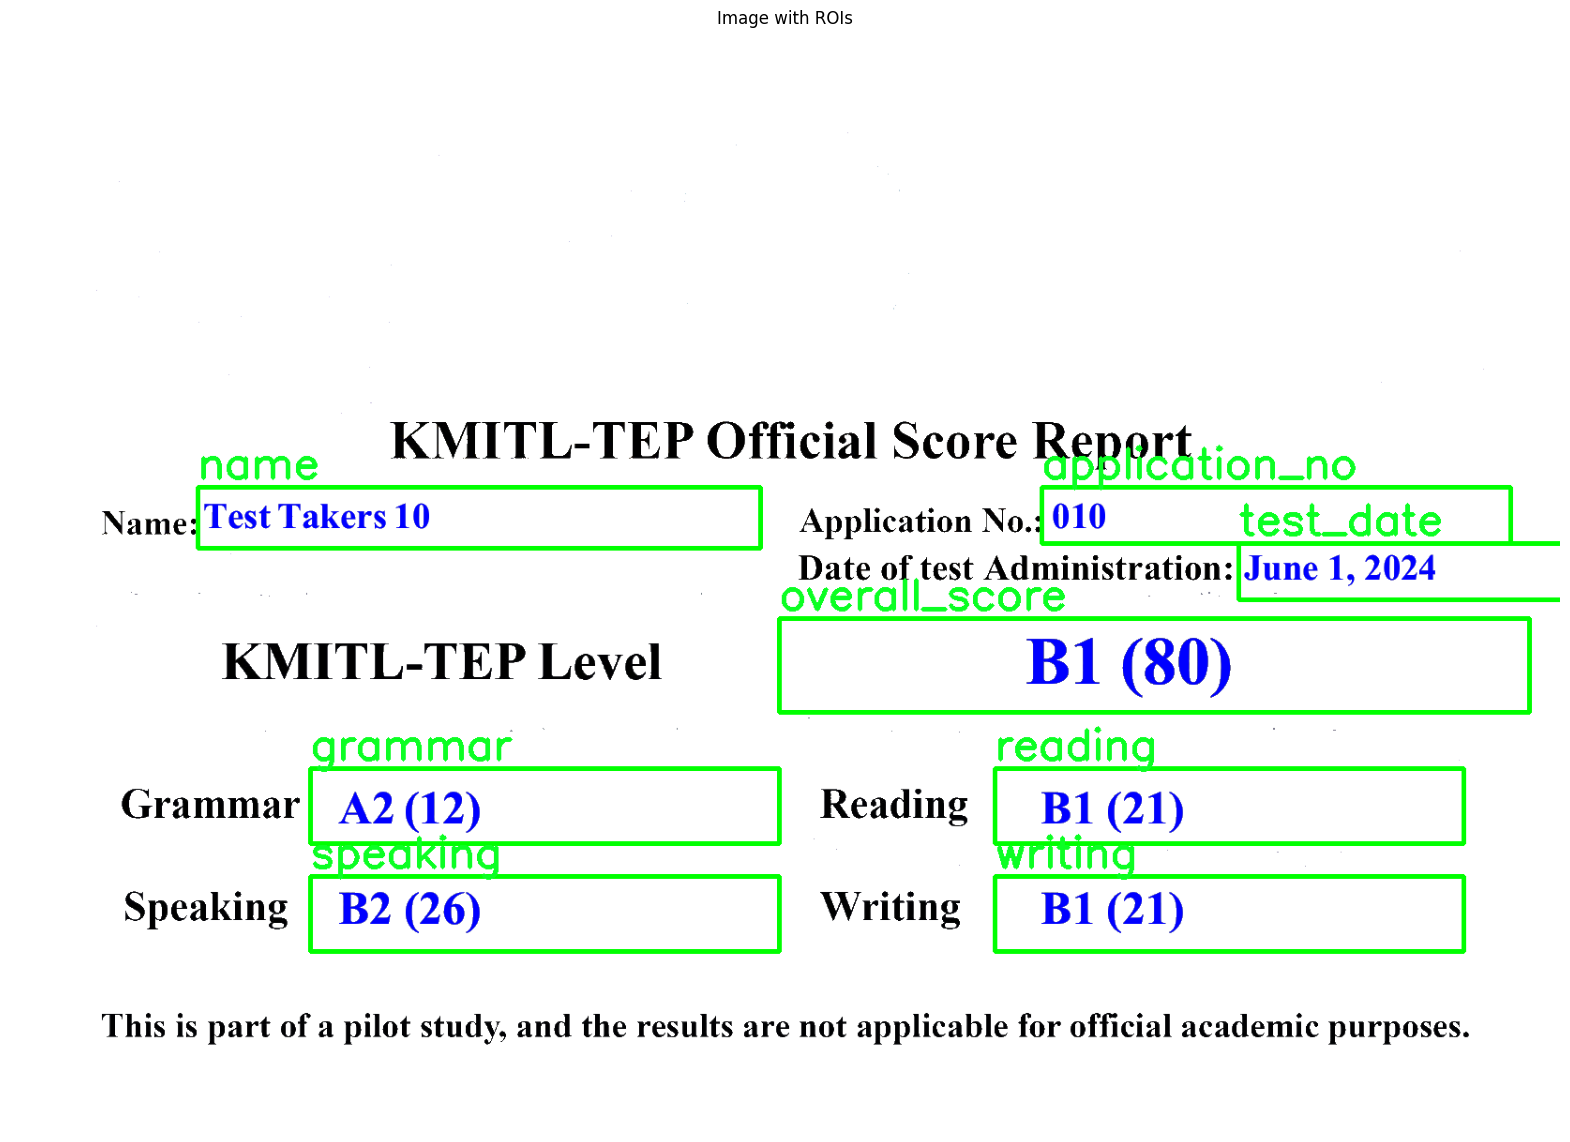

In [9]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt

# --- 1. กำหนดค่าและโหลดรูปภาพ ---
# สำหรับ Windows, หากจำเป็นต้องระบุ Path ของ Tesseract
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# ระบุ Path ของรูปภาพที่คุณต้องการทดสอบ
IMAGE_PATH = "/content/drive/MyDrive/kmitl_dataset/final-preprecessed/KMITL-TEP PILOT-10.png"

# กำหนดพิกัดของแต่ละส่วนที่สนใจ (Region of Interest)
# รูปแบบคือ: (x_start, y_start, width, height)
ROI_CONFIG = {
    "name":          (200, 485, 600, 65),
    "application_no": (1100, 485, 500, 60),
    "test_date":     (1310, 545, 400, 60),
    "overall_score": (820, 625, 800, 100),
    "grammar":       (320, 785, 500, 80),
    "reading":       (1050, 785, 500, 80),
    "speaking":      (320, 900, 500, 80),
    "writing":       (1050, 900, 500, 80),
}

# --- 2. โหลดและประมวลผลรูปภาพ ---
image = cv2.imread(IMAGE_PATH)
if image is None:
    print(f"ไม่สามารถโหลดรูปภาพได้จาก: {IMAGE_PATH}")
else:
    # สร้าง Dictionary ว่างสำหรับเก็บข้อมูลที่สกัดได้
    extracted_data = {}

    # สร้างสำเนาของรูปภาพเพื่อวาดกรอบสี่เหลี่ยม (สำหรับแสดงผล)
    image_with_boxes = image.copy()

    # --- 3. วนลูปเพื่อสกัดข้อมูลตาม ROI_CONFIG ---
    print("กำลังสกัดข้อมูลตามพิกัด ROI...")
    for field_name, (x, y, w, h) in ROI_CONFIG.items():

        # 3.1 ตัดภาพ (Crop) ตามพิกัดที่กำหนด
        roi_image = image[y:y+h, x:x+w]

        # 3.2 ประมวลผลภาพชิ้นเล็กๆ (ROI) เพื่อเพิ่มความแม่นยำ
        # แปลงเป็น Grayscale และทำ Binarization
        gray_roi = cv2.cvtColor(roi_image, cv2.COLOR_BGR2GRAY)
        # เพิ่มความละเอียดของภาพ ROI เพื่อให้ Tesseract อ่านได้ดีขึ้น
        upscaled_roi = cv2.resize(gray_roi, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
        # ใช้ Thresholding เพื่อเปลี่ยนเป็นภาพขาว-ดำที่คมชัด
        _, binary_roi = cv2.threshold(upscaled_roi, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # 3.3 ทำ OCR กับภาพ ROI ที่ประมวลผลแล้ว
        # ใช้ Page Segmentation Mode (PSM) 7 ซึ่งเหมาะสำหรับข้อความบรรทัดเดียว
        custom_config = r'--oem 3 --psm 7 -l eng'
        text = pytesseract.image_to_string(binary_roi, config=custom_config)

        # 3.4 ทำความสะอาดและเก็บผลลัพธ์
        cleaned_text = text.strip()
        extracted_data[field_name] = cleaned_text
        print(f"  - {field_name}: '{cleaned_text}'")

        # 3.5 วาดกรอบสี่เหลี่ยมบนภาพสำเนาเพื่อแสดงผล
        cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 3)
        cv2.putText(image_with_boxes, field_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (36, 255, 12), 3)


    # --- 4. สรุปผลลัพธ์ ---
    print("\n--- สรุปข้อมูลที่สกัดได้ ---")
    print(extracted_data)

    # --- 5. แสดงภาพพร้อมกรอบ ROI ---
    # แปลง BGR เป็น RGB เพื่อให้ Matplotlib แสดงสีถูกต้อง
    plt.figure(figsize=(20, 15))
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.title('Image with ROIs')
    plt.axis('off')
    plt.show()

**Final auto pytes update to master file**

In [10]:
!pip install jiwer

In [11]:
import cv2
import pandas as pd
import os
import re
import jiwer
import numpy as np
import pytesseract

# --- 1. กำหนดค่าและ Path ที่สำคัญ ---
# ⬇️ เปลี่ยนแค่ 2 บรรทัดนี้
MODEL_NAME = 'Pytesseract'
INDIVIDUAL_REPORT_PATH = "/content/drive/MyDrive/kmitl_dataset/final-excel/pytesseract_boxing_report.xlsx"

# Path สำหรับไฟล์ Master จะใช้ชื่อเดิมเพื่อรวบรวมผล
APPROACH_NAME = 'Boxing'
MASTER_OUTPUT_PATH = "/content/drive/MyDrive/kmitl_dataset/final-excel/final_comparison_report.xlsx"

IMAGE_DIR = "/content/drive/MyDrive/kmitl_dataset/final-preprecessed"
GROUND_TRUTH_PATH = "/content/drive/MyDrive/kmitl_dataset/dataset/คะแนน TEP (Pilot Study)_Total_IT.xlsx"

ROI_CONFIG = {
    "name":           (200, 485, 600, 65),
    "application_no": (1100, 485, 500, 60),
    "test_date":      (1310, 545, 400, 60),
    "total":          (820, 625, 800, 100),
    "grammar":        (320, 785, 500, 80),
    "reading":        (1050, 785, 500, 80),
    "speaking":       (320, 900, 500, 80),
    "writing":        (1050, 900, 500, 80),
}

# --- 2. ฟังก์ชันช่วยเหลือ (ฉบับสมบูรณ์) ---
def parse_score(text):
    if not text: return None, None
    processed_text = text.replace('l', '1').replace('I', '1')
    match = re.search(r'([A-Z][1-2])\s*\((\d+)\)', processed_text, re.IGNORECASE)
    if match:
        return match.group(1).upper(), match.group(2)
    return None, None

def get_id_from_filename(filename):
    match = re.search(r'(\d+)\.(png|jpg|jpeg)$', filename.lower())
    if match: return int(match.group(1))
    return None

def normalize_text(text):
    if text is None: return ""
    text = str(text).strip().lower()
    if text.endswith('.0'): text = text[:-2]
    return text

# --- 3. โหลดและตรวจสอบข้อมูลก่อนเริ่ม (เหมือนเดิม) ---
print("--- 🔍 ขั้นตอนตรวจสอบข้อมูล ---")
gt_df = pd.read_excel(GROUND_TRUTH_PATH)
ground_truth_ids = set(gt_df['No.'].unique())
print(f"พบ ID ใน Ground Truth ทั้งหมด: {len(ground_truth_ids)} ID")
allowed_extensions = ['.png', '.jpg', '.jpeg']
all_files_in_dir = os.listdir(IMAGE_DIR)
image_files = [f for f in all_files_in_dir if f.lower().endswith(tuple(allowed_extensions))]
image_files.sort(key=get_id_from_filename)
print(f"พบไฟล์รูปภาพในโฟลเดอร์: {len(image_files)} ไฟล์")
print("--- ✅ ตรวจสอบข้อมูลเสร็จสิ้น ---\n")

# --- 4. เริ่มกระบวนการสกัดข้อมูลด้วย Pytesseract ---
results_list = []
print(f"--- 🚀 เริ่มการสกัดข้อมูลจากรูปภาพ {len(image_files)} ไฟล์ ด้วย {MODEL_NAME} ({APPROACH_NAME}) ---")
for filename in image_files:
    image_id = get_id_from_filename(filename)
    if image_id is None: continue
    gt_row = gt_df[gt_df['No.'] == image_id]
    if gt_row.empty: continue

    print(f"  - กำลังประมวลผล ID: {image_id} ({filename})")
    image_path = os.path.join(IMAGE_DIR, filename)
    image = cv2.imread(image_path)

    extracted_raw = {}
    for field_name, (x, y, w, h) in ROI_CONFIG.items():
        roi_image = image[y:y+h, x:x+w]

        # ⬇️ Preprocessing และ OCR สำหรับ Pytesseract
        gray_roi = cv2.cvtColor(roi_image, cv2.COLOR_BGR2GRAY)
        upscaled_roi = cv2.resize(gray_roi, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
        _, binary_roi = cv2.threshold(upscaled_roi, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        custom_config = r'--oem 3 --psm 7 -l eng'
        text = pytesseract.image_to_string(binary_roi, config=custom_config).strip()

        extracted_raw[field_name] = text

    # (ส่วน Parse และ Append to results_list เหมือนเดิม)
    g_level, g_score = parse_score(extracted_raw.get('grammar'))
    r_level, r_score = parse_score(extracted_raw.get('reading'))
    s_level, s_score = parse_score(extracted_raw.get('speaking'))
    w_level, w_score = parse_score(extracted_raw.get('writing'))
    t_level, t_score = parse_score(extracted_raw.get('total'))
    results_list.append({
        "No.": image_id,
        "Application No. (GT)": gt_row.iloc[0]["Application No."], "Application No. (Pred)": extracted_raw.get('application_no'),
        "Name (GT)": gt_row.iloc[0]["Name"], "Name (Pred)": extracted_raw.get('name'),
        "Test Date (GT)": gt_row.iloc[0]["Test Date"], "Test Date (Pred)": extracted_raw.get('test_date'),
        "Grammar_Level (GT)": gt_row.iloc[0]["Grammar_Level"], "Grammar_Level (Pred)": g_level,
        "Grammar_Score (GT)": gt_row.iloc[0]["Grammar_Score"], "Grammar_Score (Pred)": g_score,
        "Reading_Level (GT)": gt_row.iloc[0]["Reading_Level"], "Reading_Level (Pred)": r_level,
        "Reading_Score (GT)": gt_row.iloc[0]["Reading_Score"], "Reading_Score (Pred)": r_score,
        "Speaking_Level (GT)": gt_row.iloc[0]["Speaking_Level"], "Speaking_Level (Pred)": s_level,
        "Speaking_Score (GT)": gt_row.iloc[0]["Speaking_Score"], "Speaking_Score (Pred)": s_score,
        "Writing_Level (GT)": gt_row.iloc[0]["Writing_Level"], "Writing_Level (Pred)": w_level,
        "Writing_Score (GT)": gt_row.iloc[0]["Writing_Score"], "Writing_Score (Pred)": w_score,
        "Total_Level (GT)": gt_row.iloc[0]["Total_Level"], "Total_Level (Pred)": t_level,
        "Total_Score (GT)": gt_row.iloc[0]["Total_Score"], "Total_Score (Pred)": t_score,
    })

ocr_results_df = pd.DataFrame(results_list)
print("--- ✅ สกัดข้อมูลเสร็จสิ้น ---\n")

# --- 5. เริ่มกระบวนการประเมินผล (Evaluation) ---
# (ส่วนนี้เหมือนเดิมทุกประการ)
print("--- 📊 เริ่มการประเมินผล ---")
eval_df = ocr_results_df.fillna('')
fields_to_evaluate = {
    'Name': ('Name (GT)', 'Name (Pred)'), 'Application No.': ('Application No. (GT)', 'Application No. (Pred)'),
    'Test Date': ('Test Date (GT)', 'Test Date (Pred)'), 'Grammar_Level': ('Grammar_Level (GT)', 'Grammar_Level (Pred)'),
    'Grammar_Score': ('Grammar_Score (GT)', 'Grammar_Score (Pred)'), 'Reading_Level': ('Reading_Level (GT)', 'Reading_Level (Pred)'),
    'Reading_Score': ('Reading_Score (GT)', 'Reading_Score (Pred)'), 'Speaking_Level': ('Speaking_Level (GT)', 'Speaking_Level (Pred)'),
    'Speaking_Score': ('Speaking_Score (GT)', 'Speaking_Score (Pred)'), 'Writing_Level': ('Writing_Level (GT)', 'Writing_Level (Pred)'),
    'Writing_Score': ('Writing_Score (GT)', 'Writing_Score (Pred)'), 'Total_Level': ('Total_Level (GT)', 'Total_Level (Pred)'),
    'Total_Score': ('Total_Score (GT)', 'Total_Score (Pred)'),
}
evaluation_summary_list = []
for field, (gt_col, pred_col) in fields_to_evaluate.items():
    ground_truth = [normalize_text(t) for t in eval_df[gt_col]]
    prediction = [normalize_text(t) for t in eval_df[pred_col]]
    accuracy = np.mean([1 if gt == pred else 0 for gt, pred in zip(ground_truth, prediction)]) * 100
    error_metrics = jiwer.compute_measures(ground_truth, prediction)
    wer = error_metrics.get('wer', 0) * 100
    cer = error_metrics.get('cer', 0) * 100
    H = error_metrics.get('hits', 0); I = error_metrics.get('insertions', 0); D = error_metrics.get('deletions', 0); S = error_metrics.get('substitutions', 0)
    precision = H / (H + I + S) if (H + I + S) > 0 else 0
    recall = H / (H + D + S) if (H + D + S) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    evaluation_summary_list.append({
        'Field': field, 'Accuracy (%)': round(accuracy, 2), 'WER (%)': round(wer, 2),
        'CER (%)': round(cer, 2), 'F1-score (%)': round(f1_score * 100, 2)
    })
eval_summary_df = pd.DataFrame(evaluation_summary_list)
eval_summary_df.insert(0, 'Approach', APPROACH_NAME)
eval_summary_df.insert(0, 'Model', MODEL_NAME)
print(eval_summary_df.to_string(index=False))
print("--- ✅ ประเมินผลเสร็จสิ้น ---\n")


# --- 6. บันทึกผลลัพธ์ (ทำ 2 อย่าง) ---
# --- 6.A: บันทึกผลการทดลองนี้แยกไฟล์ (2 ชีต) ---
print(f"--- 💾 กำลังบันทึกรายงานเฉพาะของ {MODEL_NAME} ลงในไฟล์: {INDIVIDUAL_REPORT_PATH} ---")
with pd.ExcelWriter(INDIVIDUAL_REPORT_PATH, engine='openpyxl') as writer:
    ocr_results_df.to_excel(writer, sheet_name='Detailed_Results', index=False)
    eval_summary_df.drop(columns=['Model', 'Approach']).to_excel(writer, sheet_name='Evaluation_Summary', index=False)
print(f"🎉 บันทึกไฟล์ {INDIVIDUAL_REPORT_PATH} สำเร็จ!")

# --- 6.B: อัปเดตข้อมูลลง Master File สำหรับสร้างกราฟ ---
print(f"--- 💾 กำลังอัปเดตไฟล์ Master Report: {MASTER_OUTPUT_PATH} ---")
SHEET_NAME = 'Master_Evaluation'
try:
    with pd.ExcelFile(MASTER_OUTPUT_PATH) as xls:
        master_df = pd.read_excel(xls, sheet_name=SHEET_NAME)
        master_df = master_df[(master_df['Model'] != MODEL_NAME) | (master_df['Approach'] != APPROACH_NAME)]
    combined_df = pd.concat([master_df, eval_summary_df], ignore_index=True)
except FileNotFoundError:
    print(f"ไม่พบไฟล์ Master เดิม, กำลังสร้างไฟล์ใหม่...")
    combined_df = eval_summary_df
with pd.ExcelWriter(MASTER_OUTPUT_PATH, engine='openpyxl') as writer:
    combined_df.to_excel(writer, sheet_name=SHEET_NAME, index=False)

print(f"🎉 อัปเดตไฟล์ Master Report สำเร็จ!")

--- 🔍 ขั้นตอนตรวจสอบข้อมูล ---
พบ ID ใน Ground Truth ทั้งหมด: 120 ID
พบไฟล์รูปภาพในโฟลเดอร์: 120 ไฟล์
--- ✅ ตรวจสอบข้อมูลเสร็จสิ้น ---

--- 🚀 เริ่มการสกัดข้อมูลจากรูปภาพ 120 ไฟล์ ด้วย Pytesseract (Boxing) ---
  - กำลังประมวลผล ID: 1 (KMITL-TEP PILOT-1.png)
  - กำลังประมวลผล ID: 2 (KMITL-TEP PILOT-2.png)
  - กำลังประมวลผล ID: 3 (KMITL-TEP PILOT-3.png)
  - กำลังประมวลผล ID: 4 (KMITL-TEP PILOT-4.png)
  - กำลังประมวลผล ID: 5 (KMITL-TEP PILOT-5.png)
  - กำลังประมวลผล ID: 6 (KMITL-TEP PILOT-6.png)
  - กำลังประมวลผล ID: 7 (KMITL-TEP PILOT-7.png)
  - กำลังประมวลผล ID: 8 (KMITL-TEP PILOT-8.png)
  - กำลังประมวลผล ID: 9 (KMITL-TEP PILOT-9.png)
  - กำลังประมวลผล ID: 10 (KMITL-TEP PILOT-10.png)
  - กำลังประมวลผล ID: 11 (KMITL-TEP PILOT-11.png)
  - กำลังประมวลผล ID: 12 (KMITL-TEP PILOT-12.png)
  - กำลังประมวลผล ID: 13 (KMITL-TEP PILOT-13.png)
  - กำลังประมวลผล ID: 14 (KMITL-TEP PILOT-14.png)
  - กำลังประมวลผล ID: 15 (KMITL-TEP PILOT-15.png)
  - กำลังประมวลผล ID: 16 (KMITL-TEP PILOT-16.png)
  - กำลัง

# **Easy OCR Boxing**

In [12]:
!pip install easyocr
!pip install jiwer

In [13]:
import cv2
import pandas as pd
import os
import re
import jiwer
import numpy as np
import easyocr

Easy read B1 => Bl (L-lower) or BI (I)

--- 🕵️‍♂️ ผลการตรวจสอบ ROI แต่ละช่อง ---
  - กล่อง 'name': อ่านได้ -> 'Test Takers 1'
  - กล่อง 'application_no': อ่านได้ -> '001'
  - กล่อง 'test_date': อ่านได้ -> 'June 1,2024'
  - กล่อง 'total': อ่านได้ -> 'B1 (68)'
  - กล่อง 'grammar': อ่านได้ -> 'Bl (17)'
  - กล่อง 'reading': อ่านได้ -> 'Bl (17)'
  - กล่อง 'speaking': อ่านได้ -> 'Bl (18)'
  - กล่อง 'writing': อ่านได้ -> 'Bl (16)'


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3605 (\N{THAI CHARACTER TO TAO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3592 (\N{THAI CHARACTER CHO CHAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3626 (\N{THAI CHARACTER SO SUA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **k

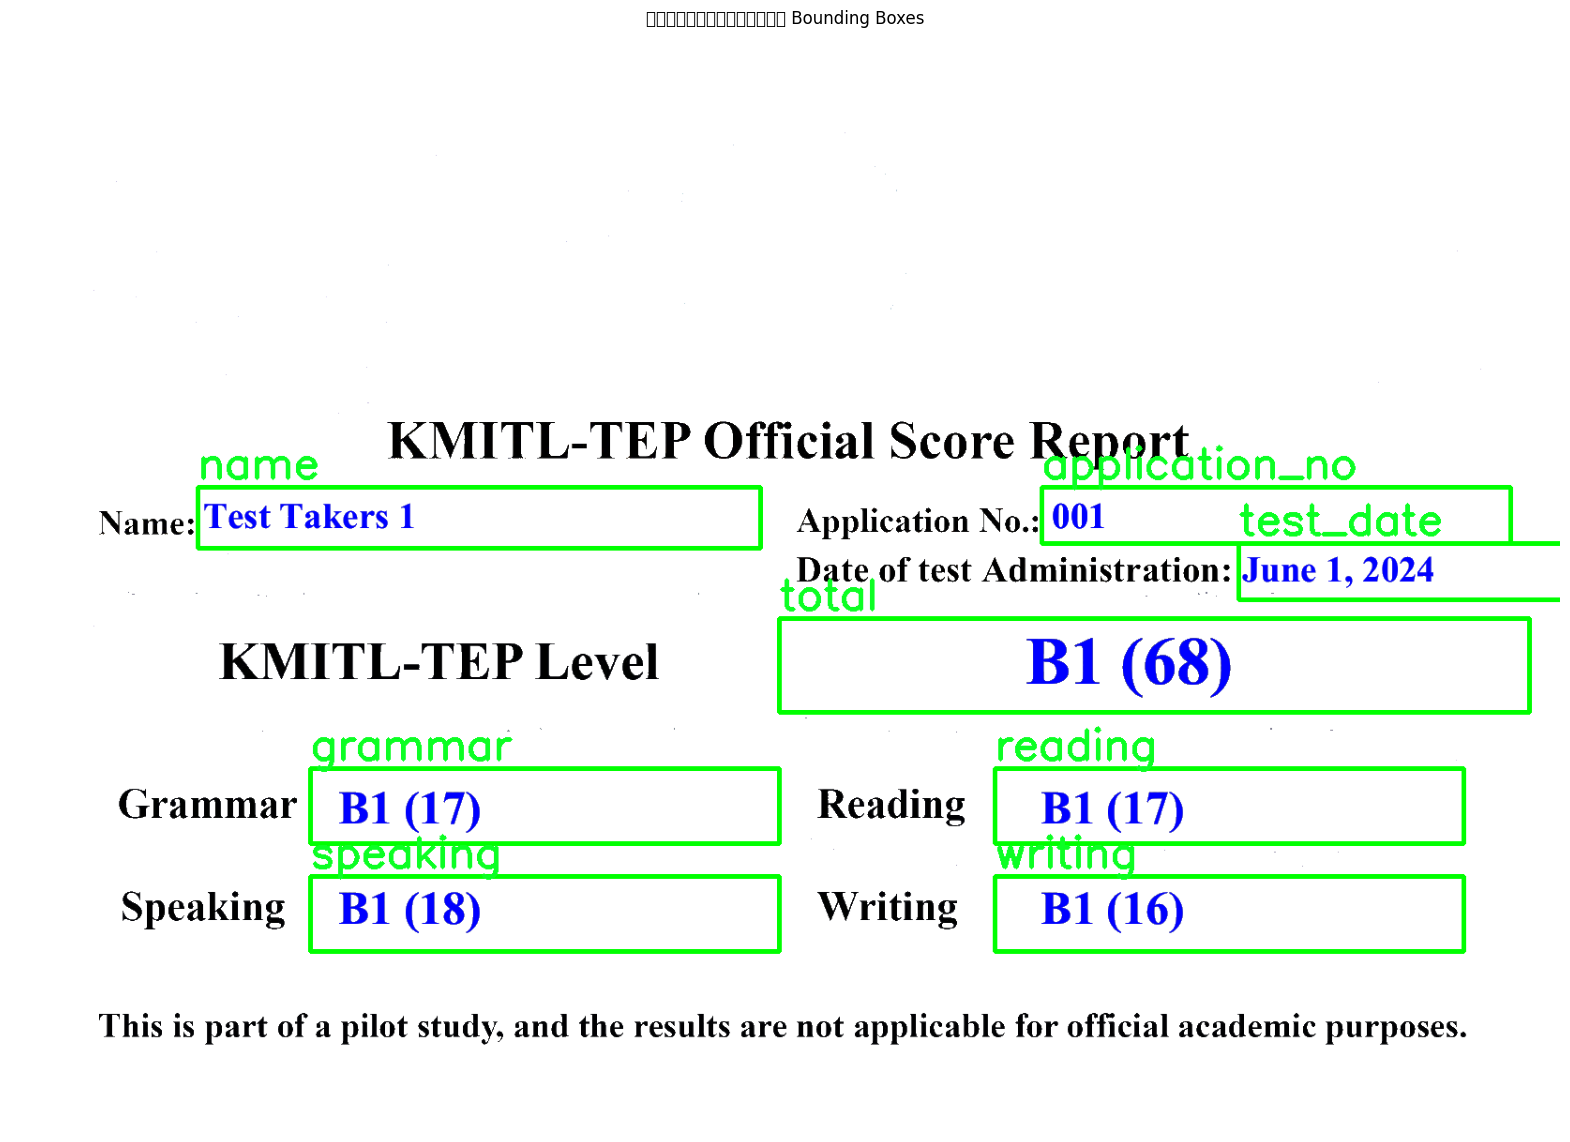

In [14]:
# --- โค้ดสำหรับดีบักและตรวจสอบ ROI ---
import cv2
import easyocr
import matplotlib.pyplot as plt

# 1. กำหนด Path รูปภาพตัวอย่างที่คุณต้องการตรวจสอบ
IMAGE_PATH_TO_DEBUG = "/content/drive/MyDrive/kmitl_dataset/final-preprecessed/KMITL-TEP PILOT-1.png" # ⬅️ ลองใช้รูปที่ 10 เป็นตัวอย่าง

# 2. กำหนดพิกัด ROI ที่คุณใช้อยู่ปัจจุบัน
ROI_CONFIG = {
    "name":           (200, 485, 600, 65),
    "application_no": (1100, 485, 500, 60),
    "test_date":      (1310, 545, 400, 60),
    "total":          (820, 625, 800, 100),
    "grammar":        (320, 785, 500, 80),
    "reading":        (1050, 785, 500, 80),
    "speaking":       (320, 900, 500, 80),
    "writing":        (1050, 900, 500, 80),
}

# 3. โหลดโมเดลและรูปภาพ
reader = easyocr.Reader(['en'])
image = cv2.imread(IMAGE_PATH_TO_DEBUG)
image_with_boxes = image.copy()

print("--- 🕵️‍♂️ ผลการตรวจสอบ ROI แต่ละช่อง ---")

# 4. วนลูปเพื่อวาดกล่องและสกัดข้อมูลทีละช่อง
for field_name, (x, y, w, h) in ROI_CONFIG.items():
    # ตัดภาพตามพิกัด
    roi_image = image[y:y+h, x:x+w]

    # ลองอ่านข้อความจากช่องนี้ด้วย EasyOCR
    ocr_result = reader.readtext(roi_image, detail=0, paragraph=True)
    text = " ".join(ocr_result).strip()

    # พิมพ์ผลลัพธ์ที่ได้จากกล่องนี้
    print(f"  - กล่อง '{field_name}': อ่านได้ -> '{text}'")

    # วาดกล่องสีเขียวลงบนภาพเพื่อดูตำแหน่ง
    cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 3)
    cv2.putText(image_with_boxes, field_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (36, 255, 12), 3)

# 5. แสดงภาพพร้อมกล่องทั้งหมด
plt.figure(figsize=(20, 15))
plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
plt.title('ตรวจสอบตำแหน่ง Bounding Boxes')
plt.axis('off')
plt.show()

In [15]:
import cv2
import pandas as pd
import os
import re
import jiwer
import numpy as np
import easyocr

# --- 1. กำหนดค่าและ Path ที่สำคัญ ---
IMAGE_DIR = "/content/drive/MyDrive/kmitl_dataset/final-preprecessed"
GROUND_TRUTH_PATH = "/content/drive/MyDrive/kmitl_dataset/dataset/คะแนน TEP (Pilot Study)_Total_IT.xlsx"
OUTPUT_EXCEL_PATH = "/content/drive/MyDrive/kmitl_dataset/final-excel/easyocr_full_report_with_f1.xlsx"

ROI_CONFIG = {
    "name":           (200, 485, 600, 65),
    "application_no": (1100, 485, 500, 60),
    "test_date":      (1310, 545, 400, 60),
    "total":          (820, 625, 800, 100),
    "grammar":        (320, 785, 500, 80),
    "reading":        (1050, 785, 500, 80),
    "speaking":       (320, 900, 500, 80),
    "writing":        (1050, 900, 500, 80),
}

# --- 2. ฟังก์ชันช่วยเหลือ (เหมือนเดิม) ---
def parse_score(text):
    match = re.search(r'([A-Z][1-2])\s*\((\d+)\)', text)
    if match:
        return match.group(1), match.group(2)
    return None, None

def get_id_from_filename(filename):
    match = re.search(r'(\d+)\.(png|jpg|jpeg)$', filename.lower())
    if match:
        return int(match.group(1))
    return None

# --- 3. โหลดและตรวจสอบข้อมูลก่อนเริ่ม (เหมือนเดิม) ---
print("--- 🔍 ขั้นตอนตรวจสอบข้อมูล ---")
gt_df = pd.read_excel(GROUND_TRUTH_PATH)
ground_truth_ids = set(gt_df['No.'].unique())
print(f"พบ ID ใน Ground Truth ทั้งหมด: {len(ground_truth_ids)} ID")
allowed_extensions = ['.png', '.jpg', '.jpeg']
all_files_in_dir = os.listdir(IMAGE_DIR)
image_files = [f for f in all_files_in_dir if f.lower().endswith(tuple(allowed_extensions))]
image_files.sort(key=get_id_from_filename)
# (ส่วนโค้ดตรวจสอบไฟล์ที่เหลือเหมือนเดิม)
print(f"พบไฟล์รูปภาพในโฟลเดอร์: {len(image_files)} ไฟล์")
print("--- ✅ ตรวจสอบข้อมูลเสร็จสิ้น ---\n")


# --- 4. เริ่มกระบวนการสกัดข้อมูลด้วย EasyOCR (เหมือนเดิม) ---
print("กำลังโหลดโมเดล EasyOCR...")
reader = easyocr.Reader(['en'])
print("โหลดโมเดลสำเร็จ!")

results_list = []
print(f"--- 🚀 เริ่มการสกัดข้อมูลจากรูปภาพ {len(image_files)} ไฟล์ ด้วย EasyOCR ---")
for filename in image_files:
    image_id = get_id_from_filename(filename)
    if image_id is None: continue
    gt_row = gt_df[gt_df['No.'] == image_id]
    if gt_row.empty: continue

    print(f"  - กำลังประมวลผล ID: {image_id} ({filename})")
    image_path = os.path.join(IMAGE_DIR, filename)
    image = cv2.imread(image_path)

    extracted_raw = {}
    for field_name, (x, y, w, h) in ROI_CONFIG.items():
        roi_image = image[y:y+h, x:x+w]
        gray_roi = cv2.cvtColor(roi_image, cv2.COLOR_BGR2GRAY)
        ocr_result = reader.readtext(gray_roi, detail=0, paragraph=True)
        text = " ".join(ocr_result).strip()
        extracted_raw[field_name] = text

    g_level, g_score = parse_score(extracted_raw.get('grammar', ''))
    r_level, r_score = parse_score(extracted_raw.get('reading', ''))
    s_level, s_score = parse_score(extracted_raw.get('speaking', ''))
    w_level, w_score = parse_score(extracted_raw.get('writing', ''))
    t_level, t_score = parse_score(extracted_raw.get('total', ''))
    results_list.append({
        "No.": image_id,
        "Application No. (GT)": gt_row.iloc[0]["Application No."], "Application No. (Pred)": extracted_raw.get('application_no'),
        "Name (GT)": gt_row.iloc[0]["Name"], "Name (Pred)": extracted_raw.get('name'),
        "Grammar_Level (GT)": gt_row.iloc[0]["Grammar_Level"], "Grammar_Level (Pred)": g_level,
        "Grammar_Score (GT)": gt_row.iloc[0]["Grammar_Score"], "Grammar_Score (Pred)": g_score,
        "Reading_Level (GT)": gt_row.iloc[0]["Reading_Level"], "Reading_Level (Pred)": r_level,
        "Reading_Score (GT)": gt_row.iloc[0]["Reading_Score"], "Reading_Score (Pred)": r_score,
        "Speaking_Level (GT)": gt_row.iloc[0]["Speaking_Level"], "Speaking_Level (Pred)": s_level,
        "Speaking_Score (GT)": gt_row.iloc[0]["Speaking_Score"], "Speaking_Score (Pred)": s_score,
        "Writing_Level (GT)": gt_row.iloc[0]["Writing_Level"], "Writing_Level (Pred)": w_level,
        "Writing_Score (GT)": gt_row.iloc[0]["Writing_Score"], "Writing_Score (Pred)": w_score,
        "Total_Level (GT)": gt_row.iloc[0]["Total_Level"], "Total_Level (Pred)": t_level,
        "Total_Score (GT)": gt_row.iloc[0]["Total_Score"], "Total_Score (Pred)": t_score,
        "Test Date (GT)": gt_row.iloc[0]["Test Date"], "Test Date (Pred)": extracted_raw.get('test_date'),
    })

ocr_results_df = pd.DataFrame(results_list)
print("--- ✅ สกัดข้อมูลเสร็จสิ้น ---\n")


# --- 5. เริ่มกระบวนการประเมินผล (Evaluation) ---
print("--- 📊 เริ่มการประเมินผล ---")
eval_df = ocr_results_df.fillna('')

# ⬇️ 1. อัปเดต fields_to_evaluate ให้ครอบคลุมทุกฟิลด์
fields_to_evaluate = {
    'Name': ('Name (GT)', 'Name (Pred)'),
    'Application No.': ('Application No. (GT)', 'Application No. (Pred)'),
    'Test Date': ('Test Date (GT)', 'Test Date (Pred)'),
    'Grammar_Level': ('Grammar_Level (GT)', 'Grammar_Level (Pred)'),
    'Grammar_Score': ('Grammar_Score (GT)', 'Grammar_Score (Pred)'),
    'Reading_Level': ('Reading_Level (GT)', 'Reading_Level (Pred)'),
    'Reading_Score': ('Reading_Score (GT)', 'Reading_Score (Pred)'),
    'Speaking_Level': ('Speaking_Level (GT)', 'Speaking_Level (Pred)'),
    'Speaking_Score': ('Speaking_Score (GT)', 'Speaking_Score (Pred)'),
    'Writing_Level': ('Writing_Level (GT)', 'Writing_Level (Pred)'),
    'Writing_Score': ('Writing_Score (GT)', 'Writing_Score (Pred)'),
    'Total_Level': ('Total_Level (GT)', 'Total_Level (Pred)'),
    'Total_Score': ('Total_Score (GT)', 'Total_Score (Pred)'),
}

evaluation_summary_list = []
for field, (gt_col, pred_col) in fields_to_evaluate.items():
    ground_truth = eval_df[gt_col].astype(str).tolist()
    prediction = eval_df[pred_col].astype(str).tolist()

    accuracy = np.mean([1 if gt == pred else 0 for gt, pred in zip(ground_truth, prediction)]) * 100

    # ⬇️ 2. คำนวณ Metrics ทั้งหมด รวมถึง F1-Score
    error_metrics = jiwer.compute_measures(ground_truth, prediction)

    # ดึงค่าต่างๆ ออกมาอย่างปลอดภัยด้วย .get() เพื่อป้องกัน KeyError
    wer = error_metrics.get('wer', 0) * 100
    cer = error_metrics.get('cer', 0) * 100

    # คำนวณ Precision, Recall, และ F1-score
    H = error_metrics.get('hits', 0)
    I = error_metrics.get('insertions', 0)
    D = error_metrics.get('deletions', 0)

    precision = H / (H + I) if (H + I) > 0 else 0
    recall = H / (H + D) if (H + D) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    evaluation_summary_list.append({
        'Field': field,
        'Accuracy (%)': round(accuracy, 2),
        'WER (%)': round(wer, 2),
        'CER (%)': round(cer, 2),
        'F1-score (%)': round(f1_score * 100, 2) # ⬅️ 3. เพิ่ม F1-score ในผลลัพธ์
    })

eval_summary_df = pd.DataFrame(evaluation_summary_list)
print(eval_summary_df.to_string(index=False))
print("--- ✅ ประเมินผลเสร็จสิ้น ---\n")


# --- 6. บันทึกผลลัพธ์ทั้งหมดลงไฟล์ Excel เดียว (2 ชีต) ---
print(f"--- 💾 กำลังบันทึกผลลัพธ์ลงในไฟล์: {OUTPUT_EXCEL_PATH} ---")
with pd.ExcelWriter(OUTPUT_EXCEL_PATH, engine='openpyxl') as writer:
    ocr_results_df.to_excel(writer, sheet_name='Detailed_Results', index=False)
    eval_summary_df.to_excel(writer, sheet_name='Evaluation_Summary', index=False)
print(f"🎉 บันทึกไฟล์สำเร็จ! ตรวจสอบผลลัพธ์ได้ที่ '{OUTPUT_EXCEL_PATH}'")

--- 🔍 ขั้นตอนตรวจสอบข้อมูล ---
พบ ID ใน Ground Truth ทั้งหมด: 120 ID
พบไฟล์รูปภาพในโฟลเดอร์: 120 ไฟล์
--- ✅ ตรวจสอบข้อมูลเสร็จสิ้น ---

กำลังโหลดโมเดล EasyOCR...
โหลดโมเดลสำเร็จ!
--- 🚀 เริ่มการสกัดข้อมูลจากรูปภาพ 120 ไฟล์ ด้วย EasyOCR ---
  - กำลังประมวลผล ID: 1 (KMITL-TEP PILOT-1.png)
  - กำลังประมวลผล ID: 2 (KMITL-TEP PILOT-2.png)
  - กำลังประมวลผล ID: 3 (KMITL-TEP PILOT-3.png)
  - กำลังประมวลผล ID: 4 (KMITL-TEP PILOT-4.png)
  - กำลังประมวลผล ID: 5 (KMITL-TEP PILOT-5.png)
  - กำลังประมวลผล ID: 6 (KMITL-TEP PILOT-6.png)
  - กำลังประมวลผล ID: 7 (KMITL-TEP PILOT-7.png)
  - กำลังประมวลผล ID: 8 (KMITL-TEP PILOT-8.png)
  - กำลังประมวลผล ID: 9 (KMITL-TEP PILOT-9.png)
  - กำลังประมวลผล ID: 10 (KMITL-TEP PILOT-10.png)
  - กำลังประมวลผล ID: 11 (KMITL-TEP PILOT-11.png)
  - กำลังประมวลผล ID: 12 (KMITL-TEP PILOT-12.png)
  - กำลังประมวลผล ID: 13 (KMITL-TEP PILOT-13.png)
  - กำลังประมวลผล ID: 14 (KMITL-TEP PILOT-14.png)
  - กำลังประมวลผล ID: 15 (KMITL-TEP PILOT-15.png)
  - กำลังประมวลผล ID: 16 (KMI

นี่คือจุดที่ผิดพลาด:

1. EasyOCR อ่านผิด: โมเดล OCR มักจะสับสนระหว่างตัวเลข 1 กับตัวอักษร l (L พิมพ์เล็ก) หรือ I (i พิมพ์ใหญ่) ในกรณีนี้ มันอ่าน B1 เป็น Bl
2. ฟังก์ชัน parse_score เข้มงวดเกินไป: โค้ดในฟังก์ชัน parse_score ของเราใช้
Regular Expression r'([A-Z][1-2])' ซึ่งหมายความว่ามันมองหา "ตัวอักษรพิมพ์ใหญ่ A-Z" ตามด้วย "ตัวเลข 1 หรือ 2" เท่านั้น
3. ผลลัพธ์: เมื่อ parse_score ได้รับข้อความ 'Bl (17)' เข้ามา มันไม่ตรงกับแพทเทิร์นที่กำหนด (เพราะ l ไม่ใช่ 1 หรือ 2) ฟังก์ชันจึงคืนค่า (None, None) ออกไป ทำให้คอลัมน์ (Pred) ใน Excel ของคุณว่างเปล่า และทำให้การประเมินผลรวนไปทั้งหมดครับ

In [16]:
import cv2
import pandas as pd
import os
import re
import jiwer
import numpy as np
import easyocr

# --- 1. กำหนดค่าและ Path ที่สำคัญ ---
IMAGE_DIR = "/content/drive/MyDrive/kmitl_dataset/final-preprecessed"
GROUND_TRUTH_PATH = "/content/drive/MyDrive/kmitl_dataset/dataset/คะแนน TEP (Pilot Study)_Total_IT.xlsx"
OUTPUT_EXCEL_PATH = "/content/drive/MyDrive/kmitl_dataset/final-excel/easyocr_final_report_single_sheet.xlsx"

ROI_CONFIG = {
    "name":           (200, 485, 600, 65),
    "application_no": (1100, 485, 500, 60),
    "test_date":      (1310, 545, 400, 60),
    "total":          (820, 625, 800, 100),
    "grammar":        (320, 785, 500, 80),
    "reading":        (1050, 785, 500, 80),
    "speaking":       (320, 900, 500, 80),
    "writing":        (1050, 900, 500, 80),
}

# --- 2. ฟังก์ชันช่วยเหลือ (ฉบับแก้ไข) ---
def parse_score(text):
    if not text: return None, None
    processed_text = text.replace('l', '1').replace('I', '1')
    match = re.search(r'([A-Z][1-2])\s*\((\d+)\)', processed_text, re.IGNORECASE)
    if match:
        level = match.group(1).upper()
        score = match.group(2)
        return level, score
    return None, None

def get_id_from_filename(filename):
    match = re.search(r'(\d+)\.(png|jpg|jpeg)$', filename.lower())
    if match: return int(match.group(1))
    return None

# --- 3. โหลดและตรวจสอบข้อมูลก่อนเริ่ม (เหมือนเดิม) ---
print("--- 🔍 ขั้นตอนตรวจสอบข้อมูล ---")
gt_df = pd.read_excel(GROUND_TRUTH_PATH)
ground_truth_ids = set(gt_df['No.'].unique())
print(f"พบ ID ใน Ground Truth ทั้งหมด: {len(ground_truth_ids)} ID")
allowed_extensions = ['.png', '.jpg', '.jpeg']
all_files_in_dir = os.listdir(IMAGE_DIR)
image_files = [f for f in all_files_in_dir if f.lower().endswith(tuple(allowed_extensions))]
image_files.sort(key=get_id_from_filename)
print(f"พบไฟล์รูปภาพในโฟลเดอร์: {len(image_files)} ไฟล์")
print("--- ✅ ตรวจสอบข้อมูลเสร็จสิ้น ---\n")

# --- 4. เริ่มกระบวนการสกัดข้อมูลด้วย EasyOCR (เหมือนเดิม) ---
print("กำลังโหลดโมเดล EasyOCR...")
reader = easyocr.Reader(['en'])
print("โหลดโมเดลสำเร็จ!")

results_list = []
print(f"--- 🚀 เริ่มการสกัดข้อมูลจากรูปภาพ {len(image_files)} ไฟล์ ด้วย EasyOCR ---")
for filename in image_files:
    image_id = get_id_from_filename(filename)
    if image_id is None: continue
    gt_row = gt_df[gt_df['No.'] == image_id]
    if gt_row.empty: continue

    print(f"  - กำลังประมวลผล ID: {image_id} ({filename})")
    image_path = os.path.join(IMAGE_DIR, filename)
    image = cv2.imread(image_path)

    extracted_raw = {}
    for field_name, (x, y, w, h) in ROI_CONFIG.items():
        roi_image = image[y:y+h, x:x+w]
        gray_roi = cv2.cvtColor(roi_image, cv2.COLOR_BGR2GRAY)
        ocr_result = reader.readtext(gray_roi, detail=0, paragraph=True)
        text = " ".join(ocr_result).strip()
        extracted_raw[field_name] = text

    g_level, g_score = parse_score(extracted_raw.get('grammar'))
    r_level, r_score = parse_score(extracted_raw.get('reading'))
    s_level, s_score = parse_score(extracted_raw.get('speaking'))
    w_level, w_score = parse_score(extracted_raw.get('writing'))
    t_level, t_score = parse_score(extracted_raw.get('total'))

    results_list.append({
        "No.": image_id,
        "Application No. (GT)": gt_row.iloc[0]["Application No."], "Application No. (Pred)": extracted_raw.get('application_no'),
        "Name (GT)": gt_row.iloc[0]["Name"], "Name (Pred)": extracted_raw.get('name'),
        "Grammar_Level (GT)": gt_row.iloc[0]["Grammar_Level"], "Grammar_Level (Pred)": g_level,
        "Grammar_Score (GT)": gt_row.iloc[0]["Grammar_Score"], "Grammar_Score (Pred)": g_score,
        "Reading_Level (GT)": gt_row.iloc[0]["Reading_Level"], "Reading_Level (Pred)": r_level,
        "Reading_Score (GT)": gt_row.iloc[0]["Reading_Score"], "Reading_Score (Pred)": r_score,
        "Speaking_Level (GT)": gt_row.iloc[0]["Speaking_Level"], "Speaking_Level (Pred)": s_level,
        "Speaking_Score (GT)": gt_row.iloc[0]["Speaking_Score"], "Speaking_Score (Pred)": s_score,
        "Writing_Level (GT)": gt_row.iloc[0]["Writing_Level"], "Writing_Level (Pred)": w_level,
        "Writing_Score (GT)": gt_row.iloc[0]["Writing_Score"], "Writing_Score (Pred)": w_score,
        "Total_Level (GT)": gt_row.iloc[0]["Total_Level"], "Total_Level (Pred)": t_level,
        "Total_Score (GT)": gt_row.iloc[0]["Total_Score"], "Total_Score (Pred)": t_score,
        "Test Date (GT)": gt_row.iloc[0]["Test Date"], "Test Date (Pred)": extracted_raw.get('test_date'),
    })

ocr_results_df = pd.DataFrame(results_list)
print("--- ✅ สกัดข้อมูลเสร็จสิ้น ---\n")


# --- 5. เริ่มกระบวนการประเมินผล (Evaluation) - (นำ F1-Score กลับมา) ---
print("--- 📊 เริ่มการประเมินผล ---")

def normalize_text(text):
    if text is None: return ""
    text = str(text).strip().lower()
    if text.endswith('.0'): text = text[:-2]
    return text

eval_df = ocr_results_df.fillna('')

fields_to_evaluate = {
    'Name': ('Name (GT)', 'Name (Pred)'), 'Application No.': ('Application No. (GT)', 'Application No. (Pred)'),
    'Test Date': ('Test Date (GT)', 'Test Date (Pred)'), 'Grammar_Level': ('Grammar_Level (GT)', 'Grammar_Level (Pred)'),
    'Grammar_Score': ('Grammar_Score (GT)', 'Grammar_Score (Pred)'), 'Reading_Level': ('Reading_Level (GT)', 'Reading_Level (Pred)'),
    'Reading_Score': ('Reading_Score (GT)', 'Reading_Score (Pred)'), 'Speaking_Level': ('Speaking_Level (GT)', 'Speaking_Level (Pred)'),
    'Speaking_Score': ('Speaking_Score (GT)', 'Speaking_Score (Pred)'), 'Writing_Level': ('Writing_Level (GT)', 'Writing_Level (Pred)'),
    'Writing_Score': ('Writing_Score (GT)', 'Writing_Score (Pred)'), 'Total_Level': ('Total_Level (GT)', 'Total_Level (Pred)'),
    'Total_Score': ('Total_Score (GT)', 'Total_Score (Pred)'),
}

evaluation_summary_list = []
for field, (gt_col, pred_col) in fields_to_evaluate.items():
    ground_truth = [normalize_text(t) for t in eval_df[gt_col]]
    prediction = [normalize_text(t) for t in eval_df[pred_col]]

    accuracy = np.mean([1 if gt == pred else 0 for gt, pred in zip(ground_truth, prediction)]) * 100

    # ใช้ compute_measures เพื่อคำนวณทุกอย่างในครั้งเดียว
    error_metrics = jiwer.compute_measures(ground_truth, prediction)
    wer = error_metrics.get('wer', 0) * 100
    cer = error_metrics.get('cer', 0) * 100

    # คำนวณ F1-score จากองค์ประกอบ
    H = error_metrics.get('hits', 0)
    I = error_metrics.get('insertions', 0)
    D = error_metrics.get('deletions', 0)
    S = error_metrics.get('substitutions', 0)

    precision = H / (H + I + S) if (H + I + S) > 0 else 0
    recall = H / (H + D + S) if (H + D + S) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    evaluation_summary_list.append({
        'Field': field,
        'Accuracy (%)': round(accuracy, 2),
        'WER (%)': round(wer, 2),
        'CER (%)': round(cer, 2),
        'F1-score (%)': round(f1_score * 100, 2)
    })

eval_summary_df = pd.DataFrame(evaluation_summary_list)
print(eval_summary_df.to_string(index=False))
print("--- ✅ ประเมินผลเสร็จสิ้น ---\n")


# ⬇️⬇️⬇️ --- 6. บันทึกผลลัพธ์ทั้งหมดลงไฟล์ Excel เดียว (ชีตเดียว) --- ⬇️⬇️⬇️
print(f"--- 💾 กำลังบันทึกผลลัพธ์ลงในไฟล์: {OUTPUT_EXCEL_PATH} ---")
SHEET_NAME = 'EasyOCR_Result'

with pd.ExcelWriter(OUTPUT_EXCEL_PATH, engine='openpyxl') as writer:
    # เขียนตารางผลลัพธ์แบบละเอียดก่อน
    ocr_results_df.to_excel(writer, sheet_name=SHEET_NAME, index=False)

    # คำนวณคอลัมน์เริ่มต้นสำหรับตารางสรุป (เว้น 2 คอลัมน์)
    start_col_for_summary = ocr_results_df.shape[1] + 2

    # เขียนตารางสรุปผลลงในชีตเดียวกัน
    eval_summary_df.to_excel(writer, sheet_name=SHEET_NAME, index=False, startcol=start_col_for_summary)

print(f"🎉 บันทึกไฟล์สำเร็จ! ตรวจสอบผลลัพธ์ได้ที่ '{OUTPUT_EXCEL_PATH}' ในชีต '{SHEET_NAME}'")

--- 🔍 ขั้นตอนตรวจสอบข้อมูล ---
พบ ID ใน Ground Truth ทั้งหมด: 120 ID
พบไฟล์รูปภาพในโฟลเดอร์: 120 ไฟล์
--- ✅ ตรวจสอบข้อมูลเสร็จสิ้น ---

กำลังโหลดโมเดล EasyOCR...
โหลดโมเดลสำเร็จ!
--- 🚀 เริ่มการสกัดข้อมูลจากรูปภาพ 120 ไฟล์ ด้วย EasyOCR ---
  - กำลังประมวลผล ID: 1 (KMITL-TEP PILOT-1.png)
  - กำลังประมวลผล ID: 2 (KMITL-TEP PILOT-2.png)
  - กำลังประมวลผล ID: 3 (KMITL-TEP PILOT-3.png)
  - กำลังประมวลผล ID: 4 (KMITL-TEP PILOT-4.png)
  - กำลังประมวลผล ID: 5 (KMITL-TEP PILOT-5.png)
  - กำลังประมวลผล ID: 6 (KMITL-TEP PILOT-6.png)
  - กำลังประมวลผล ID: 7 (KMITL-TEP PILOT-7.png)
  - กำลังประมวลผล ID: 8 (KMITL-TEP PILOT-8.png)
  - กำลังประมวลผล ID: 9 (KMITL-TEP PILOT-9.png)
  - กำลังประมวลผล ID: 10 (KMITL-TEP PILOT-10.png)
  - กำลังประมวลผล ID: 11 (KMITL-TEP PILOT-11.png)
  - กำลังประมวลผล ID: 12 (KMITL-TEP PILOT-12.png)
  - กำลังประมวลผล ID: 13 (KMITL-TEP PILOT-13.png)
  - กำลังประมวลผล ID: 14 (KMITL-TEP PILOT-14.png)
  - กำลังประมวลผล ID: 15 (KMITL-TEP PILOT-15.png)
  - กำลังประมวลผล ID: 16 (KMI

**Final Update to master file**

In [17]:
import cv2
import pandas as pd
import os
import re
import jiwer
import numpy as np
import easyocr

# --- 1. กำหนดค่าและ Path ที่สำคัญ ---
MODEL_NAME = 'EasyOCR'
APPROACH_NAME = 'Boxing'

# ⬇️ Path สำหรับบันทึกไฟล์ผลลัพธ์ของโมเดลนี้โดยเฉพาะ (2 ชีต)
INDIVIDUAL_REPORT_PATH = "/content/drive/MyDrive/kmitl_dataset/final-excel/easyocr_boxing_report.xlsx"
# ⬇️ Path สำหรับไฟล์ Master ที่จะรวบรวมผลจากทุกโมเดล
MASTER_OUTPUT_PATH = "/content/drive/MyDrive/kmitl_dataset/final-excel/final_comparison_report.xlsx"

IMAGE_DIR = "/content/drive/MyDrive/kmitl_dataset/final-preprecessed"
GROUND_TRUTH_PATH = "/content/drive/MyDrive/kmitl_dataset/dataset/คะแนน TEP (Pilot Study)_Total_IT.xlsx"

ROI_CONFIG = {
    "name":           (200, 485, 600, 65),
    "application_no": (1100, 485, 500, 60),
    "test_date":      (1310, 545, 400, 60),
    "total":          (820, 625, 800, 100),
    "grammar":        (320, 785, 500, 80),
    "reading":        (1050, 785, 500, 80),
    "speaking":       (320, 900, 500, 80),
    "writing":        (1050, 900, 500, 80),
}

# --- 2. ฟังก์ชันช่วยเหลือ (ฉบับสมบูรณ์) ---
def parse_score(text):
    if not text: return None, None
    processed_text = text.replace('l', '1').replace('I', '1')
    match = re.search(r'([A-Z][1-2])\s*\((\d+)\)', processed_text, re.IGNORECASE)
    if match: return match.group(1).upper(), match.group(2)
    return None, None

def get_id_from_filename(filename):
    match = re.search(r'(\d+)\.(png|jpg|jpeg)$', filename.lower())
    if match: return int(match.group(1))
    return None

def normalize_text(text):
    if text is None: return ""
    text = str(text).strip().lower()
    if text.endswith('.0'): text = text[:-2]
    return text

# --- 3. & 4. โหลดและสกัดข้อมูล (เหมือนเดิม) ---
# ... (โค้ดส่วนนี้ไม่มีการเปลี่ยนแปลง) ...
print("--- 🔍 ขั้นตอนตรวจสอบข้อมูล ---")
gt_df = pd.read_excel(GROUND_TRUTH_PATH)
ground_truth_ids = set(gt_df['No.'].unique())
print(f"พบ ID ใน Ground Truth ทั้งหมด: {len(ground_truth_ids)} ID")
allowed_extensions = ['.png', '.jpg', '.jpeg']
all_files_in_dir = os.listdir(IMAGE_DIR)
image_files = [f for f in all_files_in_dir if f.lower().endswith(tuple(allowed_extensions))]
image_files.sort(key=get_id_from_filename)
print(f"พบไฟล์รูปภาพในโฟลเดอร์: {len(image_files)} ไฟล์")
print("--- ✅ ตรวจสอบข้อมูลเสร็จสิ้น ---\n")
print("กำลังโหลดโมเดล EasyOCR...")
reader = easyocr.Reader(['en'])
print("โหลดโมเดลสำเร็จ!")
results_list = []
print(f"--- 🚀 เริ่มการสกัดข้อมูลจากรูปภาพ {len(image_files)} ไฟล์ ด้วย {MODEL_NAME} ({APPROACH_NAME}) ---")
# (ส่วน for loop สกัดข้อมูลเหมือนเดิม)
for filename in image_files:
    image_id = get_id_from_filename(filename)
    if image_id is None: continue
    gt_row = gt_df[gt_df['No.'] == image_id]
    if gt_row.empty: continue
    print(f"  - กำลังประมวลผล ID: {image_id} ({filename})")
    image_path = os.path.join(IMAGE_DIR, filename)
    image = cv2.imread(image_path)
    extracted_raw = {}
    for field_name, (x, y, w, h) in ROI_CONFIG.items():
        roi_image = image[y:y+h, x:x+w]
        gray_roi = cv2.cvtColor(roi_image, cv2.COLOR_BGR2GRAY)
        ocr_result = reader.readtext(gray_roi, detail=0, paragraph=True)
        text = " ".join(ocr_result).strip()
        extracted_raw[field_name] = text
    g_level, g_score = parse_score(extracted_raw.get('grammar'))
    r_level, r_score = parse_score(extracted_raw.get('reading'))
    s_level, s_score = parse_score(extracted_raw.get('speaking'))
    w_level, w_score = parse_score(extracted_raw.get('writing'))
    t_level, t_score = parse_score(extracted_raw.get('total'))
    results_list.append({
        "No.": image_id,
        "Application No. (GT)": gt_row.iloc[0]["Application No."], "Application No. (Pred)": extracted_raw.get('application_no'),
        "Name (GT)": gt_row.iloc[0]["Name"], "Name (Pred)": extracted_raw.get('name'),
        "Test Date (GT)": gt_row.iloc[0]["Test Date"], "Test Date (Pred)": extracted_raw.get('test_date'),
        "Grammar_Level (GT)": gt_row.iloc[0]["Grammar_Level"], "Grammar_Level (Pred)": g_level,
        "Grammar_Score (GT)": gt_row.iloc[0]["Grammar_Score"], "Grammar_Score (Pred)": g_score,
        "Reading_Level (GT)": gt_row.iloc[0]["Reading_Level"], "Reading_Level (Pred)": r_level,
        "Reading_Score (GT)": gt_row.iloc[0]["Reading_Score"], "Reading_Score (Pred)": r_score,
        "Speaking_Level (GT)": gt_row.iloc[0]["Speaking_Level"], "Speaking_Level (Pred)": s_level,
        "Speaking_Score (GT)": gt_row.iloc[0]["Speaking_Score"], "Speaking_Score (Pred)": s_score,
        "Writing_Level (GT)": gt_row.iloc[0]["Writing_Level"], "Writing_Level (Pred)": w_level,
        "Writing_Score (GT)": gt_row.iloc[0]["Writing_Score"], "Writing_Score (Pred)": w_score,
        "Total_Level (GT)": gt_row.iloc[0]["Total_Level"], "Total_Level (Pred)": t_level,
        "Total_Score (GT)": gt_row.iloc[0]["Total_Score"], "Total_Score (Pred)": t_score,
    })
ocr_results_df = pd.DataFrame(results_list)
print("--- ✅ สกัดข้อมูลเสร็จสิ้น ---\n")


# --- 5. เริ่มกระบวนการประเมินผล (Evaluation) ---
print("--- 📊 เริ่มการประเมินผล ---")
eval_df = ocr_results_df.fillna('')
fields_to_evaluate = {
    'Name': ('Name (GT)', 'Name (Pred)'), 'Application No.': ('Application No. (GT)', 'Application No. (Pred)'),
    'Test Date': ('Test Date (GT)', 'Test Date (Pred)'), 'Grammar_Level': ('Grammar_Level (GT)', 'Grammar_Level (Pred)'),
    'Grammar_Score': ('Grammar_Score (GT)', 'Grammar_Score (Pred)'), 'Reading_Level': ('Reading_Level (GT)', 'Reading_Level (Pred)'),
    'Reading_Score': ('Reading_Score (GT)', 'Reading_Score (Pred)'), 'Speaking_Level': ('Speaking_Level (GT)', 'Speaking_Level (Pred)'),
    'Speaking_Score': ('Speaking_Score (GT)', 'Speaking_Score (Pred)'), 'Writing_Level': ('Writing_Level (GT)', 'Writing_Level (Pred)'),
    'Writing_Score': ('Writing_Score (GT)', 'Writing_Score (Pred)'), 'Total_Level': ('Total_Level (GT)', 'Total_Level (Pred)'),
    'Total_Score': ('Total_Score (GT)', 'Total_Score (Pred)'),
}

evaluation_summary_list = []
for field, (gt_col, pred_col) in fields_to_evaluate.items():
    ground_truth = [normalize_text(t) for t in eval_df[gt_col]]
    prediction = [normalize_text(t) for t in eval_df[pred_col]]
    accuracy = np.mean([1 if gt == pred else 0 for gt, pred in zip(ground_truth, prediction)]) * 100
    error_metrics = jiwer.compute_measures(ground_truth, prediction)
    wer = error_metrics.get('wer', 0) * 100
    cer = error_metrics.get('cer', 0) * 100
    H = error_metrics.get('hits', 0); I = error_metrics.get('insertions', 0); D = error_metrics.get('deletions', 0); S = error_metrics.get('substitutions', 0)
    precision = H / (H + I + S) if (H + I + S) > 0 else 0
    recall = H / (H + D + S) if (H + D + S) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    evaluation_summary_list.append({
        'Field': field, 'Accuracy (%)': round(accuracy, 2), 'WER (%)': round(wer, 2),
        'CER (%)': round(cer, 2), 'F1-score (%)': round(f1_score * 100, 2)
    })

eval_summary_df = pd.DataFrame(evaluation_summary_list)
eval_summary_df.insert(0, 'Approach', APPROACH_NAME)
eval_summary_df.insert(0, 'Model', MODEL_NAME)
print(eval_summary_df.to_string(index=False))
print("--- ✅ ประเมินผลเสร็จสิ้น ---\n")


# ⬇️⬇️⬇️ --- 6. บันทึกผลลัพธ์ (ทำ 2 อย่าง) --- ⬇️⬇️⬇️

# --- 6.A: บันทึกผลการทดลองนี้แยกไฟล์ (2 ชีต) ---
print(f"--- 💾 กำลังบันทึกรายงานเฉพาะของ {MODEL_NAME} ลงในไฟล์: {INDIVIDUAL_REPORT_PATH} ---")
with pd.ExcelWriter(INDIVIDUAL_REPORT_PATH, engine='openpyxl') as writer:
    ocr_results_df.to_excel(writer, sheet_name='Detailed_Results', index=False)
    # นำคอลัมน์ Model และ Approach ออกก่อนบันทึกชีตสรุปของไฟล์นี้
    eval_summary_df.drop(columns=['Model', 'Approach']).to_excel(writer, sheet_name='Evaluation_Summary', index=False)
print(f"🎉 บันทึกไฟล์ {INDIVIDUAL_REPORT_PATH} สำเร็จ!")

# --- 6.B: อัปเดตข้อมูลลง Master File สำหรับสร้างกราฟ ---
print(f"--- 💾 กำลังอัปเดตไฟล์ Master Report: {MASTER_OUTPUT_PATH} ---")
SHEET_NAME = 'Master_Evaluation'
try:
    with pd.ExcelFile(MASTER_OUTPUT_PATH) as xls:
        master_df = pd.read_excel(xls, sheet_name=SHEET_NAME)
        master_df = master_df[(master_df['Model'] != MODEL_NAME) | (master_df['Approach'] != APPROACH_NAME)]
    combined_df = pd.concat([master_df, eval_summary_df], ignore_index=True)
except FileNotFoundError:
    print(f"ไม่พบไฟล์ Master เดิม, กำลังสร้างไฟล์ใหม่...")
    combined_df = eval_summary_df

with pd.ExcelWriter(MASTER_OUTPUT_PATH, engine='openpyxl') as writer:
    combined_df.to_excel(writer, sheet_name=SHEET_NAME, index=False)

print(f"🎉 อัปเดตไฟล์ Master Report สำเร็จ!")

--- 🔍 ขั้นตอนตรวจสอบข้อมูล ---
พบ ID ใน Ground Truth ทั้งหมด: 120 ID
พบไฟล์รูปภาพในโฟลเดอร์: 120 ไฟล์
--- ✅ ตรวจสอบข้อมูลเสร็จสิ้น ---

กำลังโหลดโมเดล EasyOCR...
โหลดโมเดลสำเร็จ!
--- 🚀 เริ่มการสกัดข้อมูลจากรูปภาพ 120 ไฟล์ ด้วย EasyOCR (Boxing) ---
  - กำลังประมวลผล ID: 1 (KMITL-TEP PILOT-1.png)
  - กำลังประมวลผล ID: 2 (KMITL-TEP PILOT-2.png)
  - กำลังประมวลผล ID: 3 (KMITL-TEP PILOT-3.png)
  - กำลังประมวลผล ID: 4 (KMITL-TEP PILOT-4.png)
  - กำลังประมวลผล ID: 5 (KMITL-TEP PILOT-5.png)
  - กำลังประมวลผล ID: 6 (KMITL-TEP PILOT-6.png)
  - กำลังประมวลผล ID: 7 (KMITL-TEP PILOT-7.png)
  - กำลังประมวลผล ID: 8 (KMITL-TEP PILOT-8.png)
  - กำลังประมวลผล ID: 9 (KMITL-TEP PILOT-9.png)
  - กำลังประมวลผล ID: 10 (KMITL-TEP PILOT-10.png)
  - กำลังประมวลผล ID: 11 (KMITL-TEP PILOT-11.png)
  - กำลังประมวลผล ID: 12 (KMITL-TEP PILOT-12.png)
  - กำลังประมวลผล ID: 13 (KMITL-TEP PILOT-13.png)
  - กำลังประมวลผล ID: 14 (KMITL-TEP PILOT-14.png)
  - กำลังประมวลผล ID: 15 (KMITL-TEP PILOT-15.png)
  - กำลังประมวลผล ID

# **TRocr Boxing**

In [18]:
!pip install transformers torch sentencepiece

In [19]:
import cv2
import pandas as pd
import os
import re
import jiwer
import numpy as np
import torch
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

# --- 1. กำหนดค่าและ Path ที่สำคัญ ---
MODEL_NAME = 'TrOCR'
APPROACH_NAME = 'Boxing'
INDIVIDUAL_REPORT_PATH = "/content/drive/MyDrive/kmitl_dataset/final-excel/trocr_boxing_report.xlsx"
MASTER_OUTPUT_PATH = "/content/drive/MyDrive/kmitl_dataset/final-excel/final_comparison_report.xlsx"

IMAGE_DIR = "/content/drive/MyDrive/kmitl_dataset/final-preprecessed"
GROUND_TRUTH_PATH = "/content/drive/MyDrive/kmitl_dataset/dataset/คะแนน TEP (Pilot Study)_Total_IT.xlsx"

ROI_CONFIG = {
    "name":           (200, 485, 600, 65),
    "application_no": (1100, 485, 500, 60),
    "test_date":      (1310, 545, 400, 60),
    "total":          (820, 625, 800, 100),
    "grammar":        (320, 785, 500, 80),
    "reading":        (1050, 785, 500, 80),
    "speaking":       (320, 900, 500, 80),
    "writing":        (1050, 900, 500, 80),
}

# --- 2. ฟังก์ชันช่วยเหลือ (ฉบับสมบูรณ์) ---
def parse_score(text):
    if not text: return None, None
    processed_text = text.replace('l', '1').replace('I', '1')
    match = re.search(r'([A-Z][1-2])\s*\((\d+)\)', processed_text, re.IGNORECASE)
    if match:
        return match.group(1).upper(), match.group(2)
    return None, None

def get_id_from_filename(filename):
    match = re.search(r'(\d+)\.(png|jpg|jpeg)$', filename.lower())
    if match: return int(match.group(1))
    return None

def normalize_text(text):
    if text is None: return ""
    text = str(text).strip().lower()
    if text.endswith('.0'): text = text[:-2]
    return text

# --- 3. โหลดและตรวจสอบข้อมูลก่อนเริ่ม ---
# ... (ส่วนนี้เหมือนเดิมทุกประการ) ...
print("--- 🔍 ขั้นตอนตรวจสอบข้อมูล ---")
gt_df = pd.read_excel(GROUND_TRUTH_PATH)
ground_truth_ids = set(gt_df['No.'].unique())
print(f"พบ ID ใน Ground Truth ทั้งหมด: {len(ground_truth_ids)} ID")
allowed_extensions = ['.png', '.jpg', '.jpeg']
all_files_in_dir = os.listdir(IMAGE_DIR)
image_files = [f for f in all_files_in_dir if f.lower().endswith(tuple(allowed_extensions))]
image_files.sort(key=get_id_from_filename)
print(f"พบไฟล์รูปภาพในโฟลเดอร์: {len(image_files)} ไฟล์")
print("--- ✅ ตรวจสอบข้อมูลเสร็จสิ้น ---\n")


# --- 4. เริ่มกระบวนการสกัดข้อมูลด้วย TrOCR ---
# ⬇️ โหลดโมเดลและ Processor ของ TrOCR (ทำครั้งเดียว)
print("--- 🤖 กำลังโหลดโมเดล TrOCR ---")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"จะใช้ Device: {device}")

processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-printed')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-printed').to(device)
print("--- ✅ โหลดโมเดลสำเร็จ! ---\n")

results_list = []
print(f"--- 🚀 เริ่มการสกัดข้อมูลจากรูปภาพ {len(image_files)} ไฟล์ ด้วย {MODEL_NAME} ({APPROACH_NAME}) ---")
for filename in image_files:
    image_id = get_id_from_filename(filename)
    if image_id is None: continue
    gt_row = gt_df[gt_df['No.'] == image_id]
    if gt_row.empty: continue

    print(f"  - กำลังประมวลผล ID: {image_id} ({filename})")
    image_path = os.path.join(IMAGE_DIR, filename)
    image = cv2.imread(image_path)

    extracted_raw = {}
    for field_name, (x, y, w, h) in ROI_CONFIG.items():
        roi_image = image[y:y+h, x:x+w]

        # ⬇️ ขั้นตอนการทำนายผลด้วย TrOCR
        # TrOCR ไม่ต้องการ preprocessing แบบเก่า แต่ต้องการภาพแบบ RGB
        roi_rgb = cv2.cvtColor(roi_image, cv2.COLOR_BGR2RGB)

        pixel_values = processor(images=roi_rgb, return_tensors="pt").pixel_values.to(device)
        generated_ids = model.generate(pixel_values)
        generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
        text = generated_text.strip()

        extracted_raw[field_name] = text

    # (ส่วน Parse และ Append to results_list เหมือนเดิม)
    # ...
    g_level, g_score = parse_score(extracted_raw.get('grammar'))
    r_level, r_score = parse_score(extracted_raw.get('reading'))
    s_level, s_score = parse_score(extracted_raw.get('speaking'))
    w_level, w_score = parse_score(extracted_raw.get('writing'))
    t_level, t_score = parse_score(extracted_raw.get('total'))
    results_list.append({
        "No.": image_id,
        "Application No. (GT)": gt_row.iloc[0]["Application No."], "Application No. (Pred)": extracted_raw.get('application_no'),
        "Name (GT)": gt_row.iloc[0]["Name"], "Name (Pred)": extracted_raw.get('name'),
        "Test Date (GT)": gt_row.iloc[0]["Test Date"], "Test Date (Pred)": extracted_raw.get('test_date'),
        "Grammar_Level (GT)": gt_row.iloc[0]["Grammar_Level"], "Grammar_Level (Pred)": g_level,
        "Grammar_Score (GT)": gt_row.iloc[0]["Grammar_Score"], "Grammar_Score (Pred)": g_score,
        "Reading_Level (GT)": gt_row.iloc[0]["Reading_Level"], "Reading_Level (Pred)": r_level,
        "Reading_Score (GT)": gt_row.iloc[0]["Reading_Score"], "Reading_Score (Pred)": r_score,
        "Speaking_Level (GT)": gt_row.iloc[0]["Speaking_Level"], "Speaking_Level (Pred)": s_level,
        "Speaking_Score (GT)": gt_row.iloc[0]["Speaking_Score"], "Speaking_Score (Pred)": s_score,
        "Writing_Level (GT)": gt_row.iloc[0]["Writing_Level"], "Writing_Level (Pred)": w_level,
        "Writing_Score (GT)": gt_row.iloc[0]["Writing_Score"], "Writing_Score (Pred)": w_score,
        "Total_Level (GT)": gt_row.iloc[0]["Total_Level"], "Total_Level (Pred)": t_level,
        "Total_Score (GT)": gt_row.iloc[0]["Total_Score"], "Total_Score (Pred)": t_score,
    })

ocr_results_df = pd.DataFrame(results_list)
print("--- ✅ สกัดข้อมูลเสร็จสิ้น ---\n")

# --- 5. เริ่มกระบวนการประเมินผล (Evaluation) ---
# ... (ส่วนนี้เหมือนเดิมทุกประการ) ...
print("--- 📊 เริ่มการประเมินผล ---")
eval_df = ocr_results_df.fillna('')
fields_to_evaluate = {
    'Name': ('Name (GT)', 'Name (Pred)'), 'Application No.': ('Application No. (GT)', 'Application No. (Pred)'),
    'Test Date': ('Test Date (GT)', 'Test Date (Pred)'), 'Grammar_Level': ('Grammar_Level (GT)', 'Grammar_Level (Pred)'),
    'Grammar_Score': ('Grammar_Score (GT)', 'Grammar_Score (Pred)'), 'Reading_Level': ('Reading_Level (GT)', 'Reading_Level (Pred)'),
    'Reading_Score': ('Reading_Score (GT)', 'Reading_Score (Pred)'), 'Speaking_Level': ('Speaking_Level (GT)', 'Speaking_Level (Pred)'),
    'Speaking_Score': ('Speaking_Score (GT)', 'Speaking_Score (Pred)'), 'Writing_Level': ('Writing_Level (GT)', 'Writing_Level (Pred)'),
    'Writing_Score': ('Writing_Score (GT)', 'Writing_Score (Pred)'), 'Total_Level': ('Total_Level (GT)', 'Total_Level (Pred)'),
    'Total_Score': ('Total_Score (GT)', 'Total_Score (Pred)'),
}
evaluation_summary_list = []
for field, (gt_col, pred_col) in fields_to_evaluate.items():
    ground_truth = [normalize_text(t) for t in eval_df[gt_col]]
    prediction = [normalize_text(t) for t in eval_df[pred_col]]
    accuracy = np.mean([1 if gt == pred else 0 for gt, pred in zip(ground_truth, prediction)]) * 100
    error_metrics = jiwer.compute_measures(ground_truth, prediction)
    wer = error_metrics.get('wer', 0) * 100
    cer = error_metrics.get('cer', 0) * 100
    H = error_metrics.get('hits', 0); I = error_metrics.get('insertions', 0); D = error_metrics.get('deletions', 0); S = error_metrics.get('substitutions', 0)
    precision = H / (H + I + S) if (H + I + S) > 0 else 0
    recall = H / (H + D + S) if (H + D + S) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    evaluation_summary_list.append({
        'Field': field, 'Accuracy (%)': round(accuracy, 2), 'WER (%)': round(wer, 2),
        'CER (%)': round(cer, 2), 'F1-score (%)': round(f1_score * 100, 2)
    })
eval_summary_df = pd.DataFrame(evaluation_summary_list)
eval_summary_df.insert(0, 'Approach', APPROACH_NAME)
eval_summary_df.insert(0, 'Model', MODEL_NAME)
print(eval_summary_df.to_string(index=False))
print("--- ✅ ประเมินผลเสร็จสิ้น ---\n")


# --- 6. บันทึกผลลัพธ์ (ทำ 2 อย่าง) ---
# --- 6.A: บันทึกผลการทดลองนี้แยกไฟล์ (2 ชีต) ---
print(f"--- 💾 กำลังบันทึกรายงานเฉพาะของ {MODEL_NAME} ลงในไฟล์: {INDIVIDUAL_REPORT_PATH} ---")
with pd.ExcelWriter(INDIVIDUAL_REPORT_PATH, engine='openpyxl') as writer:
    ocr_results_df.to_excel(writer, sheet_name='Detailed_Results', index=False)
    eval_summary_df.drop(columns=['Model', 'Approach']).to_excel(writer, sheet_name='Evaluation_Summary', index=False)
print(f"🎉 บันทึกไฟล์ {INDIVIDUAL_REPORT_PATH} สำเร็จ!")

# --- 6.B: อัปเดตข้อมูลลง Master File สำหรับสร้างกราฟ ---
print(f"--- 💾 กำลังอัปเดตไฟล์ Master Report: {MASTER_OUTPUT_PATH} ---")
SHEET_NAME = 'Master_Evaluation'
try:
    with pd.ExcelFile(MASTER_OUTPUT_PATH) as xls:
        master_df = pd.read_excel(xls, sheet_name=SHEET_NAME)
        master_df = master_df[(master_df['Model'] != MODEL_NAME) | (master_df['Approach'] != APPROACH_NAME)]
    combined_df = pd.concat([master_df, eval_summary_df], ignore_index=True)
except FileNotFoundError:
    print(f"ไม่พบไฟล์ Master เดิม, กำลังสร้างไฟล์ใหม่...")
    combined_df = eval_summary_df
with pd.ExcelWriter(MASTER_OUTPUT_PATH, engine='openpyxl') as writer:
    combined_df.to_excel(writer, sheet_name=SHEET_NAME, index=False)

print(f"🎉 อัปเดตไฟล์ Master Report สำเร็จ!")

--- 🔍 ขั้นตอนตรวจสอบข้อมูล ---
พบ ID ใน Ground Truth ทั้งหมด: 120 ID
พบไฟล์รูปภาพในโฟลเดอร์: 120 ไฟล์
--- ✅ ตรวจสอบข้อมูลเสร็จสิ้น ---

--- 🤖 กำลังโหลดโมเดล TrOCR ---
จะใช้ Device: cuda


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


--- ✅ โหลดโมเดลสำเร็จ! ---

--- 🚀 เริ่มการสกัดข้อมูลจากรูปภาพ 120 ไฟล์ ด้วย TrOCR (Boxing) ---
  - กำลังประมวลผล ID: 1 (KMITL-TEP PILOT-1.png)
  - กำลังประมวลผล ID: 2 (KMITL-TEP PILOT-2.png)
  - กำลังประมวลผล ID: 3 (KMITL-TEP PILOT-3.png)
  - กำลังประมวลผล ID: 4 (KMITL-TEP PILOT-4.png)
  - กำลังประมวลผล ID: 5 (KMITL-TEP PILOT-5.png)
  - กำลังประมวลผล ID: 6 (KMITL-TEP PILOT-6.png)
  - กำลังประมวลผล ID: 7 (KMITL-TEP PILOT-7.png)
  - กำลังประมวลผล ID: 8 (KMITL-TEP PILOT-8.png)
  - กำลังประมวลผล ID: 9 (KMITL-TEP PILOT-9.png)
  - กำลังประมวลผล ID: 10 (KMITL-TEP PILOT-10.png)
  - กำลังประมวลผล ID: 11 (KMITL-TEP PILOT-11.png)
  - กำลังประมวลผล ID: 12 (KMITL-TEP PILOT-12.png)
  - กำลังประมวลผล ID: 13 (KMITL-TEP PILOT-13.png)
  - กำลังประมวลผล ID: 14 (KMITL-TEP PILOT-14.png)
  - กำลังประมวลผล ID: 15 (KMITL-TEP PILOT-15.png)
  - กำลังประมวลผล ID: 16 (KMITL-TEP PILOT-16.png)
  - กำลังประมวลผล ID: 17 (KMITL-TEP PILOT-17.png)
  - กำลังประมวลผล ID: 18 (KMITL-TEP PILOT-18.png)
  - กำลังประมวลผล ID: 1

# Visualization only Pure OCR

กำลังโหลดข้อมูลจาก: /content/drive/MyDrive/kmitl_dataset/final-excel/final_comparison_report.xlsx
กำลังโหลดข้อมูลจาก: /content/drive/MyDrive/kmitl_dataset/final-excel/final_comparison_report.xlsx
กรองข้อมูลสำเร็จ! แสดงผลเฉพาะแนวทาง Pure OCR เท่านั้น
โหลดข้อมูลสำเร็จ! เริ่มสร้างกราฟ...
✅ บันทึกกราฟที่ 1 สำเร็จ: /content/drive/MyDrive/kmitl_dataset/final-excel/graphs_pure_ocr/1_pure_ocr_overall_performance.png


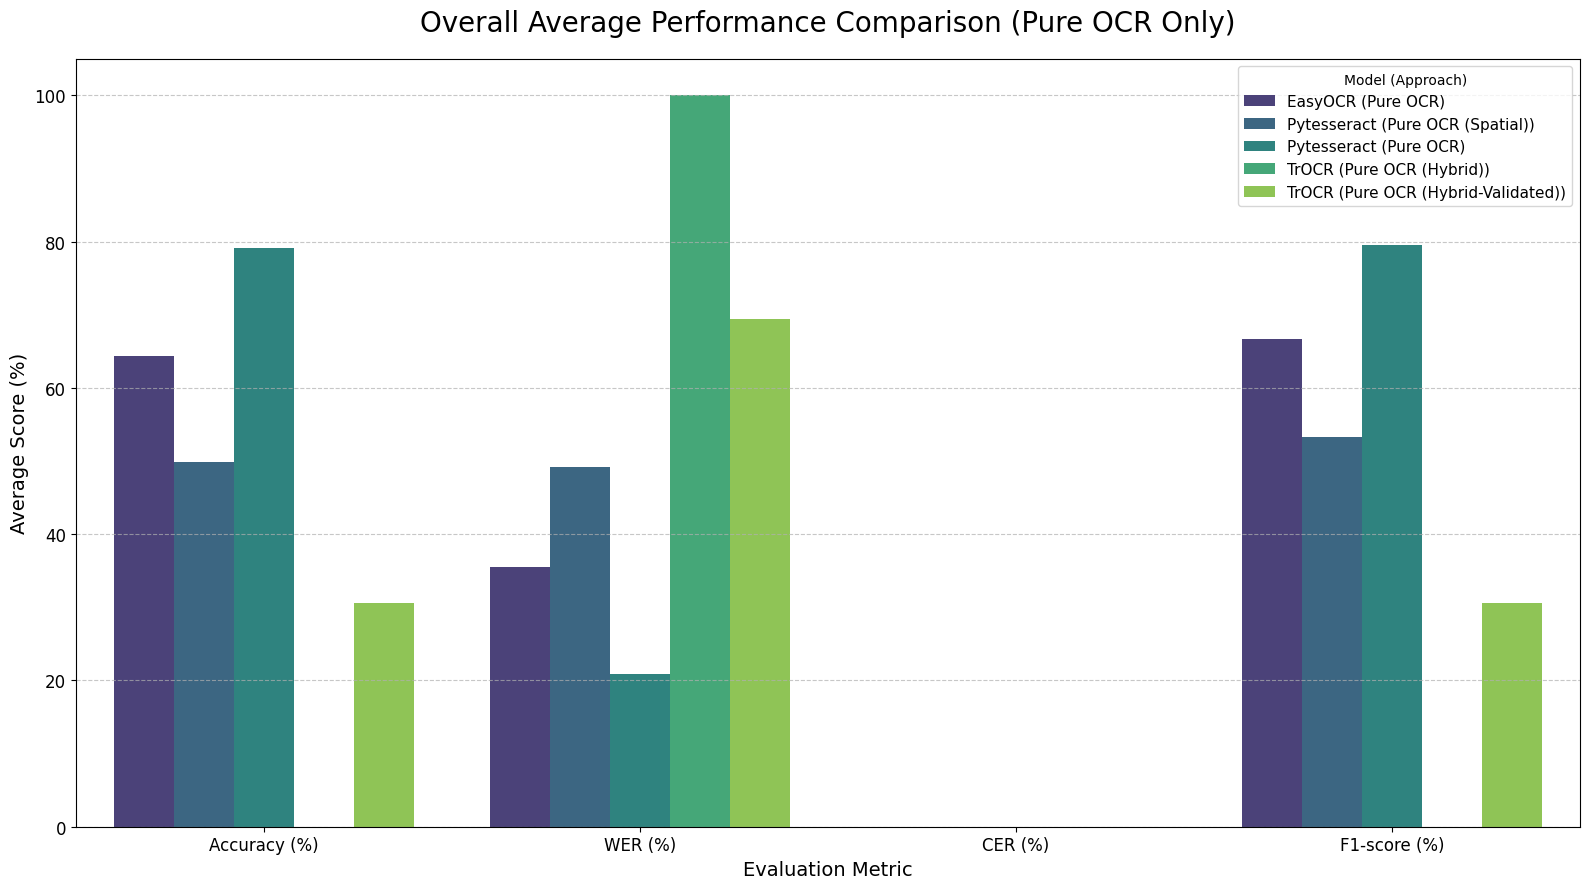

<ipython-input-23-4016833904>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_field, x='Model_Approach', y='Accuracy (%)', palette='plasma')


✅ บันทึกกราฟที่ 2 (Name) สำเร็จ: /content/drive/MyDrive/kmitl_dataset/final-excel/graphs_pure_ocr/2_pure_ocr_accuracy_for_Name.png


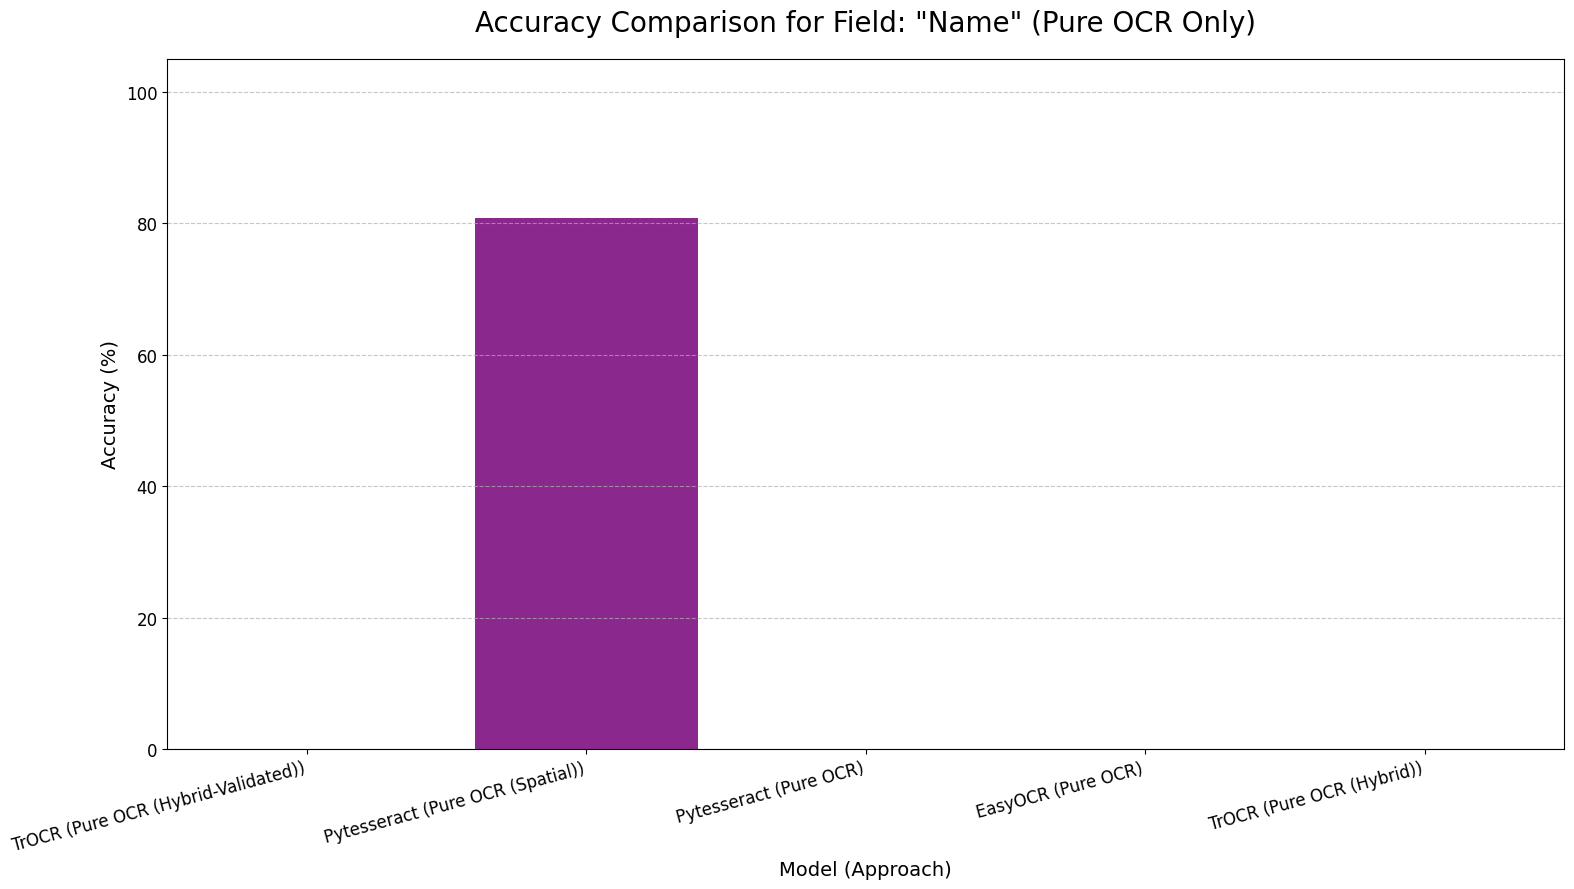

<ipython-input-23-4016833904>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_field, x='Model_Approach', y='Accuracy (%)', palette='plasma')


✅ บันทึกกราฟที่ 2 (Application No.) สำเร็จ: /content/drive/MyDrive/kmitl_dataset/final-excel/graphs_pure_ocr/2_pure_ocr_accuracy_for_Application_No..png


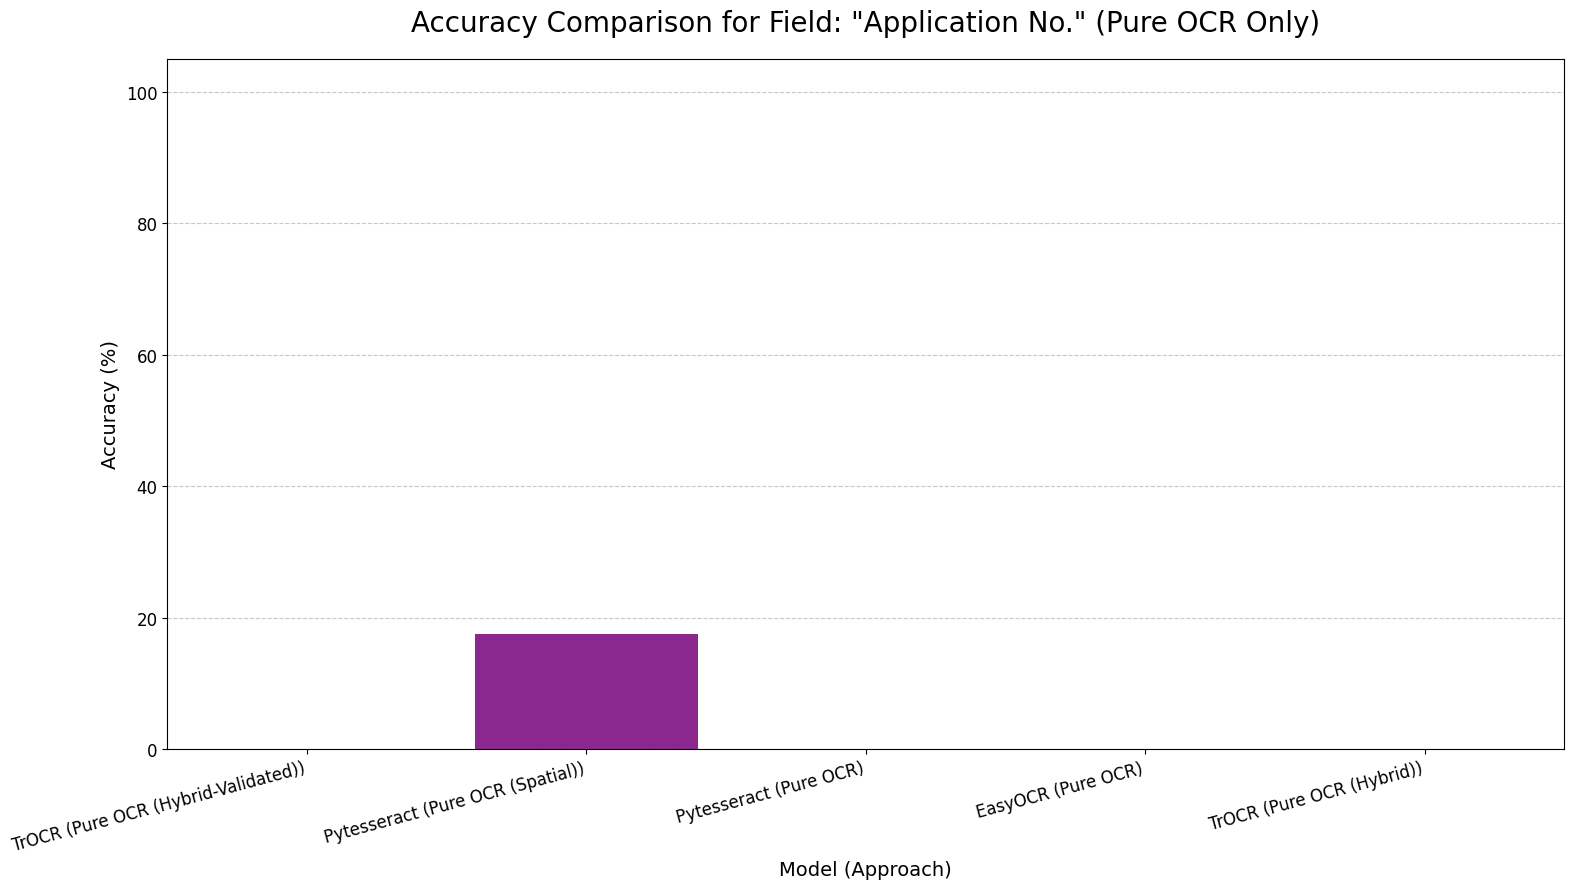

✅ บันทึกกราฟที่ 3 สำเร็จ: /content/drive/MyDrive/kmitl_dataset/final-excel/graphs_pure_ocr/3_pure_ocr_accuracy_heatmap.png


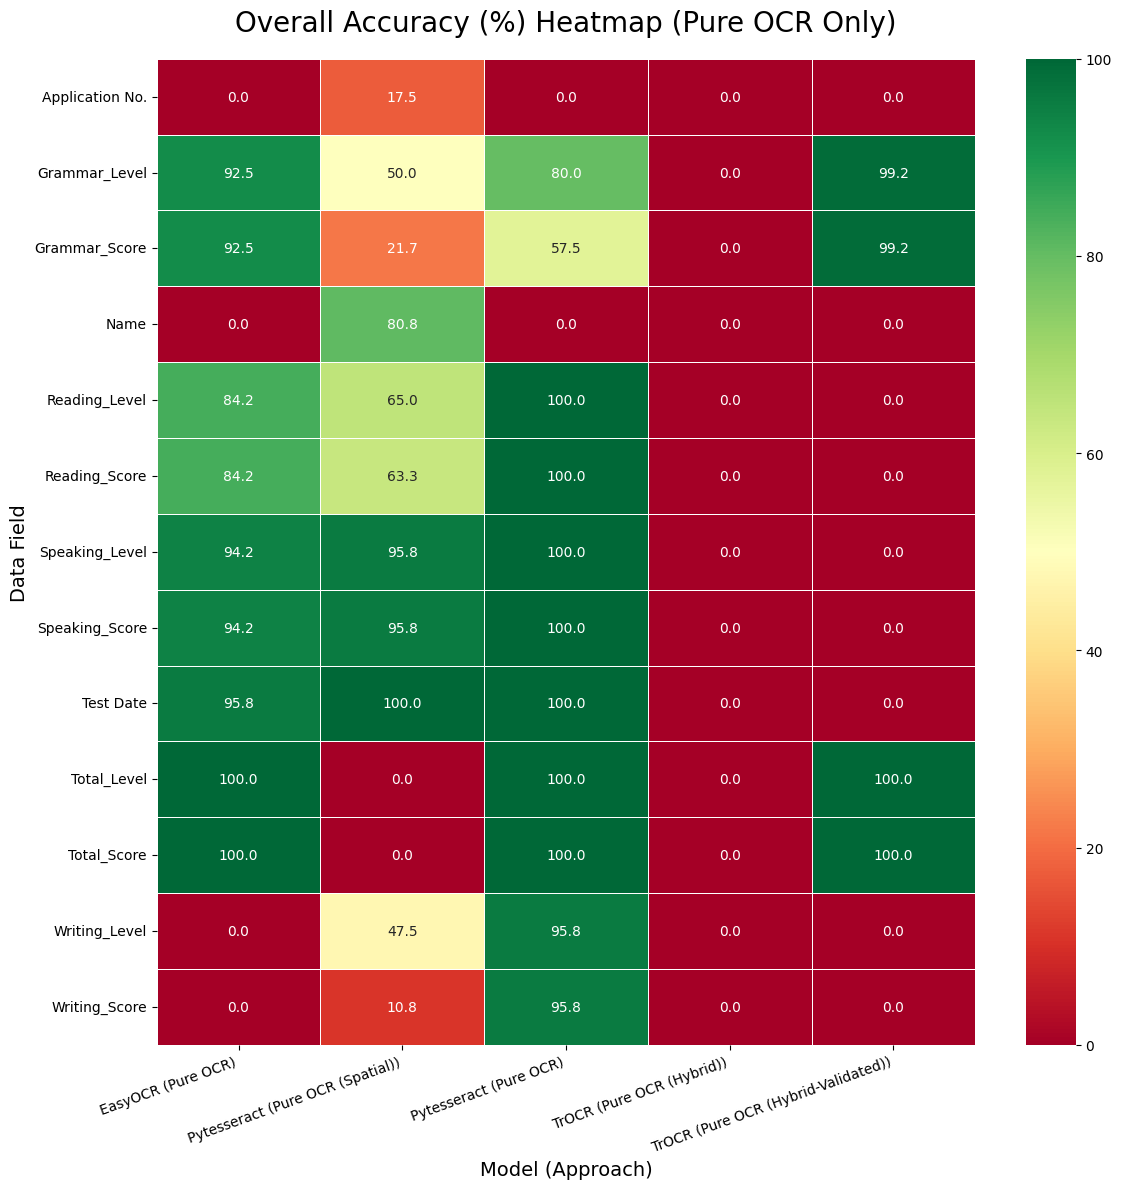

โหลดข้อมูลสำเร็จ! เริ่มสร้างกราฟ...
✅ บันทึกกราฟที่ 1 สำเร็จ: /content/drive/MyDrive/kmitl_dataset/final-excel/graphs_pure_ocr/1_pure_ocr_overall_performance.png


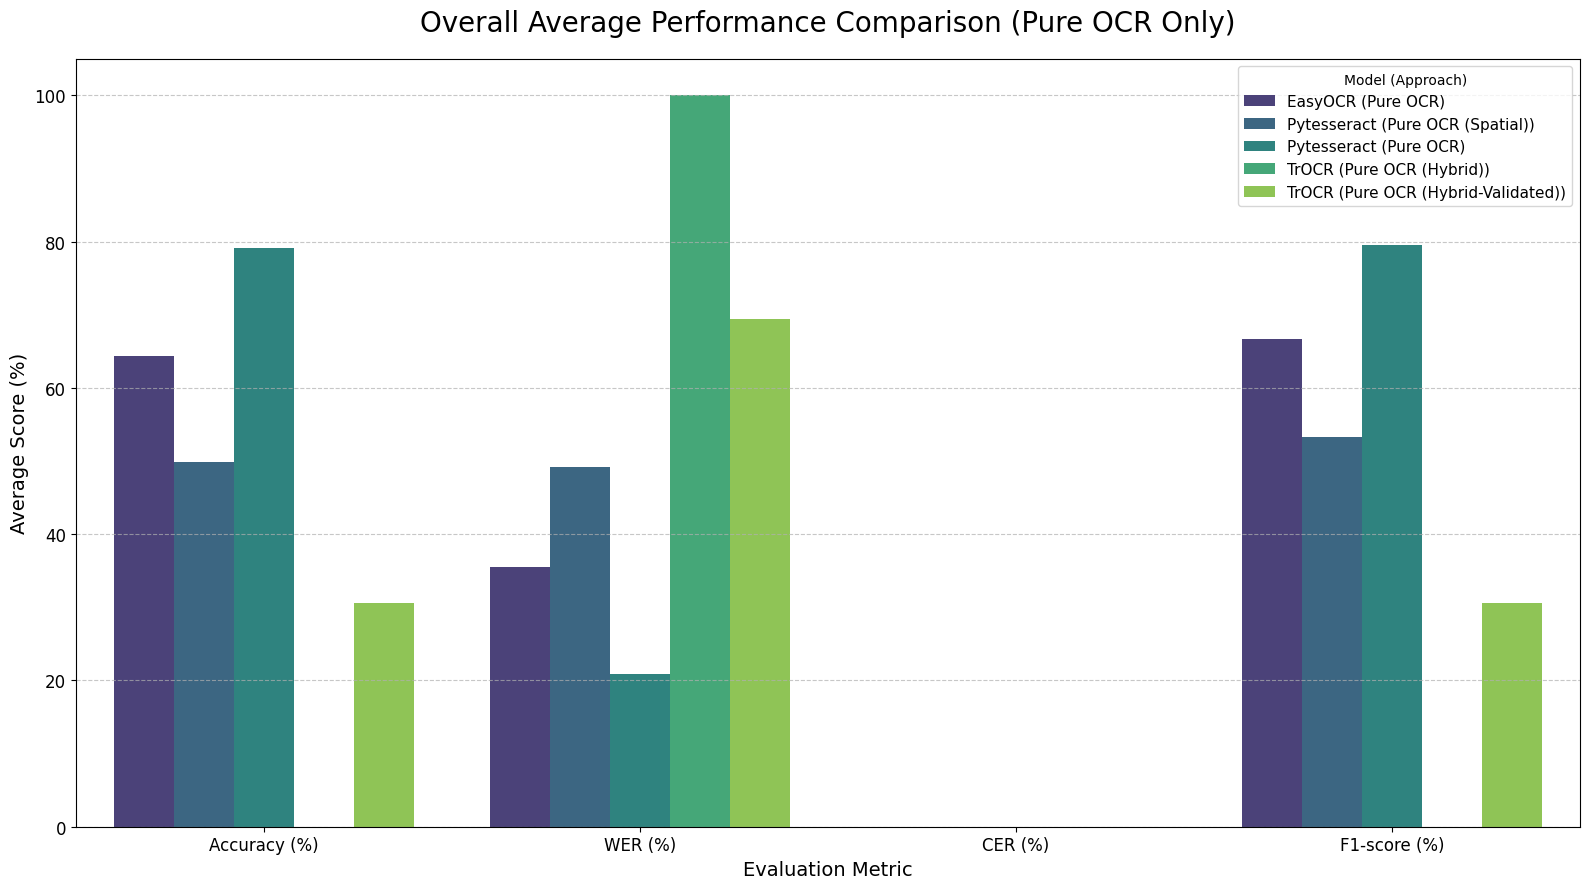

<ipython-input-23-4016833904>:148: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_field, x='Model_Approach', y='Accuracy (%)', palette='plasma')


✅ บันทึกกราฟที่ 2 (Name) สำเร็จ: /content/drive/MyDrive/kmitl_dataset/final-excel/graphs_pure_ocr/2_pure_ocr_accuracy_for_Name.png


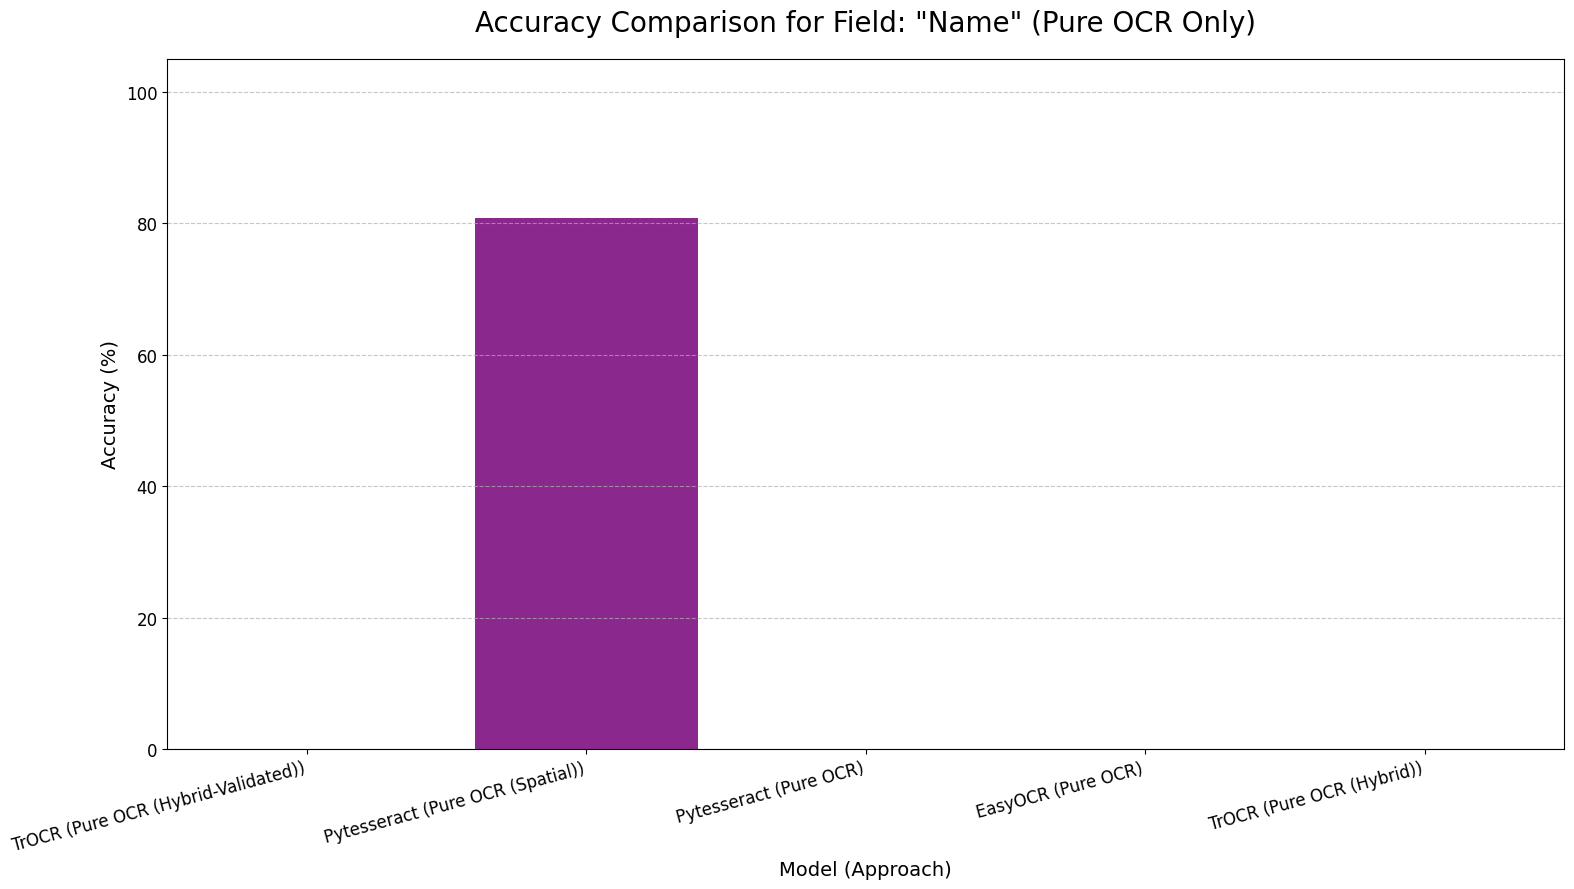

<ipython-input-23-4016833904>:148: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_field, x='Model_Approach', y='Accuracy (%)', palette='plasma')


✅ บันทึกกราฟที่ 2 (Application No.) สำเร็จ: /content/drive/MyDrive/kmitl_dataset/final-excel/graphs_pure_ocr/2_pure_ocr_accuracy_for_Application_No..png


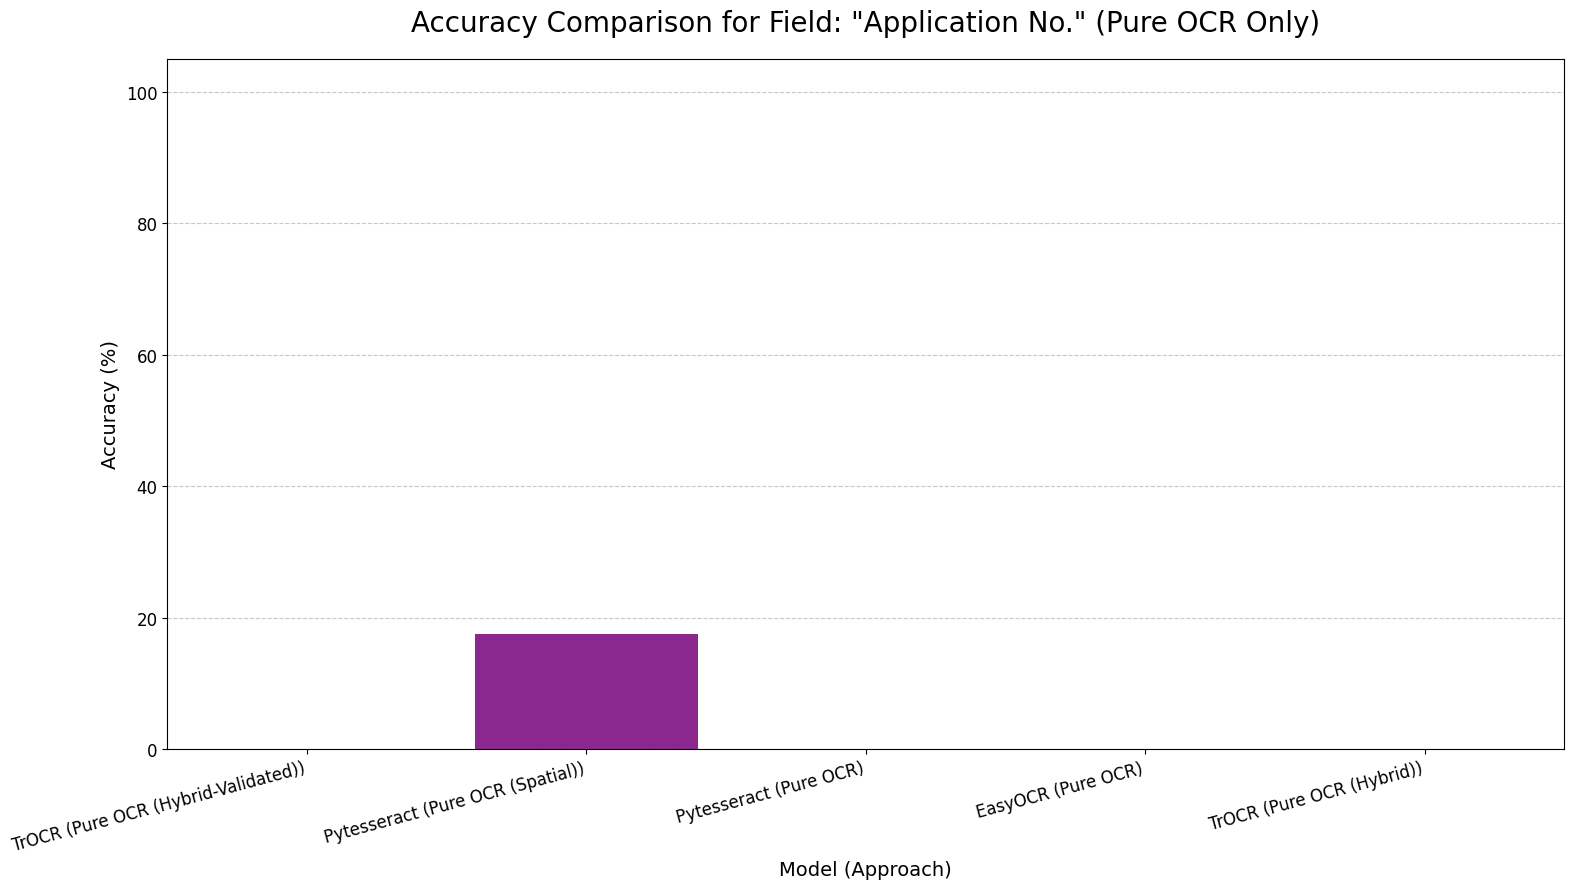

✅ บันทึกกราฟที่ 3 สำเร็จ: /content/drive/MyDrive/kmitl_dataset/final-excel/graphs_pure_ocr/3_pure_ocr_accuracy_heatmap.png


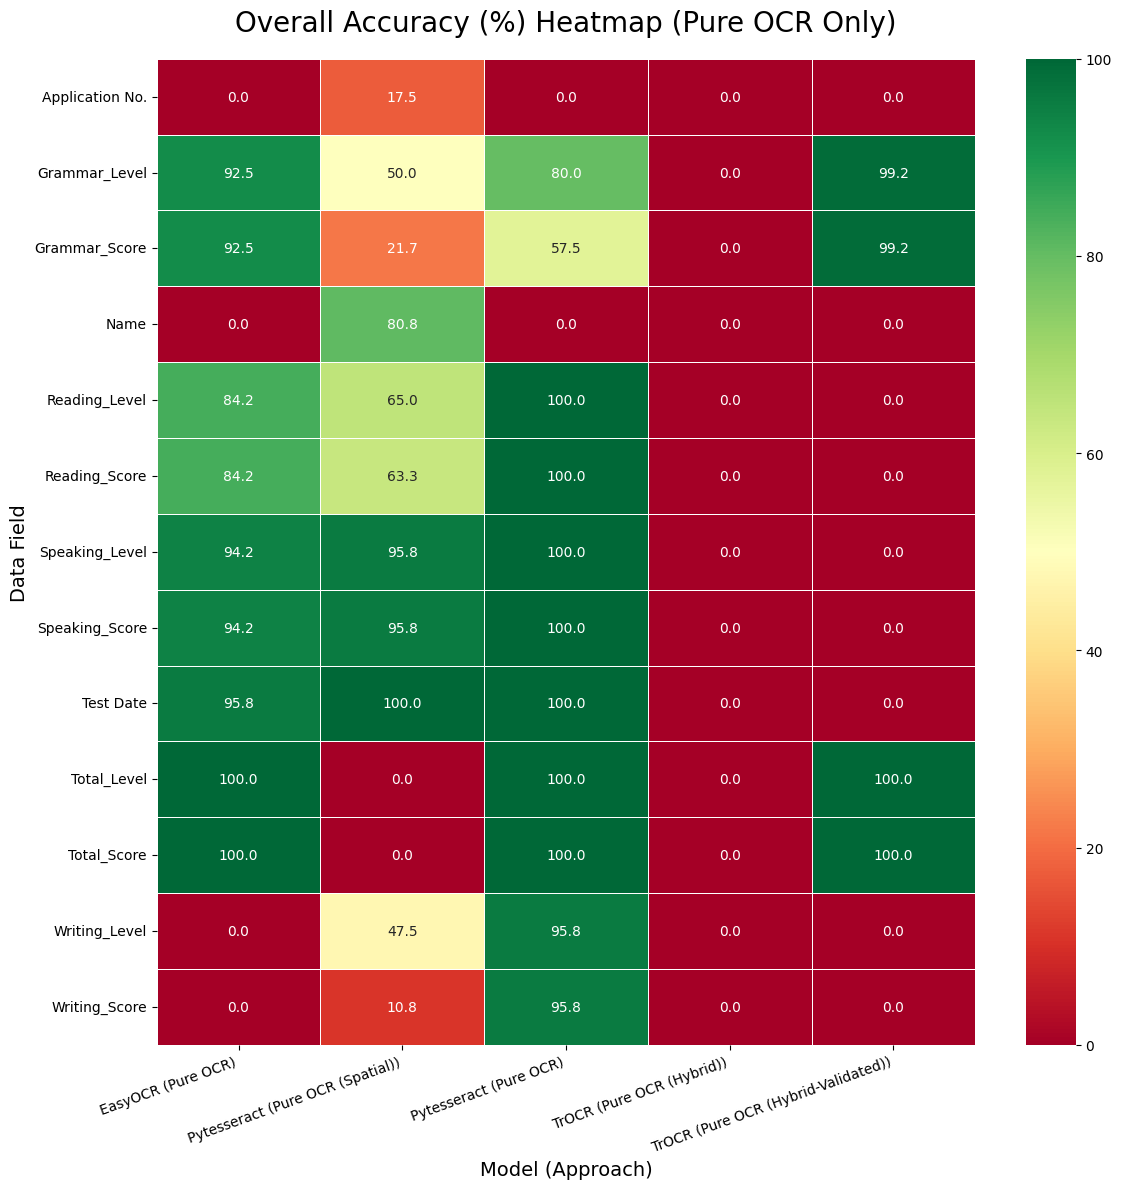

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- 1. กำหนดค่าและโหลดข้อมูล ---
MASTER_REPORT_PATH = "/content/drive/MyDrive/kmitl_dataset/final-excel/final_comparison_report.xlsx"
SHEET_NAME = 'Master_Evaluation'
OUTPUT_DIR = "/content/drive/MyDrive/kmitl_dataset/final-excel/graphs_pure_ocr/" # ⬅️ สร้างโฟลเดอร์ใหม่สำหรับกราฟชุดนี้

# สร้างโฟลเดอร์ถ้ายังไม่มี
os.makedirs(OUTPUT_DIR, exist_ok=True)

print(f"กำลังโหลดข้อมูลจาก: {MASTER_REPORT_PATH}")
try:
    df_all = pd.read_excel(MASTER_REPORT_PATH, sheet_name=SHEET_NAME)
except FileNotFoundError:
    print(f"❌ ไม่พบไฟล์ Master Report! กรุณาตรวจสอบ Path: {MASTER_REPORT_PATH}")
    exit()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- 1. กำหนดค่าและโหลดข้อมูล ---
MASTER_REPORT_PATH = "/content/drive/MyDrive/kmitl_dataset/final-excel/final_comparison_report.xlsx"
SHEET_NAME = 'Master_Evaluation'
OUTPUT_DIR = "/content/drive/MyDrive/kmitl_dataset/final-excel/graphs_pure_ocr/" # ⬅️ สร้างโฟลเดอร์ใหม่สำหรับกราฟชุดนี้

# สร้างโฟลเดอร์ถ้ายังไม่มี
os.makedirs(OUTPUT_DIR, exist_ok=True)

print(f"กำลังโหลดข้อมูลจาก: {MASTER_REPORT_PATH}")
try:
    df_all = pd.read_excel(MASTER_REPORT_PATH, sheet_name=SHEET_NAME)
except FileNotFoundError:
    print(f"❌ ไม่พบไฟล์ Master Report! กรุณาตรวจสอบ Path: {MASTER_REPORT_PATH}")
    exit()

# ⬇️⬇️⬇️ ส่วนที่เพิ่มเข้ามา: กรองข้อมูลให้เหลือเฉพาะ Pure OCR ⬇️⬇️⬇️
# เพิ่ม na=False เข้าไปใน .str.contains()
df = df_all[df_all['Approach'].str.contains('Pure OCR', case=False, na=False)].copy()
print("กรองข้อมูลสำเร็จ! แสดงผลเฉพาะแนวทาง Pure OCR เท่านั้น")


print("โหลดข้อมูลสำเร็จ! เริ่มสร้างกราฟ...")

# สร้างคอลัมน์ใหม่เพื่อใช้เป็นแกน X ในกราฟให้สวยงาม
df['Model_Approach'] = df['Model'] + ' (' + df['Approach'] + ')'


# --- 2. สร้างกราฟที่ 1: เปรียบเทียบประสิทธิภาพโดยรวม (ค่าเฉลี่ยของทุกฟิลด์) ---
df_agg = df.groupby('Model_Approach')[['Accuracy (%)', 'WER (%)', 'CER (%)', 'F1-score (%)']].mean().reset_index()
df_melted = df_agg.melt(id_vars='Model_Approach', var_name='Metric', value_name='Average Score')

plt.figure(figsize=(16, 9))
sns.barplot(data=df_melted, x='Metric', y='Average Score', hue='Model_Approach', palette='viridis')
plt.title('Overall Average Performance Comparison (Pure OCR Only)', fontsize=20, pad=20)
plt.ylabel('Average Score (%)', fontsize=14)
plt.xlabel('Evaluation Metric', fontsize=14)
plt.xticks(rotation=0, ha='center', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Model (Approach)', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# บันทึกกราฟ
graph1_path = os.path.join(OUTPUT_DIR, '1_pure_ocr_overall_performance.png')
plt.savefig(graph1_path)
print(f"✅ บันทึกกราฟที่ 1 สำเร็จ: {graph1_path}")
plt.show()


# --- 3. สร้างกราฟที่ 2: เจาะลึกประสิทธิภาพในแต่ละฟิลด์ (ตัวอย่าง: Name และ Application No.) ---
fields_to_plot = ['Name', 'Application No.']
for field in fields_to_plot:
    df_field = df[df['Field'] == field]

    plt.figure(figsize=(16, 9))
    sns.barplot(data=df_field, x='Model_Approach', y='Accuracy (%)', palette='plasma')
    plt.title(f'Accuracy Comparison for Field: "{field}" (Pure OCR Only)', fontsize=20, pad=20)
    plt.ylabel('Accuracy (%)', fontsize=14)
    plt.xlabel('Model (Approach)', fontsize=14)
    plt.xticks(rotation=15, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim(0, 105)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # บันทึกกราฟ
    graph2_path = os.path.join(OUTPUT_DIR, f'2_pure_ocr_accuracy_for_{field.replace(" ", "_")}.png')
    plt.savefig(graph2_path)
    print(f"✅ บันทึกกราฟที่ 2 ({field}) สำเร็จ: {graph2_path}")
    plt.show()


# --- 4. สร้างกราฟที่ 3: Heatmap แสดงภาพรวมทั้งหมด ---
df_pivot = df.pivot_table(index='Field', columns='Model_Approach', values='Accuracy (%)')

plt.figure(figsize=(12, 12)) # ปรับขนาดให้เหมาะกับจำนวนโมเดลที่น้อยลง
sns.heatmap(df_pivot, annot=True, fmt=".1f", linewidths=.5, cmap='RdYlGn', vmin=0, vmax=100)
plt.title('Overall Accuracy (%) Heatmap (Pure OCR Only)', fontsize=20, pad=20)
plt.ylabel('Data Field', fontsize=14)
plt.xlabel('Model (Approach)', fontsize=14)
plt.xticks(rotation=20, ha='right')
plt.tight_layout()

# บันทึกกราฟ
graph3_path = os.path.join(OUTPUT_DIR, '3_pure_ocr_accuracy_heatmap.png')
plt.savefig(graph3_path)
print(f"✅ บันทึกกราฟที่ 3 สำเร็จ: {graph3_path}")
plt.show()
print("โหลดข้อมูลสำเร็จ! เริ่มสร้างกราฟ...")

# สร้างคอลัมน์ใหม่เพื่อใช้เป็นแกน X ในกราฟให้สวยงาม
df['Model_Approach'] = df['Model'] + ' (' + df['Approach'] + ')'


# --- 2. สร้างกราฟที่ 1: เปรียบเทียบประสิทธิภาพโดยรวม (ค่าเฉลี่ยของทุกฟิลด์) ---
df_agg = df.groupby('Model_Approach')[['Accuracy (%)', 'WER (%)', 'CER (%)', 'F1-score (%)']].mean().reset_index()
df_melted = df_agg.melt(id_vars='Model_Approach', var_name='Metric', value_name='Average Score')

plt.figure(figsize=(16, 9))
sns.barplot(data=df_melted, x='Metric', y='Average Score', hue='Model_Approach', palette='viridis')
plt.title('Overall Average Performance Comparison (Pure OCR Only)', fontsize=20, pad=20)
plt.ylabel('Average Score (%)', fontsize=14)
plt.xlabel('Evaluation Metric', fontsize=14)
plt.xticks(rotation=0, ha='center', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Model (Approach)', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# บันทึกกราฟ
graph1_path = os.path.join(OUTPUT_DIR, '1_pure_ocr_overall_performance.png')
plt.savefig(graph1_path)
print(f"✅ บันทึกกราฟที่ 1 สำเร็จ: {graph1_path}")
plt.show()


# --- 3. สร้างกราฟที่ 2: เจาะลึกประสิทธิภาพในแต่ละฟิลด์ (ตัวอย่าง: Name และ Application No.) ---
fields_to_plot = ['Name', 'Application No.']
for field in fields_to_plot:
    df_field = df[df['Field'] == field]

    plt.figure(figsize=(16, 9))
    sns.barplot(data=df_field, x='Model_Approach', y='Accuracy (%)', palette='plasma')
    plt.title(f'Accuracy Comparison for Field: "{field}" (Pure OCR Only)', fontsize=20, pad=20)
    plt.ylabel('Accuracy (%)', fontsize=14)
    plt.xlabel('Model (Approach)', fontsize=14)
    plt.xticks(rotation=15, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim(0, 105)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # บันทึกกราฟ
    graph2_path = os.path.join(OUTPUT_DIR, f'2_pure_ocr_accuracy_for_{field.replace(" ", "_")}.png')
    plt.savefig(graph2_path)
    print(f"✅ บันทึกกราฟที่ 2 ({field}) สำเร็จ: {graph2_path}")
    plt.show()


# --- 4. สร้างกราฟที่ 3: Heatmap แสดงภาพรวมทั้งหมด ---
df_pivot = df.pivot_table(index='Field', columns='Model_Approach', values='Accuracy (%)')

plt.figure(figsize=(12, 12)) # ปรับขนาดให้เหมาะกับจำนวนโมเดลที่น้อยลง
sns.heatmap(df_pivot, annot=True, fmt=".1f", linewidths=.5, cmap='RdYlGn', vmin=0, vmax=100)
plt.title('Overall Accuracy (%) Heatmap (Pure OCR Only)', fontsize=20, pad=20)
plt.ylabel('Data Field', fontsize=14)
plt.xlabel('Model (Approach)', fontsize=14)
plt.xticks(rotation=20, ha='right')
plt.tight_layout()

# บันทึกกราฟ
graph3_path = os.path.join(OUTPUT_DIR, '3_pure_ocr_accuracy_heatmap.png')
plt.savefig(graph3_path)
print(f"✅ บันทึกกราฟที่ 3 สำเร็จ: {graph3_path}")
plt.show()

# Visualization all

In [24]:
pip install matplotlib seaborn

กำลังโหลดข้อมูลจาก: /content/drive/MyDrive/kmitl_dataset/final-excel/final_comparison_report.xlsx
โหลดข้อมูลสำเร็จ! เริ่มสร้างกราฟ...
✅ บันทึกกราฟที่ 1 สำเร็จ: /content/drive/MyDrive/kmitl_dataset/final-excel/graphs/1_overall_performance.png


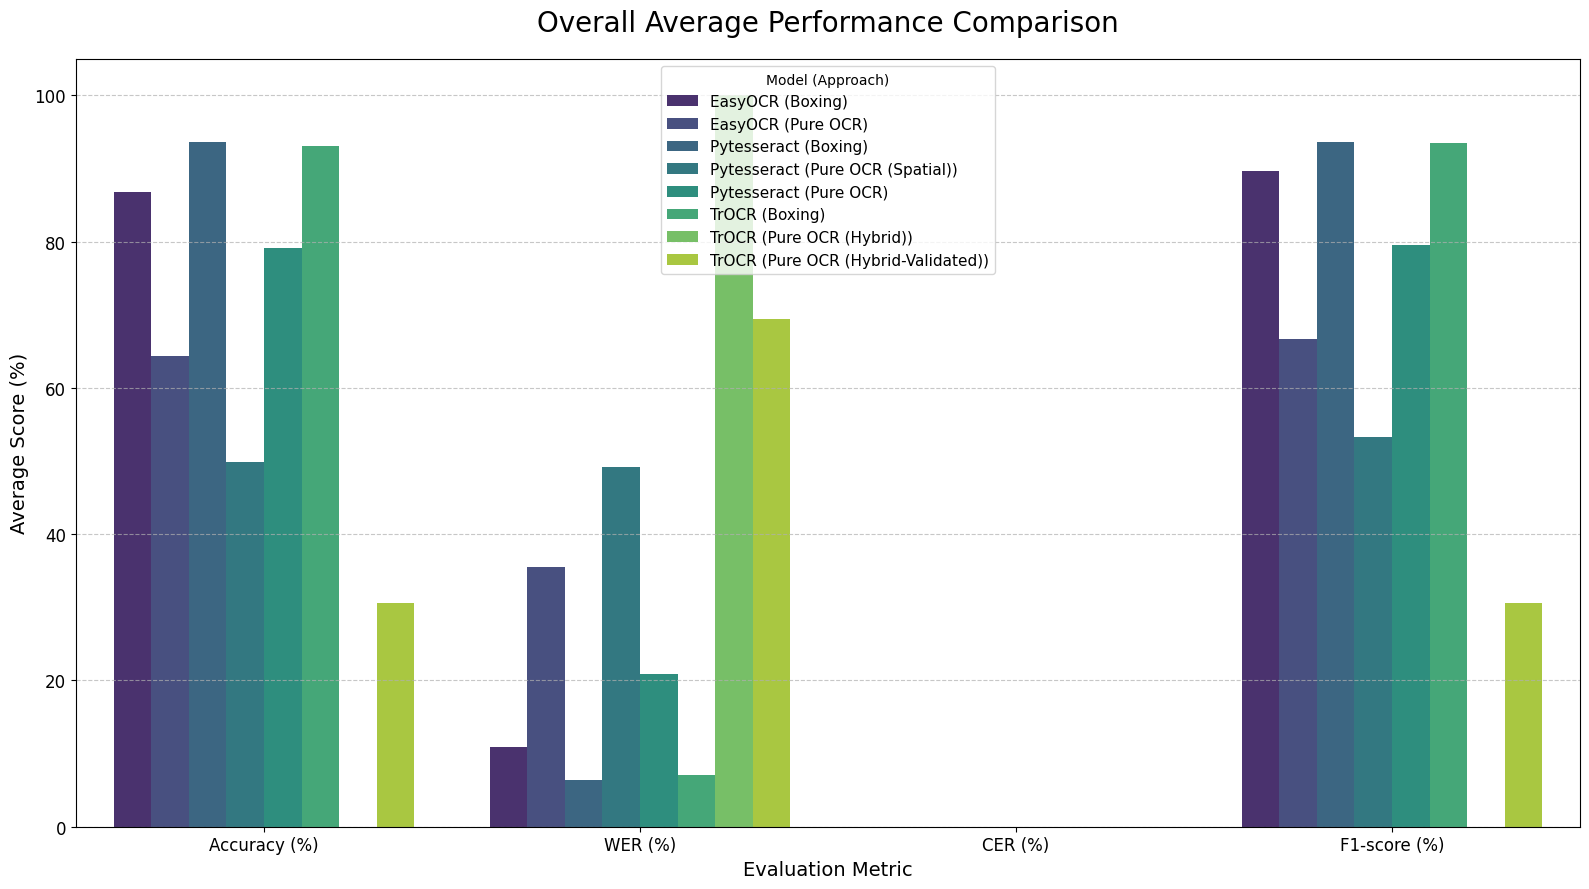

<ipython-input-25-2310019219>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_field, x='Model_Approach', y='Accuracy (%)', palette='plasma')


✅ บันทึกกราฟที่ 2 (Name) สำเร็จ: /content/drive/MyDrive/kmitl_dataset/final-excel/graphs/2_accuracy_for_Name.png


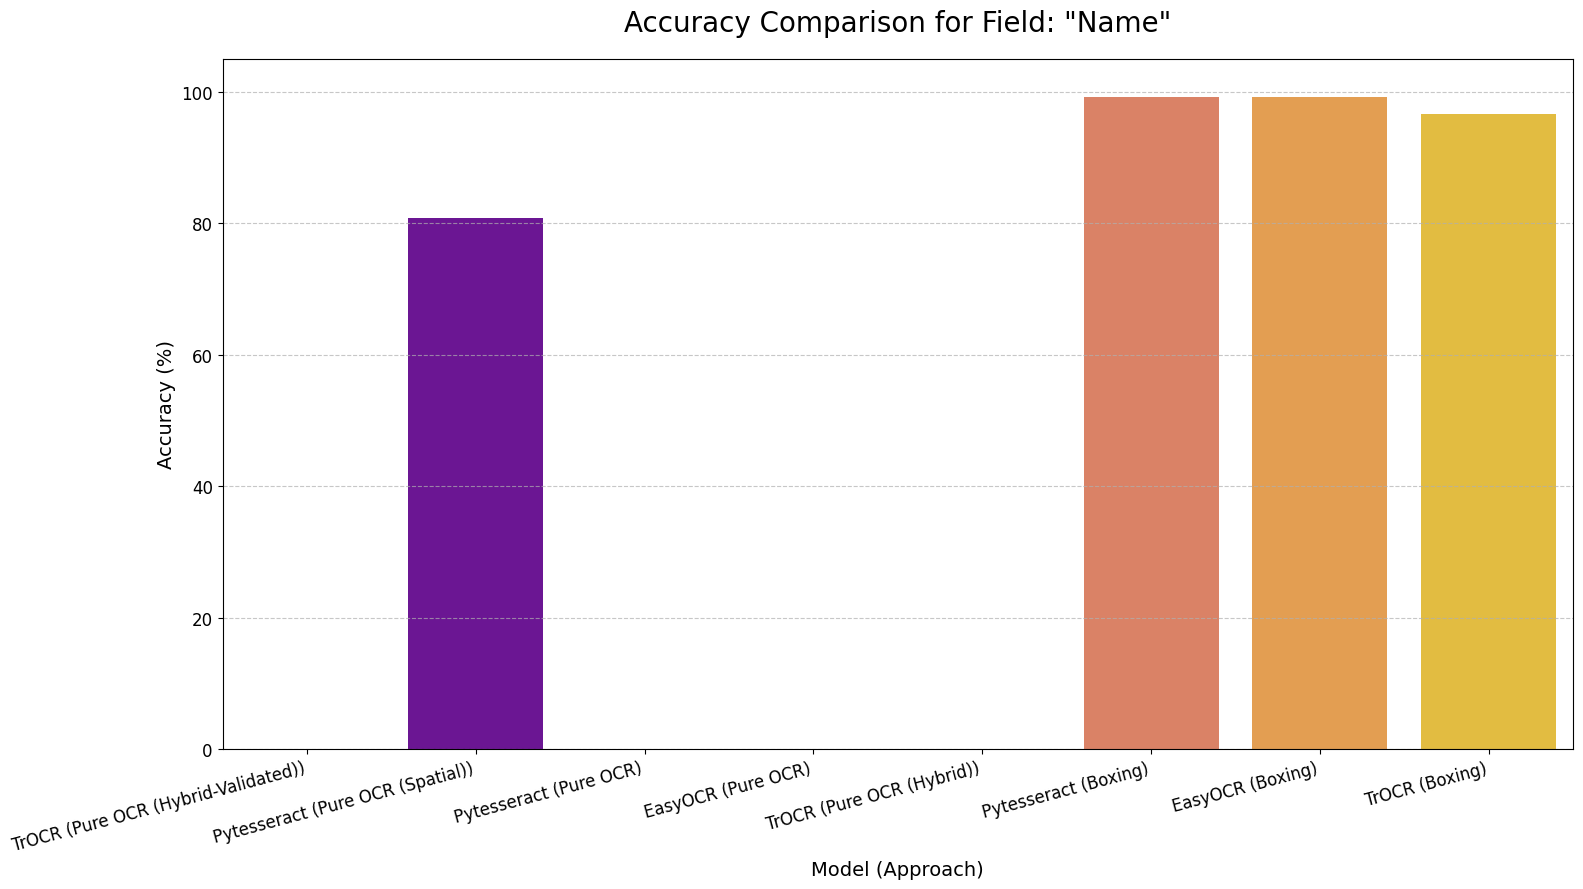

<ipython-input-25-2310019219>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_field, x='Model_Approach', y='Accuracy (%)', palette='plasma')


✅ บันทึกกราฟที่ 2 (Application No.) สำเร็จ: /content/drive/MyDrive/kmitl_dataset/final-excel/graphs/2_accuracy_for_Application_No..png


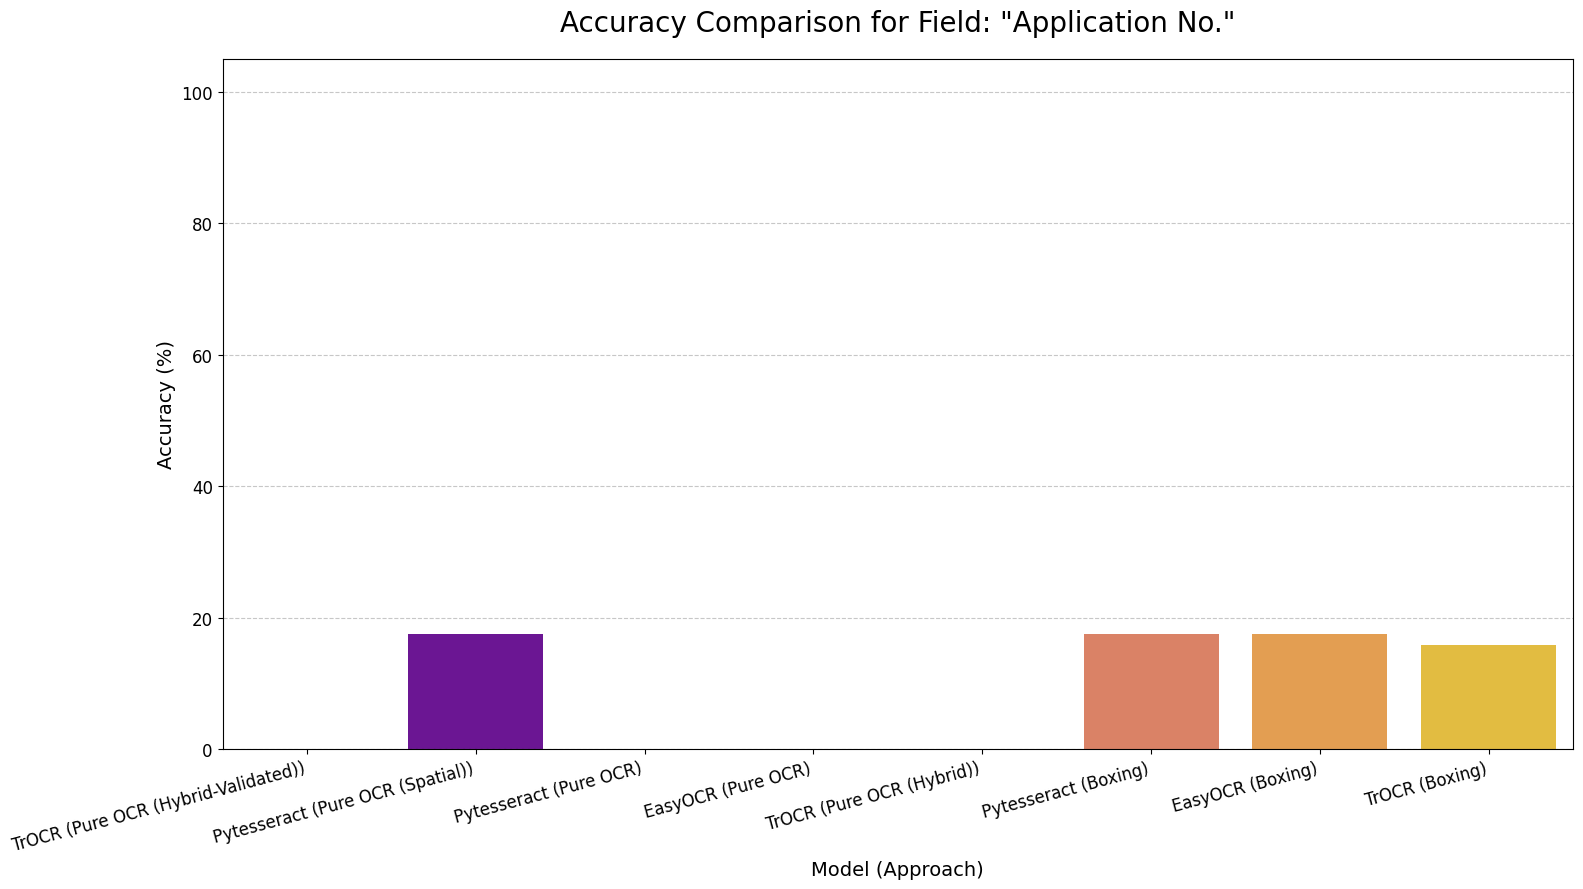

✅ บันทึกกราฟที่ 3 สำเร็จ: /content/drive/MyDrive/kmitl_dataset/final-excel/graphs/3_accuracy_heatmap.png


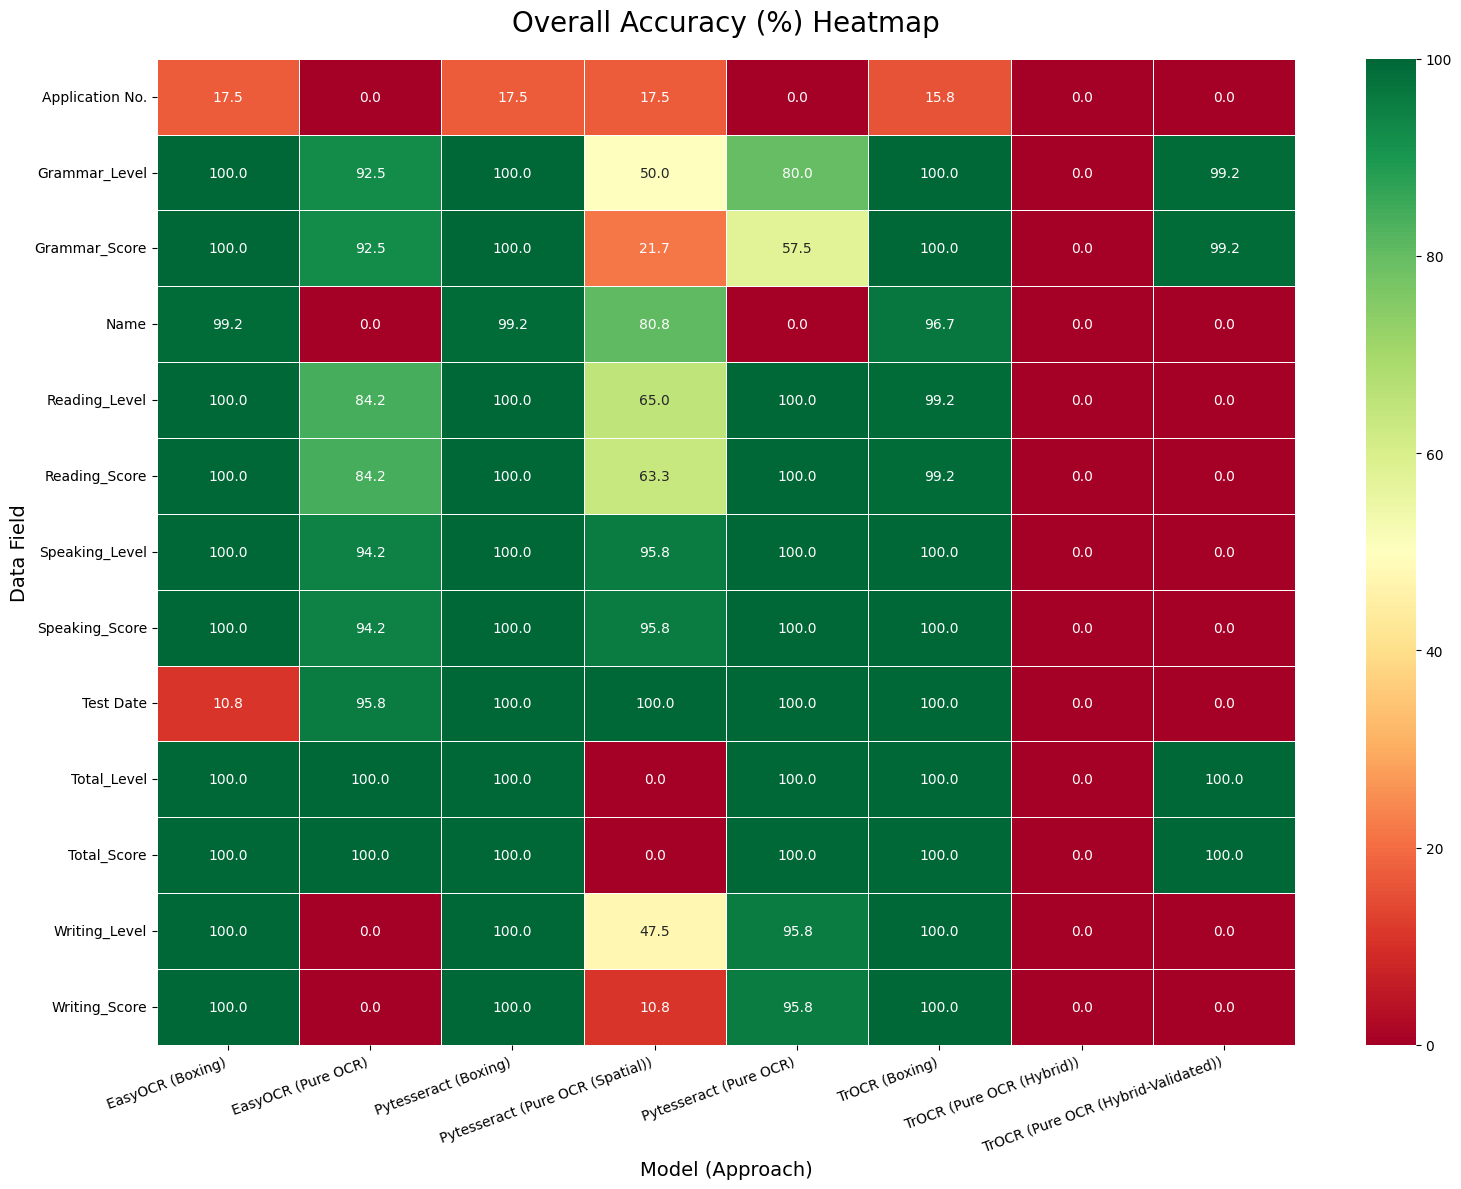

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. กำหนดค่าและโหลดข้อมูล ---
MASTER_REPORT_PATH = "/content/drive/MyDrive/kmitl_dataset/final-excel/final_comparison_report.xlsx"
SHEET_NAME = 'Master_Evaluation'
OUTPUT_DIR = "/content/drive/MyDrive/kmitl_dataset/final-excel/graphs/" # โฟลเดอร์สำหรับเก็บกราฟ

# สร้างโฟลเดอร์ถ้ายังไม่มี
os.makedirs(OUTPUT_DIR, exist_ok=True)

print(f"กำลังโหลดข้อมูลจาก: {MASTER_REPORT_PATH}")
try:
    df = pd.read_excel(MASTER_REPORT_PATH, sheet_name=SHEET_NAME)
except FileNotFoundError:
    print(f"❌ ไม่พบไฟล์ Master Report! กรุณาตรวจสอบ Path: {MASTER_REPORT_PATH}")
    exit()

print("โหลดข้อมูลสำเร็จ! เริ่มสร้างกราฟ...")

# สร้างคอลัมน์ใหม่เพื่อใช้เป็นแกน X ในกราฟให้สวยงาม
df['Model_Approach'] = df['Model'] + ' (' + df['Approach'] + ')'


# --- 2. สร้างกราฟที่ 1: เปรียบเทียบประสิทธิภาพโดยรวม (ค่าเฉลี่ยของทุกฟิลด์) ---
# คำนวณค่าเฉลี่ยของแต่ละ Metric โดยแยกตาม Model และ Approach
df_agg = df.groupby('Model_Approach')[['Accuracy (%)', 'WER (%)', 'CER (%)', 'F1-score (%)']].mean().reset_index()

# Melt DataFrame เพื่อให้ง่ายต่อการพล็อตด้วย Seaborn
df_melted = df_agg.melt(id_vars='Model_Approach', var_name='Metric', value_name='Average Score')

plt.figure(figsize=(16, 9))
sns.barplot(data=df_melted, x='Metric', y='Average Score', hue='Model_Approach', palette='viridis')
plt.title('Overall Average Performance Comparison', fontsize=20, pad=20)
plt.ylabel('Average Score (%)', fontsize=14)
plt.xlabel('Evaluation Metric', fontsize=14)
plt.xticks(rotation=0, ha='center', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Model (Approach)', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# บันทึกกราฟ
graph1_path = os.path.join(OUTPUT_DIR, '1_overall_performance.png')
plt.savefig(graph1_path)
print(f"✅ บันทึกกราฟที่ 1 สำเร็จ: {graph1_path}")
plt.show()


# --- 3. สร้างกราฟที่ 2: เจาะลึกประสิทธิภาพในแต่ละฟิลด์ (ตัวอย่าง: Name และ Application No.) ---
fields_to_plot = ['Name', 'Application No.']
for field in fields_to_plot:
    df_field = df[df['Field'] == field]

    plt.figure(figsize=(16, 9))
    sns.barplot(data=df_field, x='Model_Approach', y='Accuracy (%)', palette='plasma')
    plt.title(f'Accuracy Comparison for Field: "{field}"', fontsize=20, pad=20)
    plt.ylabel('Accuracy (%)', fontsize=14)
    plt.xlabel('Model (Approach)', fontsize=14)
    plt.xticks(rotation=15, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim(0, 105) # กำหนดให้แกน Y เต็ม 100%
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # บันทึกกราฟ
    graph2_path = os.path.join(OUTPUT_DIR, f'2_accuracy_for_{field.replace(" ", "_")}.png')
    plt.savefig(graph2_path)
    print(f"✅ บันทึกกราฟที่ 2 ({field}) สำเร็จ: {graph2_path}")
    plt.show()


# --- 4. สร้างกราฟที่ 3: Heatmap แสดงภาพรวมทั้งหมด ---
# เราจะใช้ Accuracy เป็นตัวชี้วัดหลักใน Heatmap
df_pivot = df.pivot_table(index='Field', columns='Model_Approach', values='Accuracy (%)')

plt.figure(figsize=(16, 12))
sns.heatmap(df_pivot, annot=True, fmt=".1f", linewidths=.5, cmap='RdYlGn', vmin=0, vmax=100)
plt.title('Overall Accuracy (%) Heatmap', fontsize=20, pad=20)
plt.ylabel('Data Field', fontsize=14)
plt.xlabel('Model (Approach)', fontsize=14)
plt.xticks(rotation=20, ha='right')
plt.tight_layout()

# บันทึกกราฟ
graph3_path = os.path.join(OUTPUT_DIR, '3_accuracy_heatmap.png')
plt.savefig(graph3_path)
print(f"✅ บันทึกกราฟที่ 3 สำเร็จ: {graph3_path}")
plt.show()

In [26]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Read the CSV file into a DataFrame
df = pd.read_excel('/content/drive/MyDrive/kmitl_dataset/final-excel/final_comparison_report.xlsx')

# Display the first 5 rows
print(df.head().to_string(index=False))

# Print the column names and their data types
print(df.info())

# Get unique values in `Model` column
print(df['Model'].unique())

# Get unique values in `Approach` column
print(df['Approach'].unique())

# Group by `Model` and `Approach` and calculate the mean of the performance metrics
df_agg = df.groupby(['Model', 'Approach']).agg(
    Accuracy=('Accuracy (%)', 'mean'),
    WER=('WER (%)', 'mean'),
    CER=('CER (%)', 'mean'),
    F1_score=('F1-score (%)', 'mean')
).reset_index()

# Print the aggregated DataFrame
print(df_agg.to_string(index=False))

Model                    Approach           Field  Accuracy (%)  WER (%)  CER (%)  F1-score (%)
TrOCR Pure OCR (Hybrid-Validated)            Name          0.00   100.00      0.0          0.00
TrOCR Pure OCR (Hybrid-Validated) Application No.          0.00   100.00      0.0          0.00
TrOCR Pure OCR (Hybrid-Validated)       Test Date          0.00   100.00      0.0          0.00
TrOCR Pure OCR (Hybrid-Validated)   Grammar_Level         99.17     0.83      0.0         99.17
TrOCR Pure OCR (Hybrid-Validated)   Grammar_Score         99.17     0.83      0.0         99.17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Model         105 non-null    object 
 1   Approach      104 non-null    object 
 2   Field         104 non-null    object 
 3   Accuracy (%)  104 non-null    float64
 4   WER (%)       104 non-null    float64
 5   CER (%)       